# Read All Dataset CSV

In [66]:
import os
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import roc_auc_score
import matplotlib.pyplot as plt

In [67]:
# Initialize lists for storing data and results
dataset_names = []
X_trains = []
y_trains = []
X_tests = []
models = []  # To store trained models for each dataset
y_predicts = []  # To store prediction probabilities for test sets
accuracies = []  # To store validation accuracies for each dataset

## Data Preprocessing & Feature Engineering

In [68]:
def create_pipeline(numerical_cols, categorical_cols):
    """
    Create a preprocessing pipeline for numerical and categorical features.
    """
    # Preprocessing for numerical data
    numerical_transformer = SimpleImputer(strategy="mean")  # Impute missing values with mean

    # Preprocessing for categorical data
    categorical_transformer = Pipeline(steps=[
        ("imputer", SimpleImputer(strategy="most_frequent")),  # Impute missing values with the most frequent value
        ("onehot", OneHotEncoder(handle_unknown="ignore"))  # Encode categorical features
    ])

    # Combine preprocessors in a column transformer
    preprocessor = ColumnTransformer(
        transformers=[
            ("num", numerical_transformer, numerical_cols),
            ("cat", categorical_transformer, categorical_cols)
        ]
    )

    # Create a pipeline for Random Forest
    pipeline = Pipeline(steps=[
        ("preprocessor", preprocessor),
        ("classifier", RandomForestClassifier(random_state=42))
    ])
    
    return pipeline

## train test split & build Model
You can select an appropriate model and perform corresponding hyperparameter tuning.

Processing dataset: Dataset_1
Dataset: Dataset_1, Random Forest Validation Accuracy: 0.7865
Processing dataset: Dataset_10
Dataset: Dataset_10, Random Forest Validation Accuracy: 0.7553
Processing dataset: Dataset_11
Dataset: Dataset_11, Random Forest Validation Accuracy: 0.5833
Processing dataset: Dataset_12
Dataset: Dataset_12, Random Forest Validation Accuracy: 0.9677
Processing dataset: Dataset_13
Dataset: Dataset_13, Random Forest Validation Accuracy: 0.8378
Processing dataset: Dataset_14
Dataset: Dataset_14, Random Forest Validation Accuracy: 0.9459
Processing dataset: Dataset_15
Dataset: Dataset_15, Random Forest Validation Accuracy: 0.7432
Processing dataset: Dataset_16
Dataset: Dataset_16, Random Forest Validation Accuracy: 0.9785
Processing dataset: Dataset_17
Dataset: Dataset_17, Random Forest Validation Accuracy: 0.7500
Processing dataset: Dataset_18
Dataset: Dataset_18, Random Forest Validation Accuracy: 1.0000
Processing dataset: Dataset_19
Dataset: Dataset_19, Random For

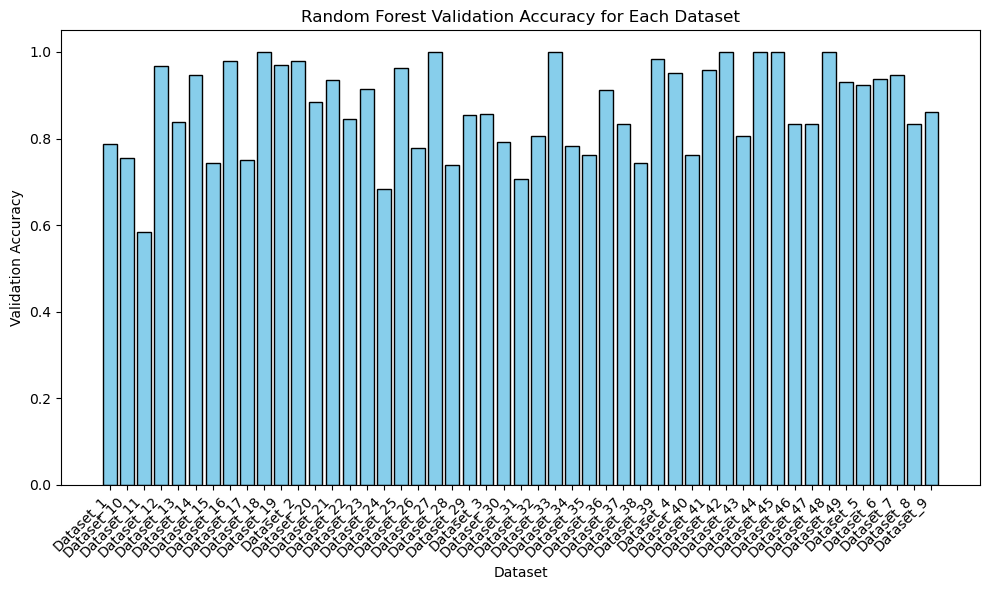

In [69]:
for folder_name in os.listdir("./Competition_data"):
    dataset_names.append(folder_name)
    
    try:
        # Load train and test data
        print(f"Processing dataset: {folder_name}")  # Debugging print
        X_train = pd.read_csv(f"./Competition_data/{folder_name}/X_train.csv", header=0)
        y_train = pd.read_csv(f"./Competition_data/{folder_name}/y_train.csv", header=0).squeeze()
        X_test = pd.read_csv(f"./Competition_data/{folder_name}/X_test.csv", header=0)
        
        # Identify numerical and categorical columns
        numerical_cols = X_train.select_dtypes(include=["float64", "int64"]).columns
        categorical_cols = X_train.select_dtypes(include=["object", "category", "int32"]).columns

        # Preprocessing and training
        numerical_transformer = SimpleImputer(strategy="mean")
        categorical_transformer = Pipeline(steps=[
            ("imputer", SimpleImputer(strategy="most_frequent")),
            ("onehot", OneHotEncoder(handle_unknown="ignore"))
        ])
        preprocessor = ColumnTransformer(
            transformers=[
                ("num", numerical_transformer, numerical_cols),
                ("cat", categorical_transformer, categorical_cols)
            ]
        )
        model_pipeline = Pipeline(steps=[
            ("preprocessor", preprocessor),
            ("classifier", RandomForestClassifier(random_state=42))
        ])
        X_train_split, X_val_split, y_train_split, y_val_split = train_test_split(
            X_train, y_train, test_size=0.2, random_state=42
        )
        model_pipeline.fit(X_train_split, y_train_split)
        val_score = model_pipeline.score(X_val_split, y_val_split)
        
        # Append accuracy to the list
        accuracies.append((folder_name, val_score))
        print(f"Dataset: {folder_name}, Random Forest Validation Accuracy: {val_score:.4f}")

        models.append(model_pipeline)
        X_trains.append(X_train_split)
        y_trains.append(y_train_split)
        X_tests.append(X_test)

    except Exception as e:
        print(f"Error processing dataset {folder_name}: {e}")
        continue

    
# Visualize validation accuracy for all datasets
if len(accuracies) == 0:
    print("No datasets were successfully processed. Cannot visualize validation accuracy.")
else:
    dataset_names_sorted, validation_accuracies = zip(*accuracies)
    plt.figure(figsize=(10, 6))
    plt.bar(dataset_names_sorted, validation_accuracies, color='skyblue', edgecolor='black')
    plt.title("Random Forest Validation Accuracy for Each Dataset")
    plt.xlabel("Dataset")
    plt.ylabel("Validation Accuracy")
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

## Inference Model

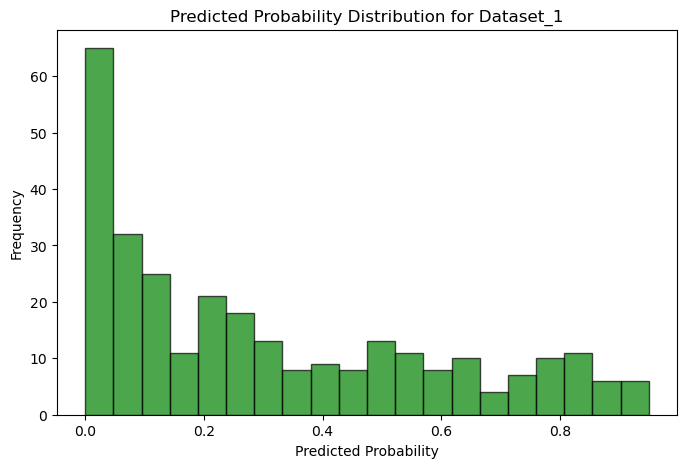

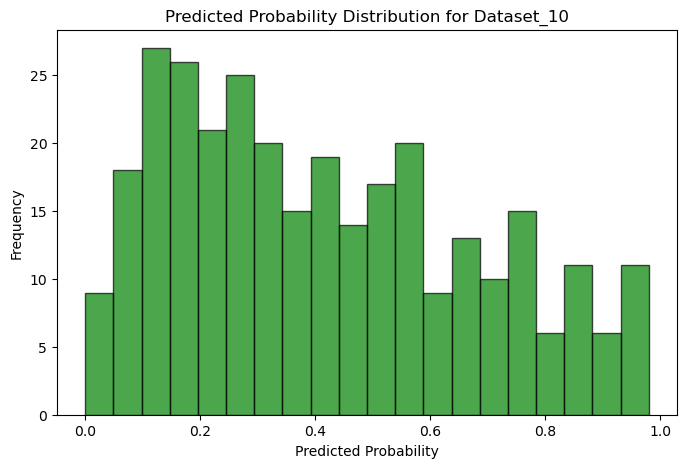

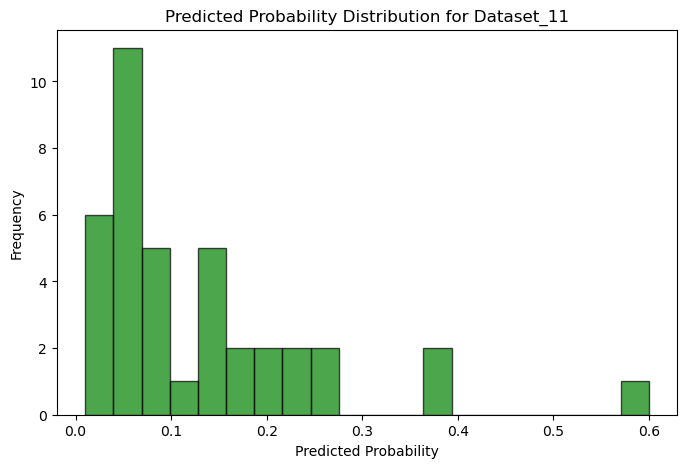

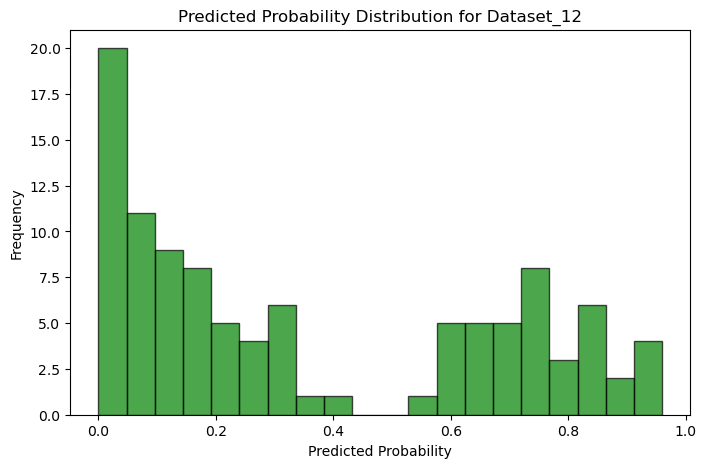

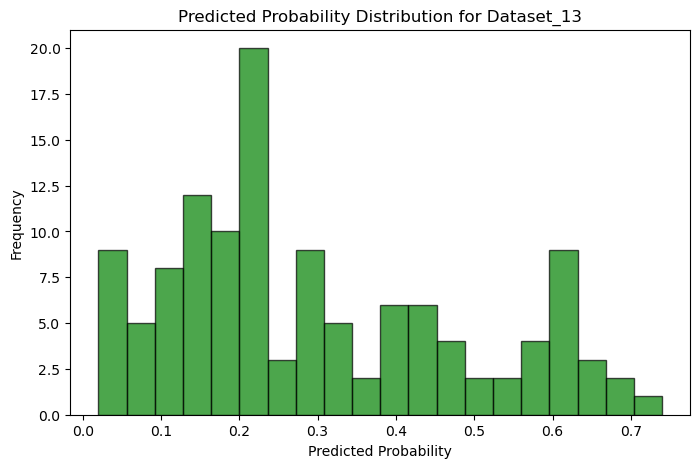

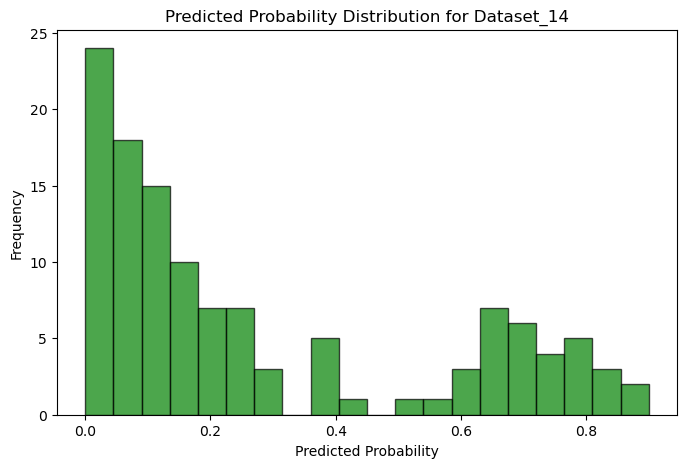

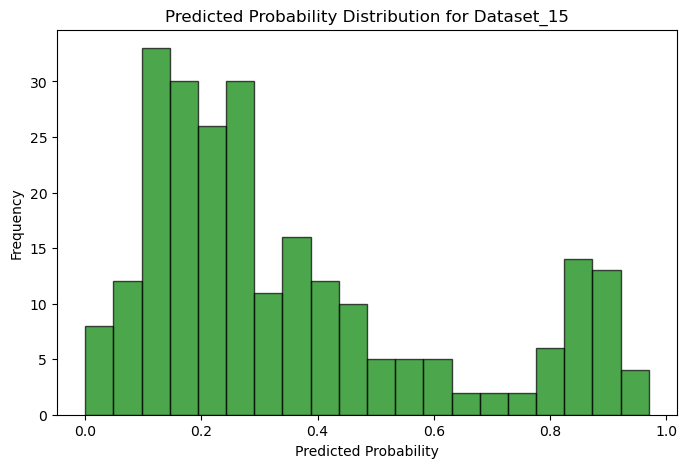

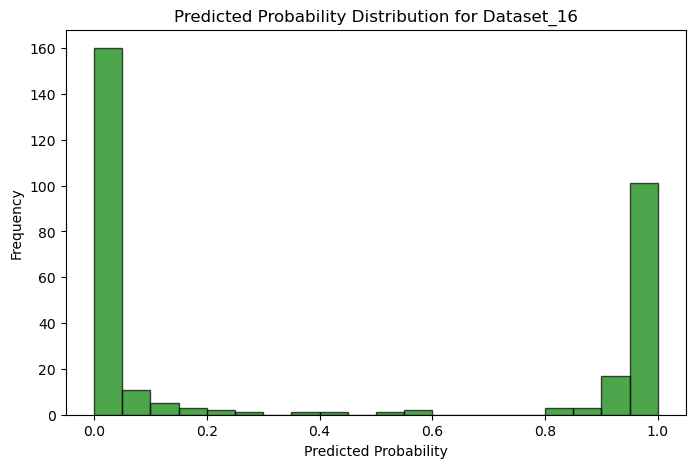

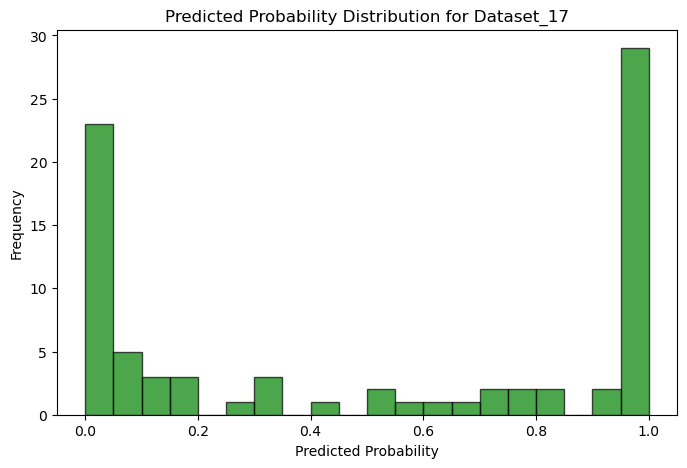

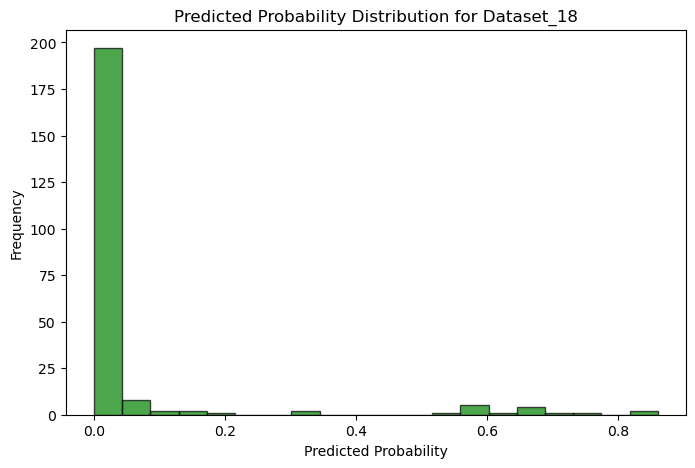

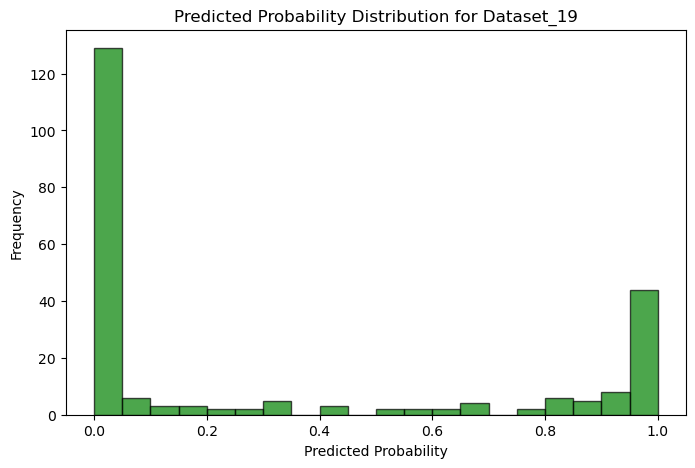

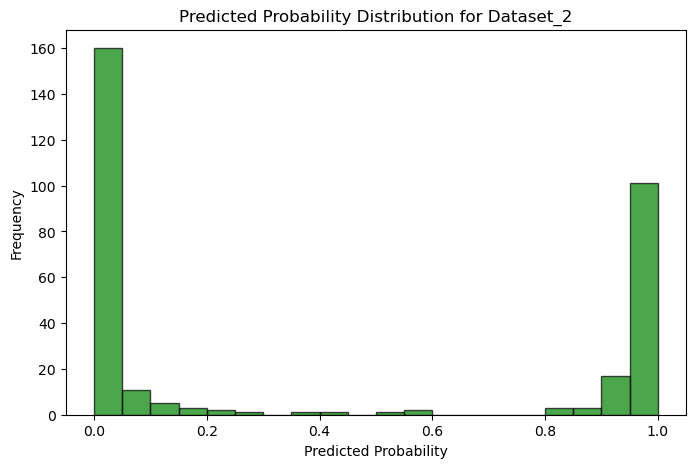

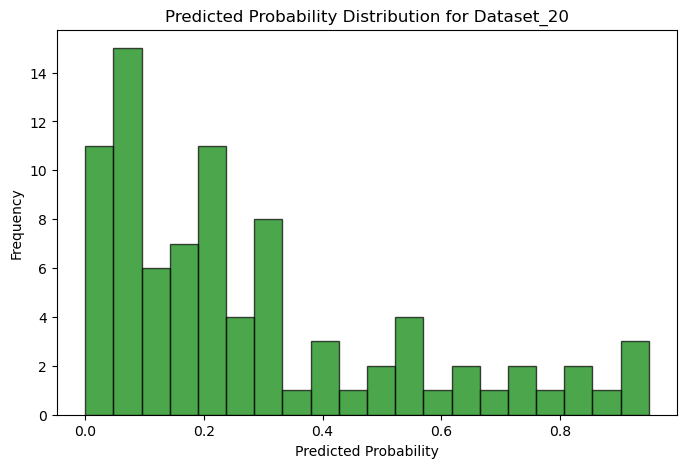

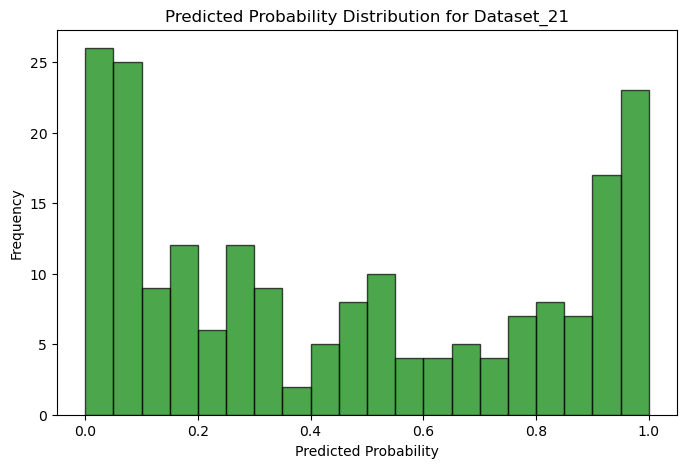

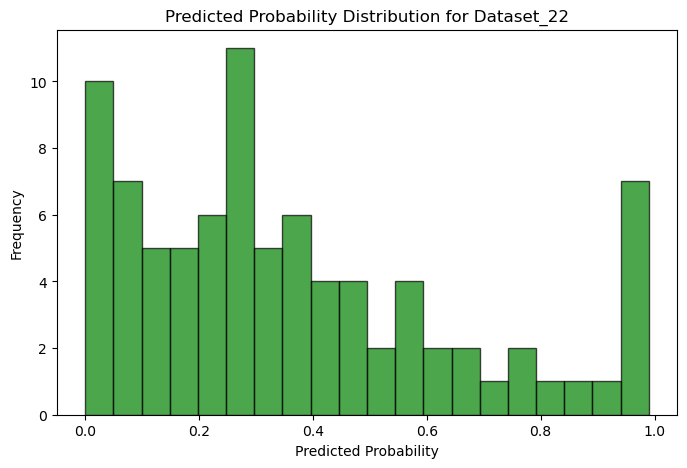

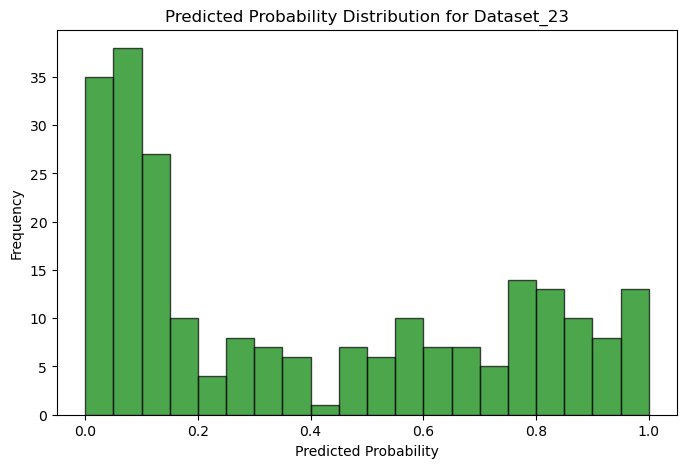

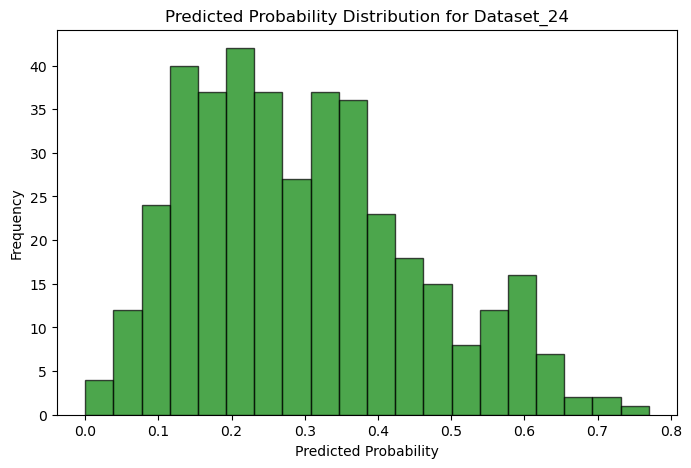

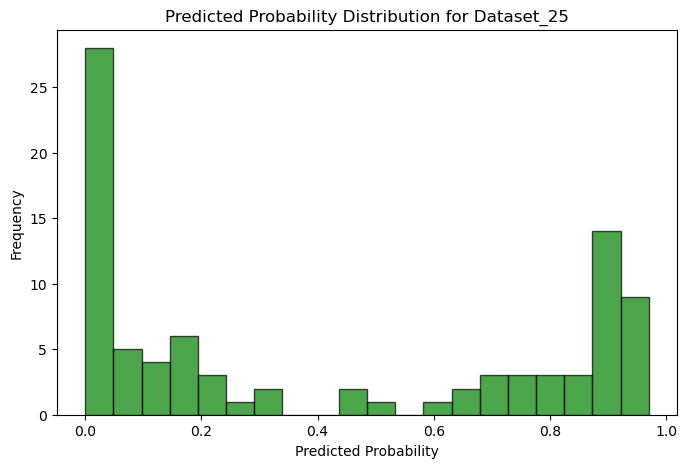

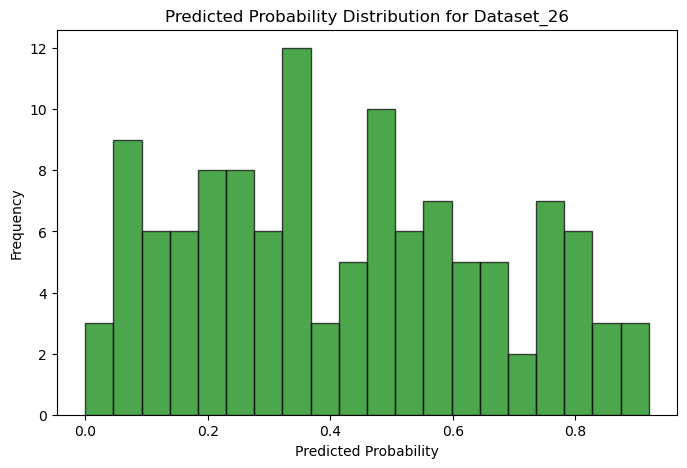

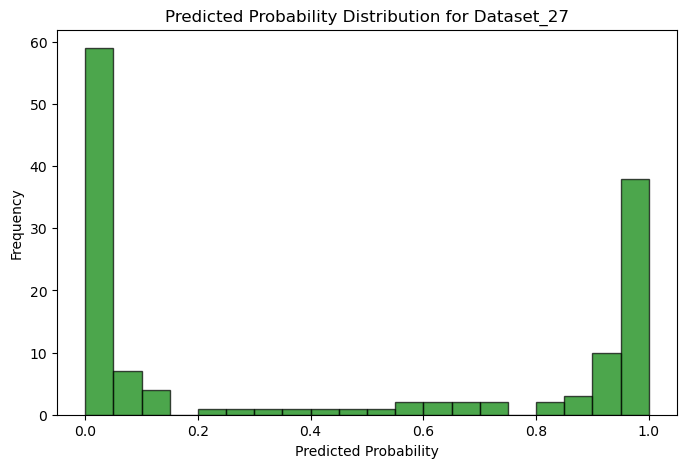

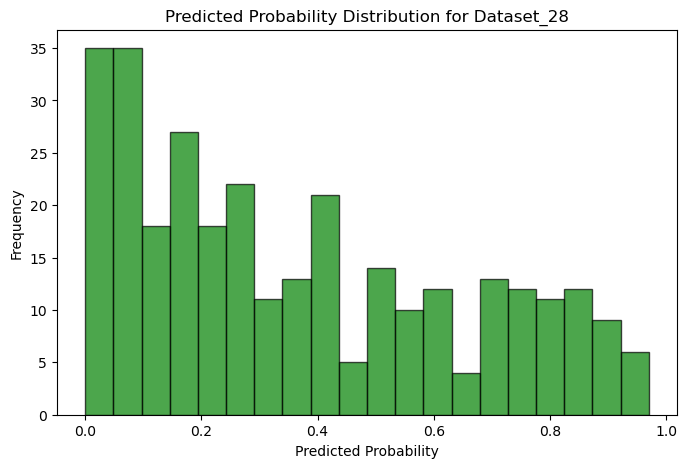

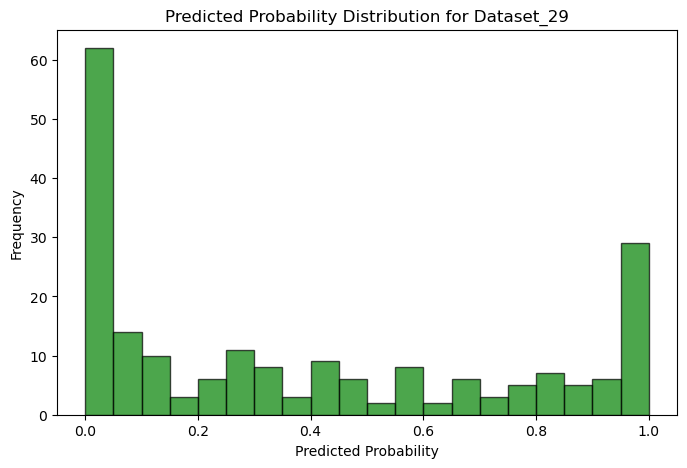

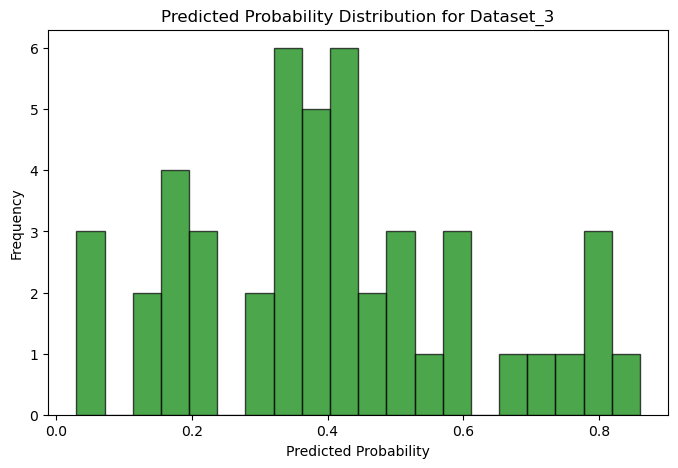

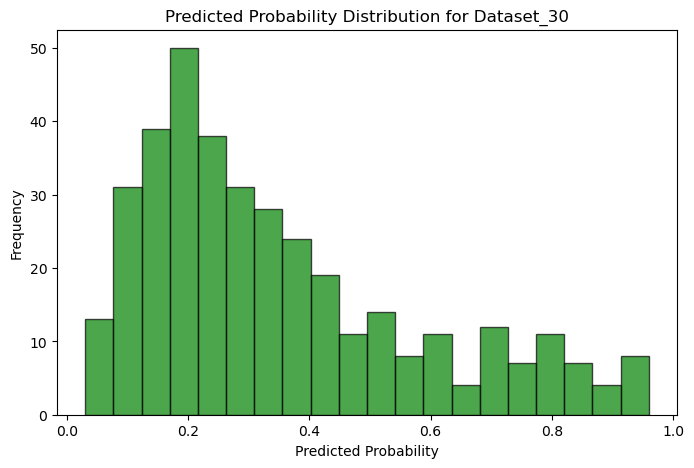

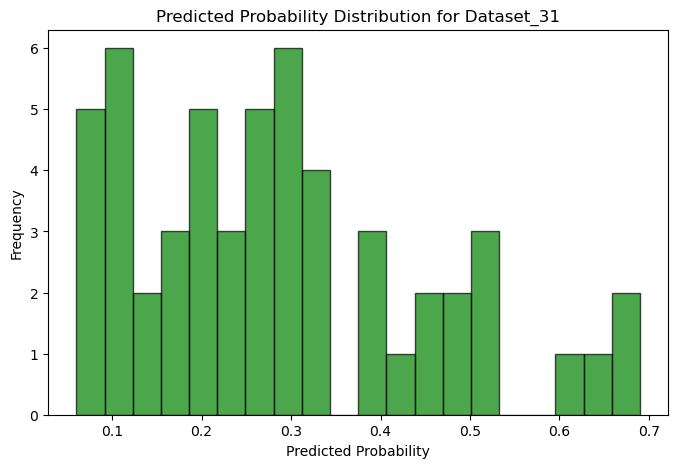

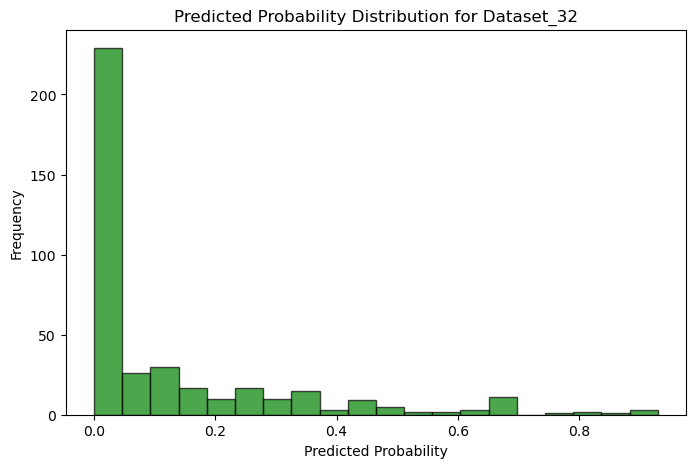

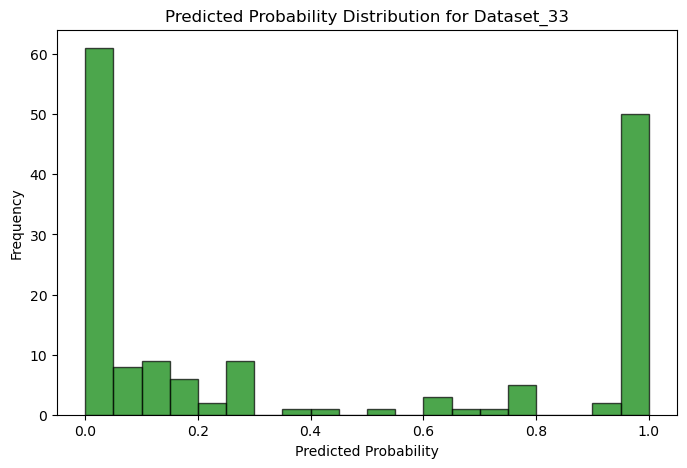

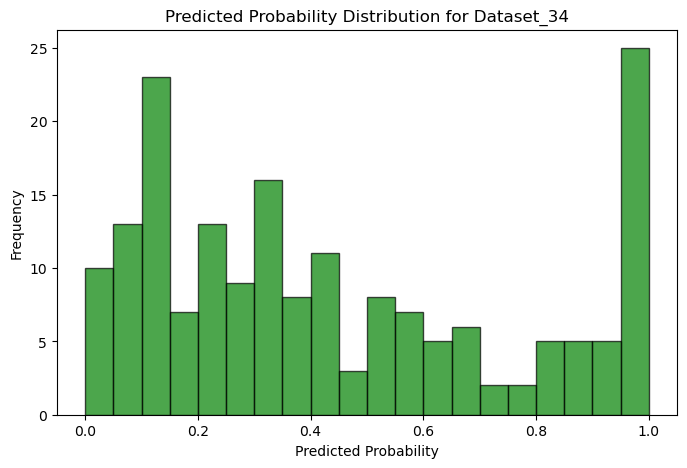

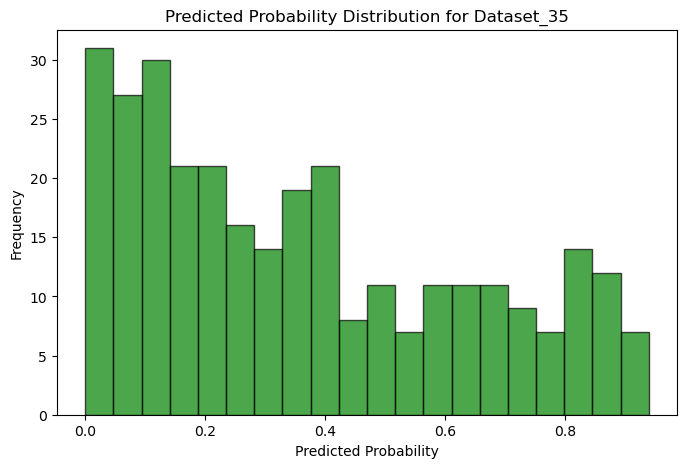

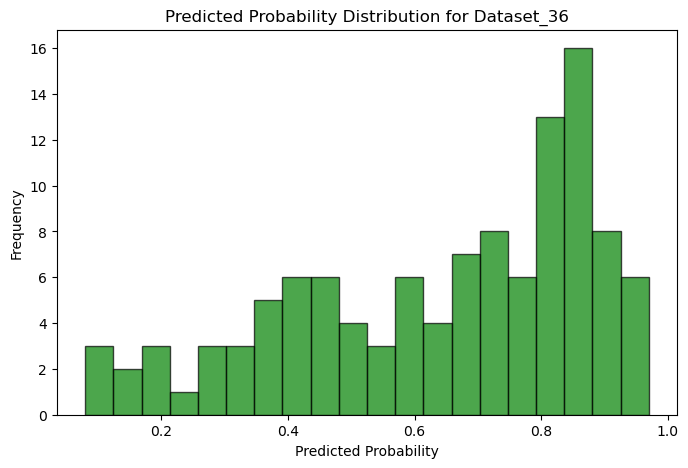

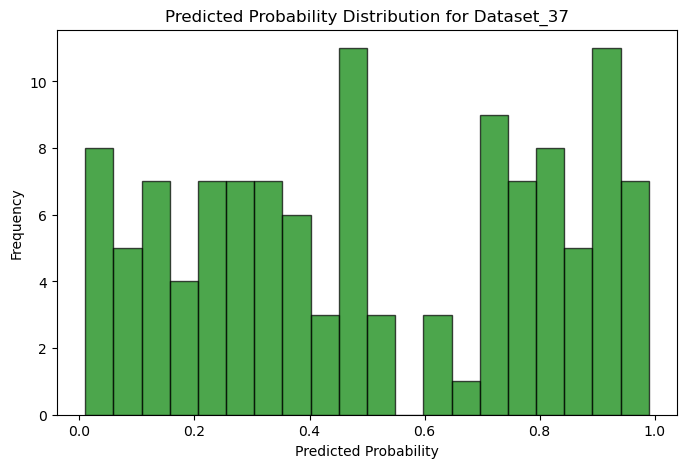

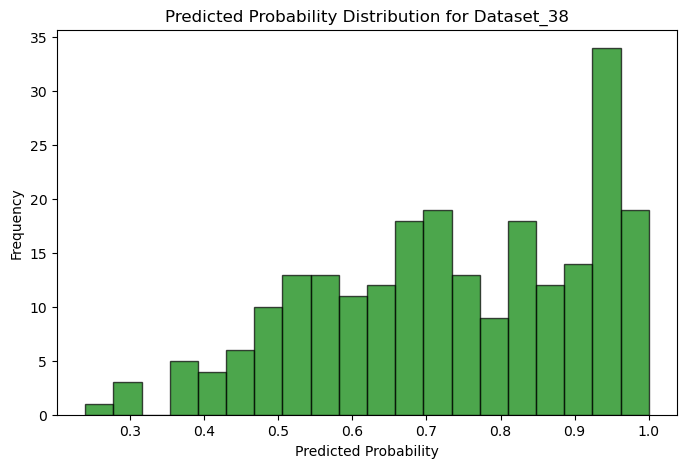

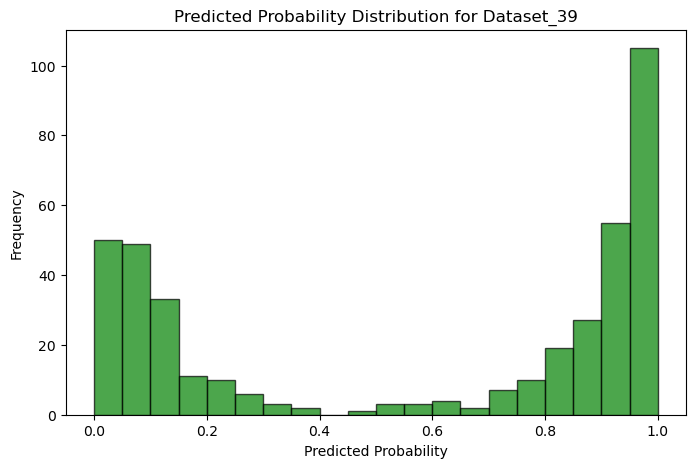

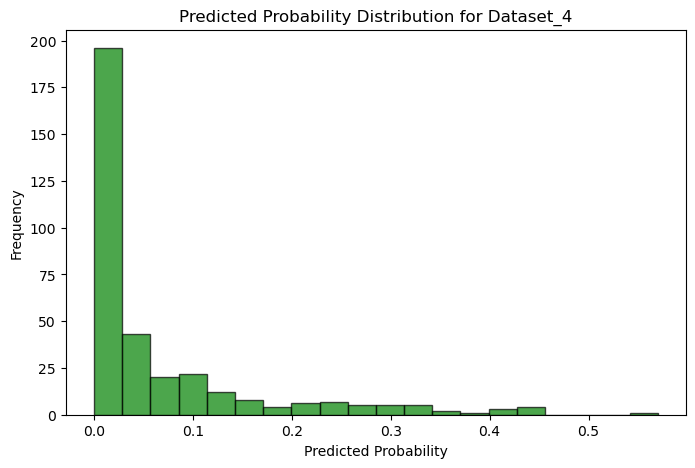

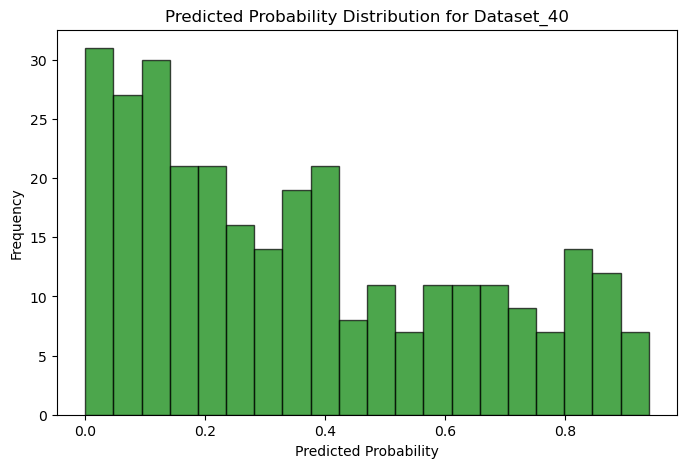

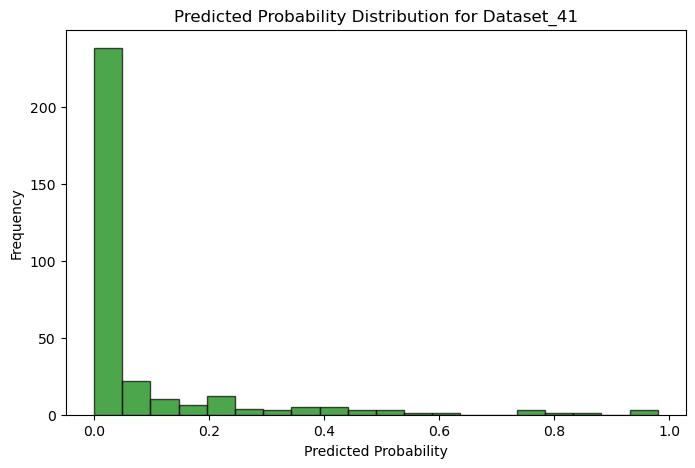

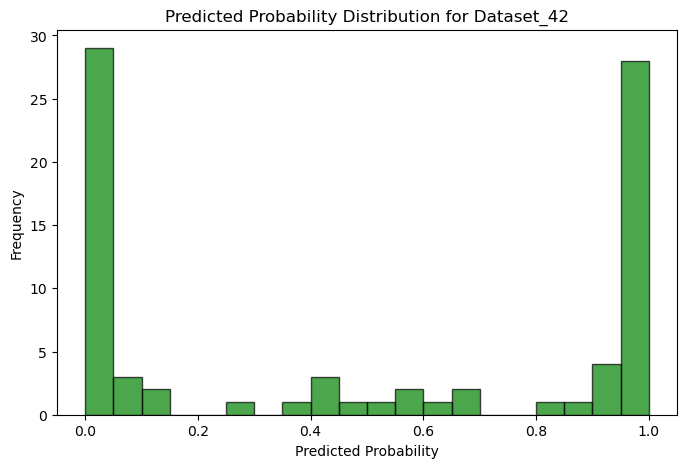

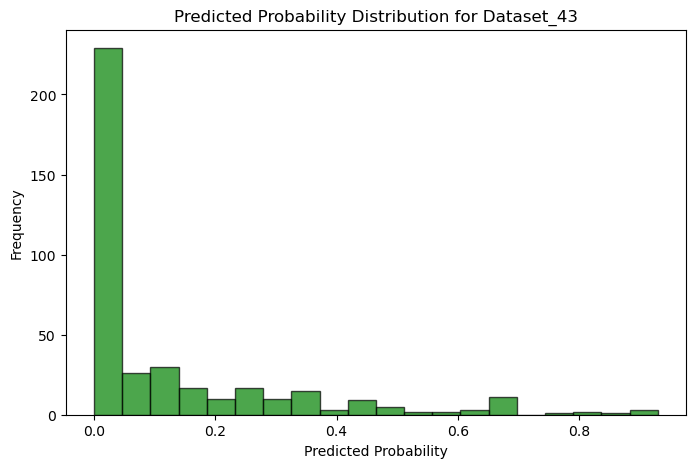

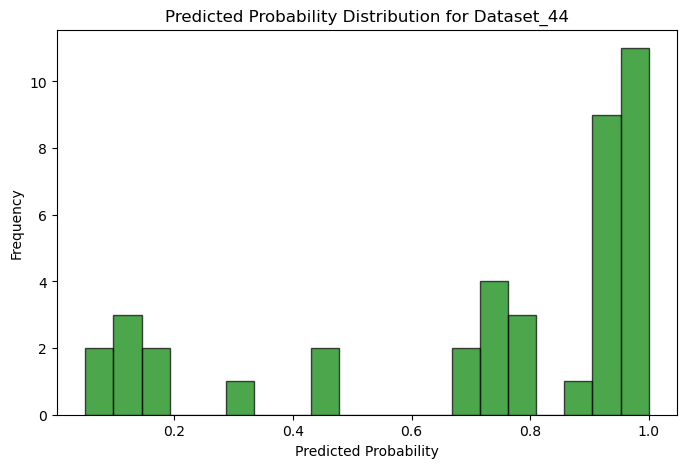

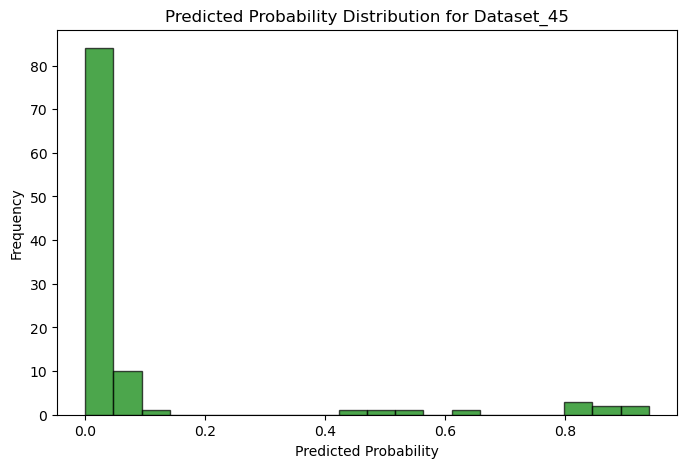

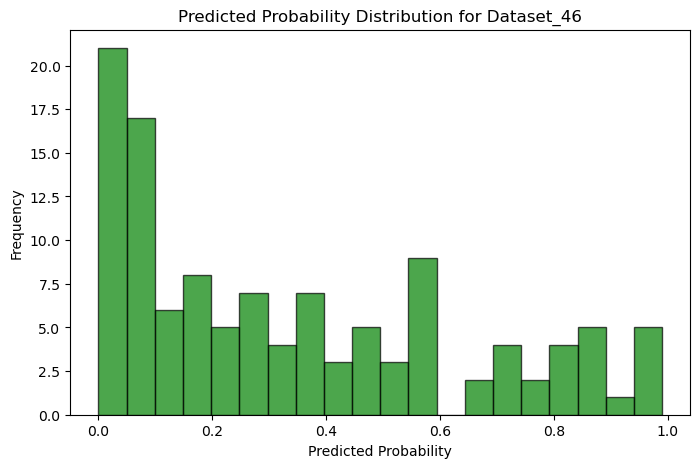

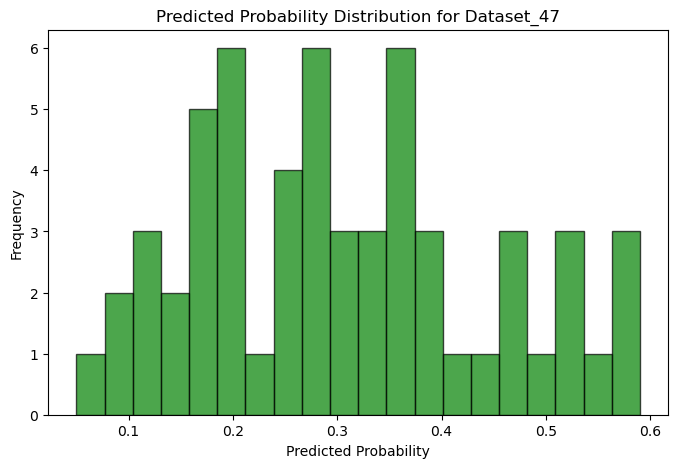

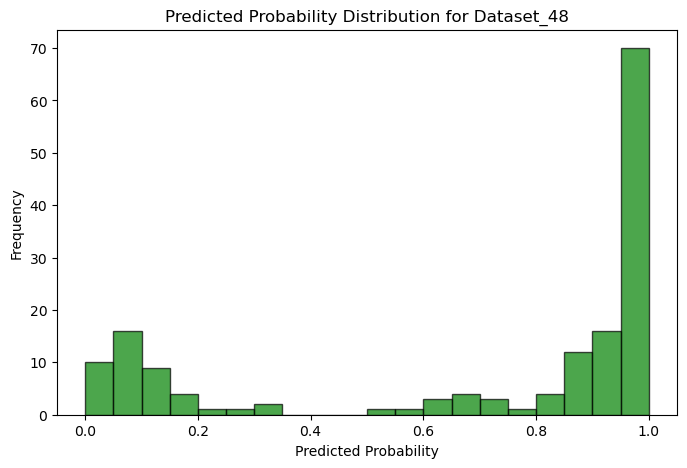

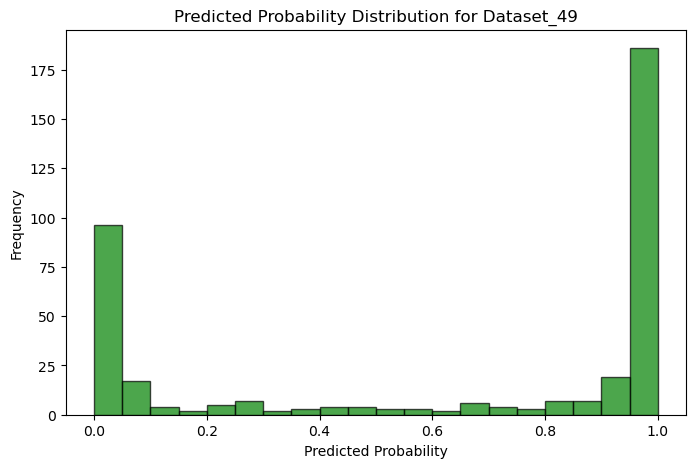

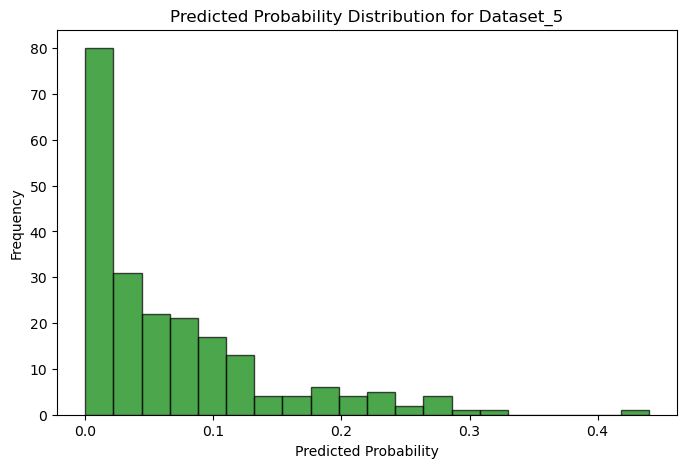

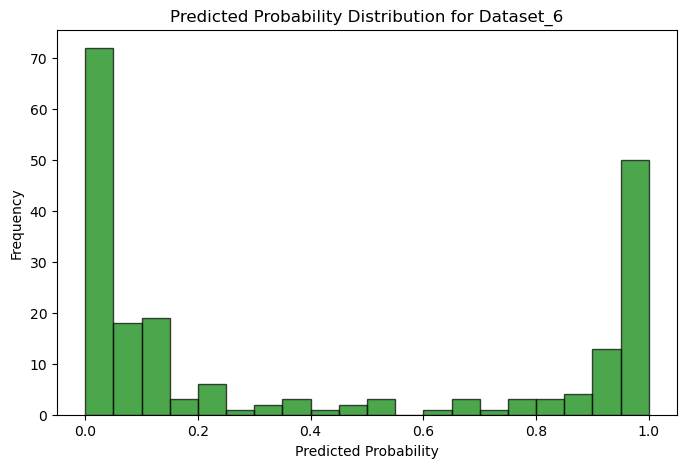

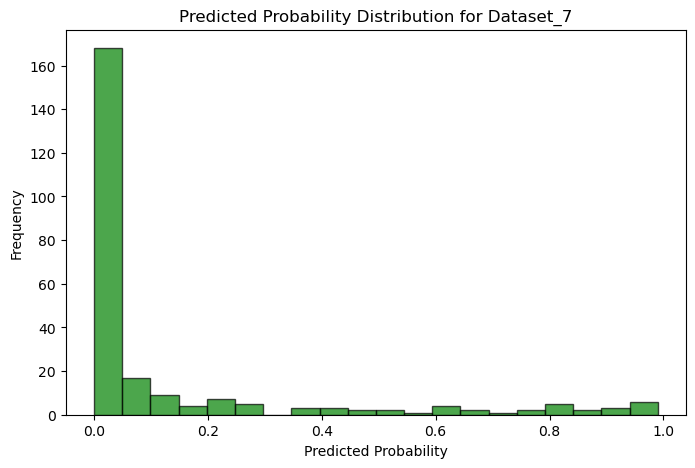

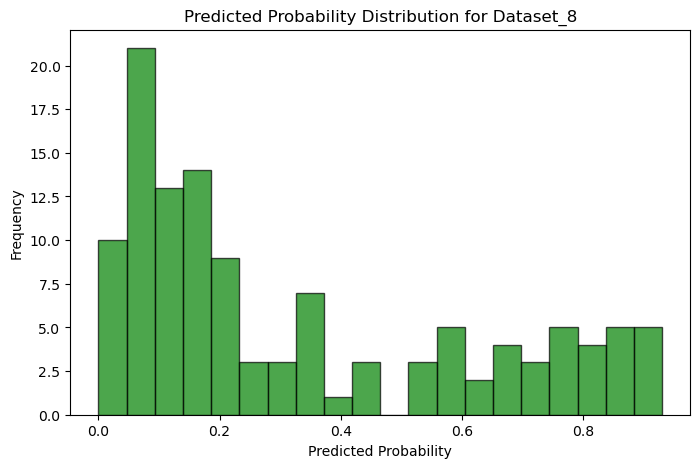

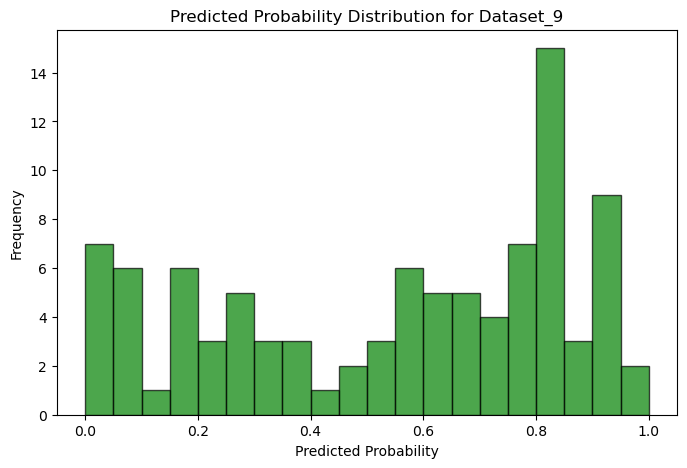

In [70]:
# Generate predictions for test datasets
for i in range(len(models)):  # Iterate over the length of the trained models
    try:
        # Predict probabilities for the test set using the trained Random Forest model
        y_predict_proba = models[i].predict_proba(X_tests[i])[:, 1]
        
        # Create a DataFrame with the prediction probabilities
        df = pd.DataFrame(y_predict_proba, columns=['y_predict_proba'])
        
        # Store the DataFrame in the list
        y_predicts.append(df)

        # Visualize predicted probability distributions
        plt.figure(figsize=(8, 5))
        plt.hist(df['y_predict_proba'], bins=20, color='green', edgecolor='black', alpha=0.7)
        plt.title(f"Predicted Probability Distribution for {dataset_names[i]}")
        plt.xlabel("Predicted Probability")
        plt.ylabel("Frequency")
        plt.show()

    except Exception as e:
        print(f"Error generating predictions for dataset {dataset_names[i]}: {e}")
        continue  # Skip to the next dataset

## Save result

In [71]:
# Save the predictions to CSV files for each dataset
for idx, dataset_name in enumerate(dataset_names[:len(y_predicts)]):  # Use only successfully processed datasets
    df = y_predicts[idx]
    output_path = f'./Competition_data/{dataset_name}/y_predict.csv'
    df.to_csv(output_path, index=False, header=True)  # Save CSV with appropriate header
    print(f"Predictions saved for dataset: {dataset_name} to {output_path}")

Predictions saved for dataset: Dataset_1 to ./Competition_data/Dataset_1/y_predict.csv
Predictions saved for dataset: Dataset_10 to ./Competition_data/Dataset_10/y_predict.csv
Predictions saved for dataset: Dataset_11 to ./Competition_data/Dataset_11/y_predict.csv
Predictions saved for dataset: Dataset_12 to ./Competition_data/Dataset_12/y_predict.csv
Predictions saved for dataset: Dataset_13 to ./Competition_data/Dataset_13/y_predict.csv
Predictions saved for dataset: Dataset_14 to ./Competition_data/Dataset_14/y_predict.csv
Predictions saved for dataset: Dataset_15 to ./Competition_data/Dataset_15/y_predict.csv
Predictions saved for dataset: Dataset_16 to ./Competition_data/Dataset_16/y_predict.csv
Predictions saved for dataset: Dataset_17 to ./Competition_data/Dataset_17/y_predict.csv
Predictions saved for dataset: Dataset_18 to ./Competition_data/Dataset_18/y_predict.csv
Predictions saved for dataset: Dataset_19 to ./Competition_data/Dataset_19/y_predict.csv
Predictions saved for d

Running Random Forest...
Dataset Dataset_1 - RF AUC: 0.8212
Dataset Dataset_10 - RF AUC: 0.7911
Dataset Dataset_11 - RF AUC: 0.5429
Dataset Dataset_12 - RF AUC: 0.9905
Dataset Dataset_13 - RF AUC: 0.9600
Dataset Dataset_14 - RF AUC: 1.0000
Dataset Dataset_15 - RF AUC: 0.7625
Dataset Dataset_16 - RF AUC: 0.9995
Dataset Dataset_17 - RF AUC: 0.9074
Dataset Dataset_18 - RF AUC: 1.0000
Dataset Dataset_19 - RF AUC: 0.9894
Dataset Dataset_2 - RF AUC: 0.9995
Dataset Dataset_20 - RF AUC: 0.9333
Dataset Dataset_21 - RF AUC: 0.9837
Dataset Dataset_22 - RF AUC: 0.8693
Dataset Dataset_23 - RF AUC: 0.9340
Dataset Dataset_24 - RF AUC: 0.6337
Dataset Dataset_25 - RF AUC: 0.9938
Dataset Dataset_26 - RF AUC: 0.8077
Dataset Dataset_27 - RF AUC: 1.0000
Dataset Dataset_28 - RF AUC: 0.8634
Dataset Dataset_29 - RF AUC: 0.9530
Dataset Dataset_3 - RF AUC: 0.8750
Dataset Dataset_30 - RF AUC: 0.8100
Dataset Dataset_31 - RF AUC: 0.7121
Dataset Dataset_32 - RF AUC: 0.7496
Dataset Dataset_33 - RF AUC: 1.0000
Datase

Dataset Dataset_29 - CATBOOST AUC: 0.9524
Dataset Dataset_3 - CATBOOST AUC: 0.7708
Dataset Dataset_30 - CATBOOST AUC: 0.8009
Dataset Dataset_31 - CATBOOST AUC: 0.6667
Dataset Dataset_32 - CATBOOST AUC: 0.7627
Dataset Dataset_33 - CATBOOST AUC: 1.0000
Dataset Dataset_34 - CATBOOST AUC: 0.8514
Dataset Dataset_35 - CATBOOST AUC: 0.8237
Dataset Dataset_36 - CATBOOST AUC: 1.0000
Dataset Dataset_37 - CATBOOST AUC: 0.8426
Dataset Dataset_38 - CATBOOST AUC: 0.7490
Dataset Dataset_39 - CATBOOST AUC: 0.9841
Dataset Dataset_4 - CATBOOST AUC: 0.5408
Dataset Dataset_40 - CATBOOST AUC: 0.8237
Dataset Dataset_41 - CATBOOST AUC: 0.9815
Dataset Dataset_42 - CATBOOST AUC: 1.0000
Dataset Dataset_43 - CATBOOST AUC: 0.7627
Dataset Dataset_44 - CATBOOST AUC: 1.0000
Dataset Dataset_45 - CATBOOST AUC: 1.0000
Dataset Dataset_46 - CATBOOST AUC: 0.9587
Dataset Dataset_47 - CATBOOST AUC: 0.5536
Dataset Dataset_48 - CATBOOST AUC: 1.0000
Dataset Dataset_49 - CATBOOST AUC: 0.9848
Dataset Dataset_5 - CATBOOST AUC: 0.

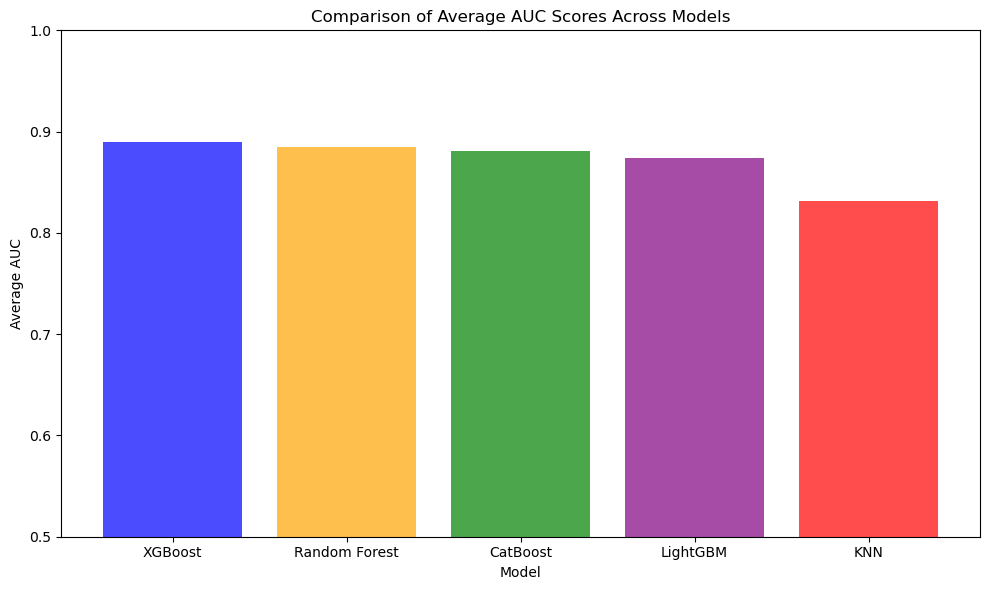

In [83]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import roc_auc_score
import warnings
import logging

# Suppress warnings
warnings.filterwarnings("ignore", category=UserWarning)
warnings.filterwarnings("ignore", category=RuntimeWarning)

# Suppress LightGBM logs
logging.getLogger("lightgbm").setLevel(logging.CRITICAL)

# Function to train and evaluate a model
def train_and_evaluate(model_type="rf"):
    dataset_names = []
    X_trains = []
    y_trains = []
    X_tests = []
    auc_scores = []

    # Load datasets
    for folder_name in os.listdir("./Competition_data"):
        dataset_names.append(folder_name)
        X_trains.append(pd.read_csv(f"./Competition_data/{folder_name}/X_train.csv", header=0))
        y_trains.append(pd.read_csv(f"./Competition_data/{folder_name}/y_train.csv", header=0))
        X_tests.append(pd.read_csv(f"./Competition_data/{folder_name}/X_test.csv", header=0))

    for i in range(len(dataset_names)):
        # Preprocessing
        X_train = X_trains[i]
        y_train = y_trains[i].squeeze()  # Flatten target to 1D array
        X_test = X_tests[i]

        # Handle missing values
        X_train = X_train.fillna(X_train.mean())
        X_test = X_test.fillna(X_train.mean())

        # Standardize numerical features
        scaler = StandardScaler()
        X_train_scaled = scaler.fit_transform(X_train)
        X_test_scaled = scaler.transform(X_test)

        # Train-test split
        tmp_X_train, tmp_X_test, tmp_y_train, tmp_y_test = train_test_split(
            X_train_scaled, y_train, test_size=0.2, random_state=42
        )

        # Choose the model
        if model_type == "rf":
            model = RandomForestClassifier(n_estimators=200, max_depth=15, random_state=42)
        elif model_type == "knn":
            model = KNeighborsClassifier(n_neighbors=5, weights="distance", p=2)
        elif model_type == "xgb":
            model = XGBClassifier(
                n_estimators=200, learning_rate=0.1, max_depth=10, random_state=42, eval_metric="logloss"
            )
        elif model_type == "lgbm":
            model = LGBMClassifier(
                n_estimators=200,
                learning_rate=0.1,
                max_depth=10,
                min_split_gain=0.01,  # Ensure meaningful splits
                min_child_samples=20,  # Reduce overfitting for small datasets
                random_state=42,
                verbose=-1  # Suppress LightGBM warnings
            )
        elif model_type == "catboost":
            model = CatBoostClassifier(
                iterations=200, learning_rate=0.1, depth=10, random_seed=42, verbose=0
            )
        else:
            raise ValueError("Invalid model type. Choose 'rf', 'knn', 'xgb', 'lgbm', or 'catboost'.")

        # Train the model
        model.fit(tmp_X_train, tmp_y_train)

        # Evaluate using AUC
        tmp_y_prob = (
            model.predict_proba(tmp_X_test)[:, 1]
            if hasattr(model, "predict_proba")
            else model.predict(tmp_X_test)
        )
        auc = roc_auc_score(tmp_y_test, tmp_y_prob)
        print(f"Dataset {dataset_names[i]} - {model_type.upper()} AUC: {auc:.4f}")
        auc_scores.append(auc)

    return dataset_names, auc_scores


# Train and evaluate for all models 
print("Running Random Forest...")
rf_dataset_names, rf_auc_scores = train_and_evaluate(model_type="rf")

print("\nRunning KNN...")
knn_dataset_names, knn_auc_scores = train_and_evaluate(model_type="knn")

print("\nRunning XGBoost...")
xgb_dataset_names, xgb_auc_scores = train_and_evaluate(model_type="xgb")

print("\nRunning LightGBM...")
lgbm_dataset_names, lgbm_auc_scores = train_and_evaluate(model_type="lgbm")

print("\nRunning CatBoost...")
catboost_dataset_names, catboost_auc_scores = train_and_evaluate(model_type="catboost")

# Calculate average AUC scores
model_names = ["Random Forest", "KNN", "XGBoost", "LightGBM", "CatBoost"]
average_aucs = [
    np.mean(rf_auc_scores),
    np.mean(knn_auc_scores),
    np.mean(xgb_auc_scores),
    np.mean(lgbm_auc_scores),
    np.mean(catboost_auc_scores),
]

# Display the averages
comparison_df = pd.DataFrame({"Model": model_names, "Average AUC": average_aucs}).sort_values(by="Average AUC", ascending=False)
print(comparison_df)

# Plot the comparison of average AUCs
plt.figure(figsize=(10, 6))
plt.bar(comparison_df["Model"], comparison_df["Average AUC"], color=["blue", "orange", "green", "purple", "red"], alpha=0.7)
plt.xlabel("Model")
plt.ylabel("Average AUC")
plt.title("Comparison of Average AUC Scores Across Models")
plt.ylim(0.5, 1.0)  # Assuming AUC ranges between 0.5 and 1.0
plt.tight_layout()
plt.show()



Dataset: Dataset_1
Training base model 1: RandomForestClassifier
Training base model 2: XGBClassifier
Training base model 3: LGBMClassifier
Training base model 4: CatBoostClassifier
Training meta-model...
Stacked model AUC: 0.8139

Dataset: Dataset_10
Training base model 1: RandomForestClassifier
Training base model 2: XGBClassifier
Training base model 3: LGBMClassifier
Training base model 4: CatBoostClassifier
Training meta-model...
Stacked model AUC: 0.7703

Dataset: Dataset_11
Training base model 1: RandomForestClassifier
Training base model 2: XGBClassifier
Training base model 3: LGBMClassifier
Training base model 4: CatBoostClassifier
Training meta-model...
Stacked model AUC: 0.5426

Dataset: Dataset_12
Training base model 1: RandomForestClassifier
Training base model 2: XGBClassifier
Training base model 3: LGBMClassifier
Training base model 4: CatBoostClassifier
Training meta-model...
Stacked model AUC: 0.9598

Dataset: Dataset_13
Training base model 1: RandomForestClassifier
Tr

Training base model 2: XGBClassifier
Training base model 3: LGBMClassifier
Training base model 4: CatBoostClassifier
Training meta-model...
Stacked model AUC: 0.9821

Dataset: Dataset_42
Training base model 1: RandomForestClassifier
Training base model 2: XGBClassifier
Training base model 3: LGBMClassifier
Training base model 4: CatBoostClassifier
Training meta-model...
Stacked model AUC: 1.0000

Dataset: Dataset_43
Training base model 1: RandomForestClassifier
Training base model 2: XGBClassifier
Training base model 3: LGBMClassifier
Training base model 4: CatBoostClassifier
Training meta-model...
Stacked model AUC: 0.7330

Dataset: Dataset_44
Training base model 1: RandomForestClassifier
Training base model 2: XGBClassifier
Training base model 3: LGBMClassifier
Training base model 4: CatBoostClassifier
Training meta-model...
Stacked model AUC: 0.9897

Dataset: Dataset_45
Training base model 1: RandomForestClassifier
Training base model 2: XGBClassifier
Training base model 3: LGBMClas

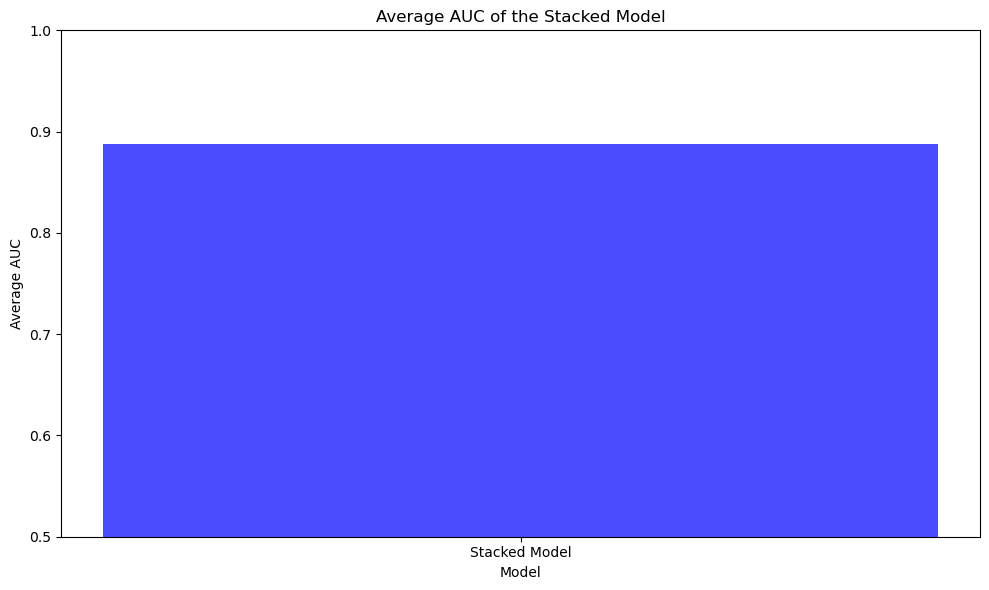

In [82]:
import os
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import roc_auc_score
from sklearn.base import clone

# Suppress warnings
import warnings
warnings.filterwarnings("ignore", category=UserWarning)

# Load and preprocess the datasets
def load_and_preprocess_datasets():
    dataset_names = []
    X_trains, y_trains, X_tests = [], [], []

    for folder_name in os.listdir("./Competition_data"):
        dataset_names.append(folder_name)
        X_trains.append(pd.read_csv(f"./Competition_data/{folder_name}/X_train.csv", header=0))
        y_trains.append(pd.read_csv(f"./Competition_data/{folder_name}/y_train.csv", header=0).squeeze())
        X_tests.append(pd.read_csv(f"./Competition_data/{folder_name}/X_test.csv", header=0))

    # Preprocessing: handle missing values and standardize features
    scalers = []
    for i in range(len(X_trains)):
        X_trains[i] = X_trains[i].fillna(X_trains[i].mean())
        X_tests[i] = X_tests[i].fillna(X_trains[i].mean())
        scaler = StandardScaler()
        X_trains[i] = scaler.fit_transform(X_trains[i])
        X_tests[i] = scaler.transform(X_tests[i])
        scalers.append(scaler)

    return dataset_names, X_trains, y_trains, X_tests, scalers

# Stacking ensemble
def stacking_ensemble(X_train, y_train, X_test, base_models, meta_model):
    """Train a stacking ensemble with base models and a meta-model."""
    n_splits = 5
    skf = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=42)

    meta_features = np.zeros((len(y_train), len(base_models)))  # Out-of-fold predictions for training meta-model
    test_meta_features = np.zeros((len(X_test), len(base_models)))  # Predictions for test set

    # Train each base model
    for i, model in enumerate(base_models):
        test_fold_preds = []
        print(f"Training base model {i + 1}: {model.__class__.__name__}")

        for train_idx, val_idx in skf.split(X_train, y_train):
            X_fold_train, X_fold_val = X_train[train_idx], X_train[val_idx]
            y_fold_train, y_fold_val = y_train[train_idx], y_train[val_idx]

            model_clone = clone(model)
            model_clone.fit(X_fold_train, y_fold_train)

            # Store out-of-fold predictions for meta-model training
            meta_features[val_idx, i] = model_clone.predict_proba(X_fold_val)[:, 1]

            # Predict on the test set in each fold
            test_fold_preds.append(model_clone.predict_proba(X_test)[:, 1])

        # Average test predictions across folds
        test_meta_features[:, i] = np.mean(test_fold_preds, axis=0)

    # Train meta-model on meta-features
    print("Training meta-model...")
    meta_model.fit(meta_features, y_train)
    stacked_test_preds = meta_model.predict_proba(test_meta_features)[:, 1]

    return meta_model, stacked_test_preds, meta_features

# Load and preprocess data
dataset_names, X_trains, y_trains, X_tests, scalers = load_and_preprocess_datasets()

# Define base models
base_models = [
    RandomForestClassifier(n_estimators=200, max_depth=15, random_state=42),
    XGBClassifier(n_estimators=200, learning_rate=0.1, max_depth=10, random_state=42, eval_metric="logloss"),
    LGBMClassifier(n_estimators=200, learning_rate=0.1, max_depth=10, random_state=42, verbose=-1),
    CatBoostClassifier(iterations=200, learning_rate=0.1, depth=10, random_seed=42, verbose=0),
]

# Define meta-model
meta_model = LogisticRegression()

# Train and evaluate stacking ensemble on each dataset
stacked_aucs = []
for i, dataset_name in enumerate(dataset_names):
    print(f"\nDataset: {dataset_name}")
    X_train, y_train = np.array(X_trains[i]), np.array(y_trains[i])
    X_test = np.array(X_tests[i])

    # Train stacking ensemble
    stacked_meta_model, stacked_test_preds, stacked_meta_features = stacking_ensemble(
        X_train, y_train, X_test, base_models, meta_model
    )

    # Evaluate stacked model
    stacked_auc = roc_auc_score(y_train, stacked_meta_features[:, 0])
    stacked_aucs.append(stacked_auc)
    print(f"Stacked model AUC: {stacked_auc:.4f}")

    # Save predictions for the test set
    stacked_df = pd.DataFrame(stacked_test_preds, columns=["y_predict_proba"])
    stacked_df.to_csv(f"./Competition_data/{dataset_name}/y_predict_stacked.csv", index=False)

# Calculate and display the average AUC of the stacked model
average_stacked_auc = np.mean(stacked_aucs)
print(f"\nAverage Stacked Model AUC Across All Datasets: {average_stacked_auc:.4f}")

# Plot the comparison of average AUCs
model_names = ["Stacked Model"]
average_aucs = [average_stacked_auc]

plt.figure(figsize=(10, 6))
plt.bar(model_names, average_aucs, color=["blue"], alpha=0.7)
plt.xlabel("Model")
plt.ylabel("Average AUC")
plt.title("Average AUC of the Stacked Model")
plt.ylim(0.5, 1.0)  # Assuming AUC ranges between 0.5 and 1.0
plt.tight_layout()
plt.show()


In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from xgboost import XGBClassifier, plot_importance
from sklearn.model_selection import train_test_split, RandomizedSearchCV, StratifiedKFold
from sklearn.preprocessing import StandardScaler, MinMaxScaler, PolynomialFeatures
from sklearn.metrics import roc_auc_score, precision_score, recall_score, f1_score, roc_curve
from collections import Counter
import warnings
import json
import shap

# Suppress warnings
warnings.filterwarnings("ignore", category=UserWarning)

# Turn off interactive plotting to prevent figures from displaying automatically
plt.ioff()

def make_serializable(obj):
    """
    Recursively convert NumPy data types in the input object to native Python types.
    """
    if isinstance(obj, dict):
        return {k: make_serializable(v) for k, v in obj.items()}
    elif isinstance(obj, list):
        return [make_serializable(i) for i in obj]
    elif isinstance(obj, np.integer):
        return int(obj)
    elif isinstance(obj, np.floating):
        return float(obj)
    elif isinstance(obj, np.ndarray):
        return obj.tolist()
    else:
        return obj

def train_and_predict_with_xgb():
    # Initialize lists and dictionaries to store data and results
    dataset_names = []
    X_trains = []
    y_trains = []
    X_tests = []
    auc_scores = []
    dataset_auc = {}
    dataset_metrics = {}
    dataset_best_params = {}
    
    # List of datasets with low AUC that need special attention
    low_auc_datasets = [
        'Dataset_4', 'Dataset_11', 'Dataset_24', 'Dataset_31',
        'Dataset_32', 'Dataset_43', 'Dataset_47'
    ]
    
    # Path to competition data
    data_path = "./Competition_data"
    
    # Load datasets
    for folder_name in os.listdir(data_path):
        folder_path = os.path.join(data_path, folder_name)
        if os.path.isdir(folder_path):
            dataset_names.append(folder_name)
            X_trains.append(pd.read_csv(os.path.join(folder_path, "X_train.csv"), header=0))
            y_trains.append(pd.read_csv(os.path.join(folder_path, "y_train.csv"), header=0))
            X_tests.append(pd.read_csv(os.path.join(folder_path, "X_test.csv"), header=0))
    
    # Iterate through datasets
    for i in range(len(dataset_names)):
        print(f"\nProcessing {dataset_names[i]}...")
        
        # Preprocessing
        X_train = X_trains[i]
        y_train = y_trains[i].squeeze()  # Flatten target to 1D array
        X_test = X_tests[i]
        
        # Handle missing values by filling with mean
        X_train = X_train.fillna(X_train.mean())
        X_test = X_test.fillna(X_train.mean())
        
        # Feature Scaling: Try different scalers
        scaler = MinMaxScaler()
        X_train_scaled = scaler.fit_transform(X_train)
        X_test_scaled = scaler.transform(X_test)
        
        # Feature Engineering: Polynomial Features for low AUC datasets
        if dataset_names[i] in low_auc_datasets:
            poly = PolynomialFeatures(degree=2, interaction_only=True, include_bias=False)
            X_train_scaled = poly.fit_transform(X_train_scaled)
            X_test_scaled = poly.transform(X_test_scaled)
            feature_names = poly.get_feature_names_out(X_train.columns)
        else:
            feature_names = X_train.columns
        
        # Train-test split with stratification
        tmp_X_train, tmp_X_test, tmp_y_train, tmp_y_test = train_test_split(
            X_train_scaled, y_train, test_size=0.2, random_state=42, stratify=y_train
        )
        
        # Handle class imbalance using scale_pos_weight
        counter = Counter(tmp_y_train)
        majority_class = max(counter, key=counter.get)
        minority_class = min(counter, key=counter.get)
        scale_pos_weight = counter[majority_class] / counter[minority_class] if counter[minority_class] != 0 else 1
        
        # Define hyperparameter distributions for RandomizedSearchCV
        param_dist = {
            'n_estimators': np.arange(100, 1001, 100),
            'max_depth': np.arange(3, 16, 1),
            'learning_rate': np.linspace(0.01, 0.2, 20),
            'subsample': np.linspace(0.6, 1.0, 5),
            'colsample_bytree': np.linspace(0.6, 1.0, 5),
            'gamma': [0, 1, 5],
            'min_child_weight': [1, 5, 10],
            'scale_pos_weight': [1, scale_pos_weight],
            'reg_alpha': np.logspace(-5, 1, 10),
            'reg_lambda': np.logspace(-5, 1, 10)
        }
        
        # Initialize the XGBoost classifier
        xgb_model = XGBClassifier(
            random_state=42,
            eval_metric="logloss",
            use_label_encoder=False,
            n_jobs=-1
        )
        
        # Initialize StratifiedKFold
        skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
        
        # Initialize RandomizedSearchCV
        randomized_search = RandomizedSearchCV(
            estimator=xgb_model,
            param_distributions=param_dist,
            n_iter=100,  # Increased iterations for better hyperparameter exploration
            scoring='roc_auc',
            cv=skf,
            random_state=42,
            n_jobs=-1,
            verbose=1
        )
        
        # Fit RandomizedSearchCV
        randomized_search.fit(tmp_X_train, tmp_y_train)
        best_model = randomized_search.best_estimator_
        best_params = randomized_search.best_params_
        dataset_best_params[dataset_names[i]] = best_params
        
        # Feature Selection using feature importances from the best model
        best_model.fit(tmp_X_train, tmp_y_train, verbose=False)
        importances = best_model.feature_importances_
        indices = np.argsort(importances)[::-1]
        # Select top features (e.g., top 20)
        top_n = min(20, len(importances))  # Ensure we don't exceed available features
        selected_indices = indices[:top_n]
        tmp_X_train_selected = tmp_X_train[:, selected_indices]
        tmp_X_test_selected = tmp_X_test[:, selected_indices]
        X_test_selected = X_test_scaled[:, selected_indices]
        selected_feature_names = np.array(feature_names)[selected_indices]
        
        # Retrain model with selected features
        best_model.fit(tmp_X_train_selected, tmp_y_train, verbose=False)
        
        # Predict probabilities on validation set
        tmp_y_prob = best_model.predict_proba(tmp_X_test_selected)[:, 1]
        auc = roc_auc_score(tmp_y_test, tmp_y_prob)
        
        # Predict on validation set for additional metrics
        tmp_y_pred = best_model.predict(tmp_X_test_selected)
        precision = precision_score(tmp_y_test, tmp_y_pred)
        recall = recall_score(tmp_y_test, tmp_y_pred)
        f1 = f1_score(tmp_y_test, tmp_y_pred)
        
        # Store metrics
        auc_scores.append(auc)
        dataset_auc[dataset_names[i]] = auc
        dataset_metrics[dataset_names[i]] = {
            'AUC': auc,
            'Precision': precision,
            'Recall': recall,
            'F1-Score': f1
        }
        
        print(f"Dataset {dataset_names[i]} - AUC: {auc:.4f}, Precision: {precision:.4f}, Recall: {recall:.4f}, F1-Score: {f1:.4f}")
        
        # Predict on test set
        y_predict_proba = best_model.predict_proba(X_test_selected)[:, 1]
        
        # Adjust threshold based on ROC curve
        fpr, tpr, thresholds = roc_curve(tmp_y_test, tmp_y_prob)
        optimal_idx = np.argmax(tpr - fpr)
        optimal_threshold = thresholds[optimal_idx]
        
        y_predict = (y_predict_proba >= optimal_threshold).astype(int)
        
        # Save predictions to CSV
        output_df = pd.DataFrame({
            "y_predict_proba": y_predict_proba,
            "y_predict": y_predict
        })
        output_csv_path = os.path.join(data_path, dataset_names[i], "y_predict_xgb.csv")
        output_df.to_csv(output_csv_path, index=False)
        
        # Feature Importance Plot
        fig, ax = plt.subplots(figsize=(10, 8))
        plot_importance(best_model, ax=ax, max_num_features=10, importance_type='gain')
        ax.set_title(f'Feature Importance for {dataset_names[i]}')
        plt.tight_layout()
        plt.savefig(os.path.join(data_path, dataset_names[i], "feature_importance.png"))
        plt.close(fig)  # Close the figure
        
        # SHAP Summary Plot for model interpretation (optional)
        if dataset_names[i] in low_auc_datasets:
            explainer = shap.TreeExplainer(best_model)
            shap_values = explainer.shap_values(tmp_X_test_selected)
            shap.summary_plot(shap_values, tmp_X_test_selected, feature_names=selected_feature_names, show=False)
            plt.savefig(os.path.join(data_path, dataset_names[i], "shap_summary.png"))
            plt.close()
    
    # After processing all datasets, handle summary metrics and plots
    # Calculate and print the average AUC across all datasets
    average_auc = np.mean(auc_scores)
    print(f"\nAverage XGBoost AUC Across All Datasets: {average_auc:.4f}")
    
    # Save AUC and other metrics to a CSV file
    metrics_df = pd.DataFrame(dataset_metrics).T
    metrics_csv_path = os.path.join(data_path, "dataset_metrics.csv")
    metrics_df.to_csv(metrics_csv_path, index=True)
    
    # Convert dataset_best_params to serializable format
    serializable_best_params = make_serializable(dataset_best_params)
    
    # Save best hyperparameters to a JSON file
    hyperparams_json_path = os.path.join(data_path, "best_hyperparameters.json")
    with open(hyperparams_json_path, 'w') as f:
        json.dump(serializable_best_params, f, indent=4)
    
    # Plot AUC per dataset using Seaborn
    fig, ax = plt.subplots(figsize=(15, 6))
    datasets = list(dataset_auc.keys())
    auc_values = list(dataset_auc.values())
    sns.barplot(x=datasets, y=auc_values, palette='viridis', ax=ax)
    ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
    ax.set_xlabel('Dataset')
    ax.set_ylabel('AUC Score')
    ax.set_title('AUC Score per Dataset')
    plt.tight_layout()
    auc_plot_path = os.path.join(data_path, "auc_scores_per_dataset.png")
    plt.savefig(auc_plot_path)
    plt.close(fig)
    
# Execute the function
train_and_predict_with_xgb()



Processing Dataset_1...
Fitting 5 folds for each of 100 candidates, totalling 500 fits
Dataset Dataset_1 - AUC: 0.8272, Precision: 0.7000, Recall: 0.5385, F1-Score: 0.6087

Processing Dataset_10...
Fitting 5 folds for each of 100 candidates, totalling 500 fits
Dataset Dataset_10 - AUC: 0.7615, Precision: 0.6250, Recall: 0.5128, F1-Score: 0.5634

Processing Dataset_11...
Fitting 5 folds for each of 100 candidates, totalling 500 fits
Dataset Dataset_11 - AUC: 0.3000, Precision: 0.0000, Recall: 0.0000, F1-Score: 0.0000

Processing Dataset_12...
Fitting 5 folds for each of 100 candidates, totalling 500 fits
Dataset Dataset_12 - AUC: 1.0000, Precision: 1.0000, Recall: 0.8889, F1-Score: 0.9412

Processing Dataset_13...
Fitting 5 folds for each of 100 candidates, totalling 500 fits
Dataset Dataset_13 - AUC: 0.8392, Precision: 0.6000, Recall: 0.5455, F1-Score: 0.5714

Processing Dataset_14...
Fitting 5 folds for each of 100 candidates, totalling 500 fits
Dataset Dataset_14 - AUC: 1.0000, Prec

Dataset Dataset_48 - AUC: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-Score: 1.0000

Processing Dataset_49...
Fitting 5 folds for each of 100 candidates, totalling 500 fits
Dataset Dataset_49 - AUC: 0.9845, Precision: 0.9000, Recall: 0.9730, F1-Score: 0.9351

Processing Dataset_5...
Fitting 5 folds for each of 100 candidates, totalling 500 fits
Dataset Dataset_5 - AUC: 0.9754, Precision: 1.0000, Recall: 0.2500, F1-Score: 0.4000

Processing Dataset_6...
Fitting 5 folds for each of 100 candidates, totalling 500 fits
Dataset Dataset_6 - AUC: 0.9989, Precision: 0.9259, Recall: 1.0000, F1-Score: 0.9615

Processing Dataset_7...
Fitting 5 folds for each of 100 candidates, totalling 500 fits
Dataset Dataset_7 - AUC: 0.9547, Precision: 0.8750, Recall: 0.7000, F1-Score: 0.7778

Processing Dataset_8...
Fitting 5 folds for each of 100 candidates, totalling 500 fits
Dataset Dataset_8 - AUC: 0.8229, Precision: 0.8571, Recall: 0.5000, F1-Score: 0.6316

Processing Dataset_9...
Fitting 5 folds for ea

Processing Dataset_1...
Dataset Dataset_1 - AUC: 0.8248, Precision: 0.5909, Recall: 0.5000, F1-Score: 0.5417
Processing Dataset_10...
Dataset Dataset_10 - AUC: 0.7606, Precision: 0.6364, Recall: 0.5385, F1-Score: 0.5833
Processing Dataset_11...
Dataset Dataset_11 - AUC: 0.5500, Precision: 0.0000, Recall: 0.0000, F1-Score: 0.0000
Processing Dataset_12...
Dataset Dataset_12 - AUC: 1.0000, Precision: 1.0000, Recall: 0.8889, F1-Score: 0.9412
Processing Dataset_13...
Dataset Dataset_13 - AUC: 0.8182, Precision: 0.6250, Recall: 0.4545, F1-Score: 0.5263
Processing Dataset_14...
Dataset Dataset_14 - AUC: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-Score: 1.0000
Processing Dataset_15...
Dataset Dataset_15 - AUC: 0.6342, Precision: 0.6667, Recall: 0.3333, F1-Score: 0.4444
Processing Dataset_16...
Dataset Dataset_16 - AUC: 1.0000, Precision: 0.9730, Recall: 1.0000, F1-Score: 0.9863
Processing Dataset_17...
Dataset Dataset_17 - AUC: 1.0000, Precision: 0.8462, Recall: 1.0000, F1-Score: 0.9167
Pro

C:\Users\Enzo Fabien\anaconda3\Lib\site-packages\xgboost\plotting.py:113: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  _, ax = plt.subplots(1, 1)


Dataset Dataset_28 - AUC: 0.8536, Precision: 0.7826, Recall: 0.5625, F1-Score: 0.6545
Processing Dataset_29...


C:\Users\Enzo Fabien\AppData\Local\Temp\ipykernel_22912\3449338437.py:163: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure(figsize=(10, 8))


Dataset Dataset_29 - AUC: 0.8540, Precision: 0.7500, Recall: 0.6667, F1-Score: 0.7059
Processing Dataset_3...
Dataset Dataset_3 - AUC: 0.7959, Precision: 0.7143, Recall: 0.7143, F1-Score: 0.7143
Processing Dataset_30...
Dataset Dataset_30 - AUC: 0.7123, Precision: 0.7500, Recall: 0.3750, F1-Score: 0.5000
Processing Dataset_31...
Dataset Dataset_31 - AUC: 0.6667, Precision: 0.5000, Recall: 0.2000, F1-Score: 0.2857
Processing Dataset_32...
Dataset Dataset_32 - AUC: 0.8033, Precision: 0.0000, Recall: 0.0000, F1-Score: 0.0000
Processing Dataset_33...
Dataset Dataset_33 - AUC: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-Score: 1.0000
Processing Dataset_34...
Dataset Dataset_34 - AUC: 0.8804, Precision: 0.9444, Recall: 0.7391, F1-Score: 0.8293
Processing Dataset_35...
Dataset Dataset_35 - AUC: 0.8490, Precision: 0.8095, Recall: 0.5312, F1-Score: 0.6415
Processing Dataset_36...
Dataset Dataset_36 - AUC: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-Score: 1.0000
Processing Dataset_37...
Dat

<Figure size 1000x800 with 0 Axes>

<Figure size 1000x800 with 0 Axes>

<Figure size 1000x800 with 0 Axes>

<Figure size 1000x800 with 0 Axes>

<Figure size 1000x800 with 0 Axes>

<Figure size 1000x800 with 0 Axes>

<Figure size 1000x800 with 0 Axes>

<Figure size 1000x800 with 0 Axes>

<Figure size 1000x800 with 0 Axes>

<Figure size 1000x800 with 0 Axes>

<Figure size 1000x800 with 0 Axes>

<Figure size 1000x800 with 0 Axes>

<Figure size 1000x800 with 0 Axes>

<Figure size 1000x800 with 0 Axes>

<Figure size 1000x800 with 0 Axes>

<Figure size 1000x800 with 0 Axes>

<Figure size 1000x800 with 0 Axes>

<Figure size 1000x800 with 0 Axes>

<Figure size 1000x800 with 0 Axes>

<Figure size 1000x800 with 0 Axes>

<Figure size 1000x800 with 0 Axes>

<Figure size 1000x800 with 0 Axes>

<Figure size 1000x800 with 0 Axes>

<Figure size 1000x800 with 0 Axes>

<Figure size 1000x800 with 0 Axes>

<Figure size 1000x800 with 0 Axes>

<Figure size 1000x800 with 0 Axes>

<Figure size 1000x800 with 0 Axes>

<Figure size 1000x800 with 0 Axes>

<Figure size 1000x800 with 0 Axes>

<Figure size 1000x800 with 0 Axes>

<Figure size 1000x800 with 0 Axes>

<Figure size 1000x800 with 0 Axes>

<Figure size 1000x800 with 0 Axes>

<Figure size 1000x800 with 0 Axes>

<Figure size 1000x800 with 0 Axes>

<Figure size 1000x800 with 0 Axes>

<Figure size 1000x800 with 0 Axes>

<Figure size 1000x800 with 0 Axes>

<Figure size 1000x800 with 0 Axes>

<Figure size 1000x800 with 0 Axes>

<Figure size 1000x800 with 0 Axes>

<Figure size 1000x800 with 0 Axes>

<Figure size 1000x800 with 0 Axes>

<Figure size 1000x800 with 0 Axes>

<Figure size 1000x800 with 0 Axes>

<Figure size 1000x800 with 0 Axes>

<Figure size 1000x800 with 0 Axes>

<Figure size 1000x800 with 0 Axes>

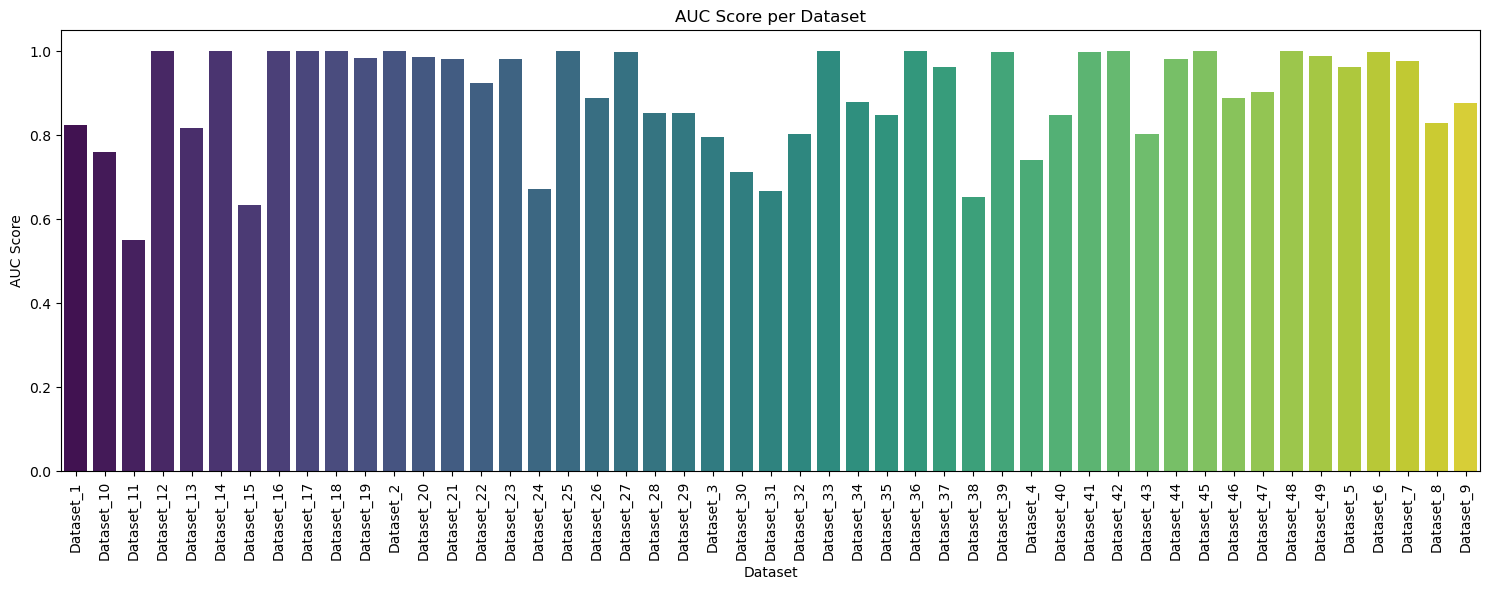

In [13]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from xgboost import XGBClassifier, plot_importance
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import roc_auc_score, precision_score, recall_score, f1_score
from collections import Counter
import warnings
import json

warnings.filterwarnings("ignore", category=UserWarning)

def make_serializable(obj):
    """
    Recursively convert NumPy data types in the input object to native Python types.
    """
    if isinstance(obj, dict):
        return {k: make_serializable(v) for k, v in obj.items()}
    elif isinstance(obj, list):
        return [make_serializable(i) for i in obj]
    elif isinstance(obj, np.integer):
        return int(obj)
    elif isinstance(obj, np.floating):
        return float(obj)
    elif isinstance(obj, np.ndarray):
        return obj.tolist()
    else:
        return obj

def train_and_predict_with_xgb():
    dataset_names = []
    X_trains = []
    y_trains = []
    X_tests = []
    auc_scores = []
    dataset_auc = {}
    dataset_metrics = {}
    dataset_best_params = {}

    low_auc_datasets = [
        'Dataset_4', 'Dataset_11', 'Dataset_24', 'Dataset_31',
        'Dataset_32', 'Dataset_43', 'Dataset_47'
    ]
    
    data_path = "./Competition_data"
    
    for folder_name in os.listdir(data_path):
        folder_path = os.path.join(data_path, folder_name)
        if os.path.isdir(folder_path):
            dataset_names.append(folder_name)
            X_trains.append(pd.read_csv(os.path.join(folder_path, "X_train.csv"), header=0))
            y_trains.append(pd.read_csv(os.path.join(folder_path, "y_train.csv"), header=0))
            X_tests.append(pd.read_csv(os.path.join(folder_path, "X_test.csv"), header=0))

    for i in range(len(dataset_names)):
        print(f"Processing {dataset_names[i]}...")
        
        X_train = X_trains[i]
        y_train = y_trains[i].squeeze()
        X_test = X_tests[i]
        
        X_train = X_train.fillna(X_train.mean())
        X_test = X_test.fillna(X_train.mean())
        
        scaler = StandardScaler()
        X_train_scaled = scaler.fit_transform(X_train)
        X_test_scaled = scaler.transform(X_test)
        
        tmp_X_train, tmp_X_test, tmp_y_train, tmp_y_test = train_test_split(
            X_train_scaled, y_train, test_size=0.2, random_state=42, stratify=y_train
        )
        
        counter = Counter(tmp_y_train)
        majority_class = max(counter, key=counter.get)
        minority_class = min(counter, key=counter.get)
        scale_pos_weight = counter[majority_class] / counter[minority_class] if counter[minority_class] != 0 else 1
        
        if dataset_names[i] in low_auc_datasets:
            param_dist = {
                'n_estimators': np.arange(100, 501, 100),
                'max_depth': np.arange(3, 11, 1),
                'learning_rate': np.linspace(0.01, 0.2, 20),
                'subsample': np.linspace(0.6, 1.0, 5),
                'colsample_bytree': np.linspace(0.6, 1.0, 5),
                'gamma': [0, 1, 5],
                'min_child_weight': [1, 5, 10],
                'scale_pos_weight': [1, scale_pos_weight]
            }
        else:
            param_dist = {
                'n_estimators': [200],
                'max_depth': [6],
                'learning_rate': [0.05],
                'subsample': [0.8],
                'colsample_bytree': [0.8],
                'gamma': [0],
                'min_child_weight': [1],
                'scale_pos_weight': [1]
            }
        
        xgb_model = XGBClassifier(
            random_state=42,
            eval_metric="logloss",
            use_label_encoder=False,
            n_jobs=-1
        )
        
        randomized_search = RandomizedSearchCV(
            estimator=xgb_model,
            param_distributions=param_dist,
            n_iter=50,
            scoring='roc_auc',
            cv=3,
            random_state=42,
            n_jobs=1,
            verbose=0
        )
        
        randomized_search.fit(tmp_X_train, tmp_y_train)
        best_model = randomized_search.best_estimator_
        best_params = randomized_search.best_params_
        dataset_best_params[dataset_names[i]] = best_params

        best_model.fit(tmp_X_train, tmp_y_train, verbose=False)
        
        tmp_y_prob = best_model.predict_proba(tmp_X_test)[:, 1]
        auc = roc_auc_score(tmp_y_test, tmp_y_prob)

        tmp_y_pred = best_model.predict(tmp_X_test)
        precision = precision_score(tmp_y_test, tmp_y_pred)
        recall = recall_score(tmp_y_test, tmp_y_pred)
        f1 = f1_score(tmp_y_test, tmp_y_pred)
        
        auc_scores.append(auc)
        dataset_auc[dataset_names[i]] = auc
        dataset_metrics[dataset_names[i]] = {
            'AUC': auc,
            'Precision': precision,
            'Recall': recall,
            'F1-Score': f1
        }
        
        print(f"Dataset {dataset_names[i]} - AUC: {auc:.4f}, Precision: {precision:.4f}, Recall: {recall:.4f}, F1-Score: {f1:.4f}")
        
        y_predict_proba = best_model.predict_proba(X_test_scaled)[:, 1]
        y_predict = (y_predict_proba >= 0.5).astype(int)

        output_df = pd.DataFrame({
            "y_predict_proba": y_predict_proba,
            "y_predict": y_predict
        })
# Save the prediction results
        output_df = pd.DataFrame({
            "y_predict_proba": y_predict_proba
        })
        output_csv_path = os.path.join(data_path, dataset_names[i], "y_predict.csv")
        output_df.to_csv(output_csv_path, index=False)
        

        plt.figure(figsize=(10, 8))
        plot_importance(best_model, max_num_features=10, importance_type='gain');
        plt.title(f'Feature Importance for {dataset_names[i]}')
        plt.tight_layout()
        plt.savefig(os.path.join(data_path, dataset_names[i], "feature_importance.png"))
        plt.close()
    
    average_auc = np.mean(auc_scores)
    print(f"\nAverage XGBoost AUC Across All Datasets: {average_auc:.4f}")
    
    metrics_df = pd.DataFrame(dataset_metrics).T
    metrics_csv_path = os.path.join(data_path, "dataset_metrics.csv")
    metrics_df.to_csv(metrics_csv_path, index=True)
    
    serializable_best_params = make_serializable(dataset_best_params)

    hyperparams_json_path = os.path.join(data_path, "best_hyperparameters.json")
    with open(hyperparams_json_path, 'w') as f:
        json.dump(serializable_best_params, f, indent=4)

    plt.figure(figsize=(15, 6))
    datasets = list(dataset_auc.keys())
    auc_values = list(dataset_auc.values())
    sns.barplot(x=datasets, y=auc_values, palette='viridis');
    plt.xticks(rotation=90)
    plt.xlabel('Dataset')
    plt.ylabel('AUC Score')
    plt.title('AUC Score per Dataset')
    plt.tight_layout() 
    auc_plot_path = os.path.join(data_path, "auc_scores_per_dataset.png")
    plt.savefig(auc_plot_path)
    plt.show()
    
train_and_predict_with_xgb()


In [5]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from xgboost import XGBClassifier, plot_importance, DMatrix, train as xgb_train
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import roc_auc_score, precision_score, recall_score, f1_score
from collections import Counter
import warnings
import json

warnings.filterwarnings("ignore", category=UserWarning)

def make_serializable(obj):
    """
    Recursively convert NumPy data types in the input object to native Python types.
    """
    if isinstance(obj, dict):
        return {k: make_serializable(v) for k, v in obj.items()}
    elif isinstance(obj, list):
        return [make_serializable(i) for i in obj]
    elif isinstance(obj, np.integer):
        return int(obj)
    elif isinstance(obj, np.floating):
        return float(obj)
    elif isinstance(obj, np.ndarray):
        return obj.tolist()
    else:
        return obj

def train_and_predict_with_xgb():
    dataset_names = []
    X_trains = []
    y_trains = []
    X_tests = []
    auc_scores = []
    dataset_auc = {}
    dataset_metrics = {}
    dataset_best_params = {}

    low_auc_datasets = [
        'Dataset_4', 'Dataset_11', 'Dataset_24', 'Dataset_31',
        'Dataset_32', 'Dataset_43', 'Dataset_47'
    ]
    
    data_path = "./Competition_data"
    
    for folder_name in os.listdir(data_path):
        folder_path = os.path.join(data_path, folder_name)
        if os.path.isdir(folder_path):
            try:
                X_train = pd.read_csv(os.path.join(folder_path, "X_train.csv"), header=0)
                y_train = pd.read_csv(os.path.join(folder_path, "y_train.csv"), header=0)
                X_test = pd.read_csv(os.path.join(folder_path, "X_test.csv"), header=0)
            except FileNotFoundError as e:
                print(f"Error reading files for {folder_name}: {e}")
                continue
            dataset_names.append(folder_name)
            X_trains.append(X_train)
            y_trains.append(y_train.squeeze().values)  # Ensure y_train is 1D NumPy array
            X_tests.append(X_test)

    for i in range(len(dataset_names)):
        try:
            print(f"Processing {dataset_names[i]}...")

            # Load data
            X_train = X_trains[i]
            y_train = y_trains[i]
            X_test = X_tests[i]

            # Handle missing values
            X_train = X_train.fillna(X_train.mean())
            X_test = X_test.fillna(X_train.mean())

            # Scale the data
            scaler = StandardScaler()
            X_train_scaled = scaler.fit_transform(X_train)
            X_test_scaled = scaler.transform(X_test)

            # Train-test split
            tmp_X_train, tmp_X_test, tmp_y_train, tmp_y_test = train_test_split(
                X_train_scaled, y_train, test_size=0.2, random_state=42, stratify=y_train
            )

            # Compute scale_pos_weight to handle imbalance
            counter = Counter(tmp_y_train)
            majority_class = max(counter, key=counter.get)
            minority_class = min(counter, key=counter.get)
            scale_pos_weight = counter[majority_class] / counter[minority_class] if counter[minority_class] != 0 else 1

            # Hyperparameter selection
            if dataset_names[i] in low_auc_datasets:
                param_dist = {
                    'n_estimators': np.arange(100, 501, 100),
                    'max_depth': np.arange(3, 11, 1),
                    'learning_rate': np.linspace(0.01, 0.2, 20),
                    'subsample': np.linspace(0.6, 1.0, 5),
                    'colsample_bytree': np.linspace(0.6, 1.0, 5),
                    'gamma': [0, 1, 5],
                    'min_child_weight': [1, 5, 10],
                    'scale_pos_weight': [1, scale_pos_weight]
                }
            else:
                param_dist = {
                    'n_estimators': [200],
                    'max_depth': [6],
                    'learning_rate': [0.05],
                    'subsample': [0.8],
                    'colsample_bytree': [0.8],
                    'gamma': [0],
                    'min_child_weight': [1],
                    'scale_pos_weight': [1]
                }

            # Model definition
            xgb_model = XGBClassifier(
                random_state=42,
                eval_metric="logloss",
                n_jobs=-1
            )

            # Hyperparameter tuning using RandomizedSearchCV
            randomized_search = RandomizedSearchCV(
                estimator=xgb_model,
                param_distributions=param_dist,
                n_iter=50,
                scoring='roc_auc',
                cv=3,
                random_state=42,
                n_jobs=-1,
                verbose=0
            )

            randomized_search.fit(tmp_X_train, tmp_y_train)
            best_params = randomized_search.best_params_
            dataset_best_params[dataset_names[i]] = best_params

            # Prepare DMatrices for training with early stopping
            dtrain = DMatrix(tmp_X_train, label=tmp_y_train)
            dtest = DMatrix(tmp_X_test, label=tmp_y_test)

            # Define final model parameters with best hyperparameters
            params = randomized_search.best_params_
            params.update({
                'objective': 'binary:logistic',
                'eval_metric': 'logloss',
                'random_state': 42
            })

            # Train the model using xgb.train with early stopping
            evals = [(dtrain, 'train'), (dtest, 'eval')]
            best_model = xgb_train(
                params,
                dtrain,
                num_boost_round=500,
                evals=evals,
                early_stopping_rounds=20,
                verbose_eval=False
            )

            # Predict and evaluate
            tmp_y_prob = best_model.predict(dtest)
            auc = roc_auc_score(tmp_y_test, tmp_y_prob)

            tmp_y_pred = (tmp_y_prob >= 0.5).astype(int)
            precision = precision_score(tmp_y_test, tmp_y_pred)
            recall = recall_score(tmp_y_test, tmp_y_pred)
            f1 = f1_score(tmp_y_test, tmp_y_pred)

            auc_scores.append(auc)
            dataset_auc[dataset_names[i]] = auc
            dataset_metrics[dataset_names[i]] = {
                'AUC': auc,
                'Precision': precision,
                'Recall': recall,
                'F1-Score': f1
            }

            print(f"Dataset {dataset_names[i]} - AUC: {auc:.4f}, Precision: {precision:.4f}, Recall: {recall:.4f}, F1-Score: {f1:.4f}")

            # Predict for the test set
            dtest_full = DMatrix(X_test_scaled)
            y_predict_proba = best_model.predict(dtest_full)

            # Save the prediction results
            output_df = pd.DataFrame({
                "y_predict_proba": y_predict_proba
            })
            output_csv_path = os.path.join(data_path, dataset_names[i], "y_predict.csv")
            output_df.to_csv(output_csv_path, index=False)

            # Plot feature importance
            plt.figure(figsize=(10, 8))
            plot_importance(best_model, max_num_features=10, importance_type='weight')
            plt.title(f'Feature Importance for {dataset_names[i]}')
            plt.tight_layout()
            plt.savefig(os.path.join(data_path, dataset_names[i], "feature_importance.png"))
            plt.close()

        except Exception as e:
            print(f"An error occurred while processing {dataset_names[i]}: {e}")

    # Save overall results
    average_auc = np.mean(auc_scores)
    print(f"\nAverage XGBoost AUC Across All Datasets: {average_auc:.4f}")

    metrics_df = pd.DataFrame(dataset_metrics).T
    metrics_csv_path = os.path.join(data_path, "dataset_metrics.csv")
    metrics_df.to_csv(metrics_csv_path, index=True)

    serializable_best_params = make_serializable(dataset_best_params)

    hyperparams_json_path = os.path.join(data_path, "best_hyperparameters.json")
    with open(hyperparams_json_path, 'w') as f:
        json.dump(serializable_best_params, f, indent=4)

    # Plot AUC scores per dataset
    plt.figure(figsize=(15, 6))
    datasets = list(dataset_auc.keys())
    auc_values = list(dataset_auc.values())
    sns.barplot(x=datasets, y=auc_values, palette='viridis')
    plt.xticks(rotation=90)
    plt.xlabel('Dataset')
    plt.ylabel('AUC Score')
    plt.title('AUC Score per Dataset')
    plt.tight_layout()
    auc_plot_path = os.path.join(data_path, "auc_scores_per_dataset.png")
    plt.savefig(auc_plot_path)
    plt.close()

train_and_predict_with_xgb()


Processing Dataset_1...
Dataset Dataset_1 - AUC: 0.8547, Precision: 0.6875, Recall: 0.4231, F1-Score: 0.5238
Processing Dataset_10...
Dataset Dataset_10 - AUC: 0.7490, Precision: 0.6471, Recall: 0.5641, F1-Score: 0.6027
Processing Dataset_11...
Dataset Dataset_11 - AUC: 0.5500, Precision: 0.0000, Recall: 0.0000, F1-Score: 0.0000
Processing Dataset_12...
Dataset Dataset_12 - AUC: 1.0000, Precision: 1.0000, Recall: 0.8889, F1-Score: 0.9412
Processing Dataset_13...
Dataset Dataset_13 - AUC: 0.8182, Precision: 0.6250, Recall: 0.4545, F1-Score: 0.5263
Processing Dataset_14...
Dataset Dataset_14 - AUC: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-Score: 1.0000
Processing Dataset_15...
Dataset Dataset_15 - AUC: 0.6192, Precision: 0.7273, Recall: 0.3333, F1-Score: 0.4571
Processing Dataset_16...
Dataset Dataset_16 - AUC: 1.0000, Precision: 0.9730, Recall: 1.0000, F1-Score: 0.9863
Processing Dataset_17...
Dataset Dataset_17 - AUC: 1.0000, Precision: 0.9167, Recall: 1.0000, F1-Score: 0.9565
Pro

C:\Users\Enzo Fabien\anaconda3\Lib\site-packages\xgboost\plotting.py:113: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  _, ax = plt.subplots(1, 1)


Processing Dataset_28...
Dataset Dataset_28 - AUC: 0.8542, Precision: 0.7826, Recall: 0.5625, F1-Score: 0.6545


C:\Users\Enzo Fabien\AppData\Local\Temp\ipykernel_22912\3038817896.py:196: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure(figsize=(10, 8))


Processing Dataset_29...
Dataset Dataset_29 - AUC: 0.8487, Precision: 0.7200, Recall: 0.6667, F1-Score: 0.6923
Processing Dataset_3...
Dataset Dataset_3 - AUC: 0.7755, Precision: 0.7143, Recall: 0.7143, F1-Score: 0.7143
Processing Dataset_30...
Dataset Dataset_30 - AUC: 0.7102, Precision: 0.7619, Recall: 0.4000, F1-Score: 0.5246
Processing Dataset_31...
Dataset Dataset_31 - AUC: 0.7167, Precision: 0.5000, Recall: 0.2000, F1-Score: 0.2857
Processing Dataset_32...
Dataset Dataset_32 - AUC: 0.8057, Precision: 0.0000, Recall: 0.0000, F1-Score: 0.0000
Processing Dataset_33...
Dataset Dataset_33 - AUC: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-Score: 1.0000
Processing Dataset_34...
Dataset Dataset_34 - AUC: 0.8927, Precision: 0.9444, Recall: 0.7391, F1-Score: 0.8293
Processing Dataset_35...
Dataset Dataset_35 - AUC: 0.8500, Precision: 0.8182, Recall: 0.5625, F1-Score: 0.6667
Processing Dataset_36...
Dataset Dataset_36 - AUC: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-Score: 1.0000
Pro

<Figure size 1000x800 with 0 Axes>

<Figure size 1000x800 with 0 Axes>

<Figure size 1000x800 with 0 Axes>

<Figure size 1000x800 with 0 Axes>

<Figure size 1000x800 with 0 Axes>

<Figure size 1000x800 with 0 Axes>

<Figure size 1000x800 with 0 Axes>

<Figure size 1000x800 with 0 Axes>

<Figure size 1000x800 with 0 Axes>

<Figure size 1000x800 with 0 Axes>

<Figure size 1000x800 with 0 Axes>

<Figure size 1000x800 with 0 Axes>

<Figure size 1000x800 with 0 Axes>

<Figure size 1000x800 with 0 Axes>

<Figure size 1000x800 with 0 Axes>

<Figure size 1000x800 with 0 Axes>

<Figure size 1000x800 with 0 Axes>

<Figure size 1000x800 with 0 Axes>

<Figure size 1000x800 with 0 Axes>

<Figure size 1000x800 with 0 Axes>

<Figure size 1000x800 with 0 Axes>

<Figure size 1000x800 with 0 Axes>

<Figure size 1000x800 with 0 Axes>

<Figure size 1000x800 with 0 Axes>

<Figure size 1000x800 with 0 Axes>

<Figure size 1000x800 with 0 Axes>

<Figure size 1000x800 with 0 Axes>

<Figure size 1000x800 with 0 Axes>

<Figure size 1000x800 with 0 Axes>

<Figure size 1000x800 with 0 Axes>

<Figure size 1000x800 with 0 Axes>

<Figure size 1000x800 with 0 Axes>

<Figure size 1000x800 with 0 Axes>

<Figure size 1000x800 with 0 Axes>

<Figure size 1000x800 with 0 Axes>

<Figure size 1000x800 with 0 Axes>

<Figure size 1000x800 with 0 Axes>

<Figure size 1000x800 with 0 Axes>

<Figure size 1000x800 with 0 Axes>

<Figure size 1000x800 with 0 Axes>

<Figure size 1000x800 with 0 Axes>

<Figure size 1000x800 with 0 Axes>

<Figure size 1000x800 with 0 Axes>

<Figure size 1000x800 with 0 Axes>

<Figure size 1000x800 with 0 Axes>

<Figure size 1000x800 with 0 Axes>

<Figure size 1000x800 with 0 Axes>

<Figure size 1000x800 with 0 Axes>

<Figure size 1000x800 with 0 Axes>

Processing Dataset_1...
Dataset Dataset_1 - AUC: 0.8907, Optimal Threshold: 0.28, Precision: 0.6486, Recall: 0.9231, F1-Score: 0.7619
Processing Dataset_10...
Dataset Dataset_10 - AUC: 0.7387, Optimal Threshold: 0.45, Precision: 0.6500, Recall: 0.6667, F1-Score: 0.6582
Processing Dataset_11...
Dataset Dataset_11 - AUC: 0.6500, Optimal Threshold: 0.50, Precision: 0.2222, Recall: 1.0000, F1-Score: 0.3636
Processing Dataset_12...
Dataset Dataset_12 - AUC: 1.0000, Optimal Threshold: 0.47, Precision: 1.0000, Recall: 1.0000, F1-Score: 1.0000
Processing Dataset_13...
Dataset Dataset_13 - AUC: 0.8566, Optimal Threshold: 0.19, Precision: 0.5789, Recall: 1.0000, F1-Score: 0.7333
Processing Dataset_14...
Dataset Dataset_14 - AUC: 1.0000, Optimal Threshold: 0.54, Precision: 1.0000, Recall: 1.0000, F1-Score: 1.0000
Processing Dataset_15...
Dataset Dataset_15 - AUC: 0.6817, Optimal Threshold: 0.29, Precision: 0.4722, Recall: 0.7083, F1-Score: 0.5667
Processing Dataset_16...
Dataset Dataset_16 - AUC:

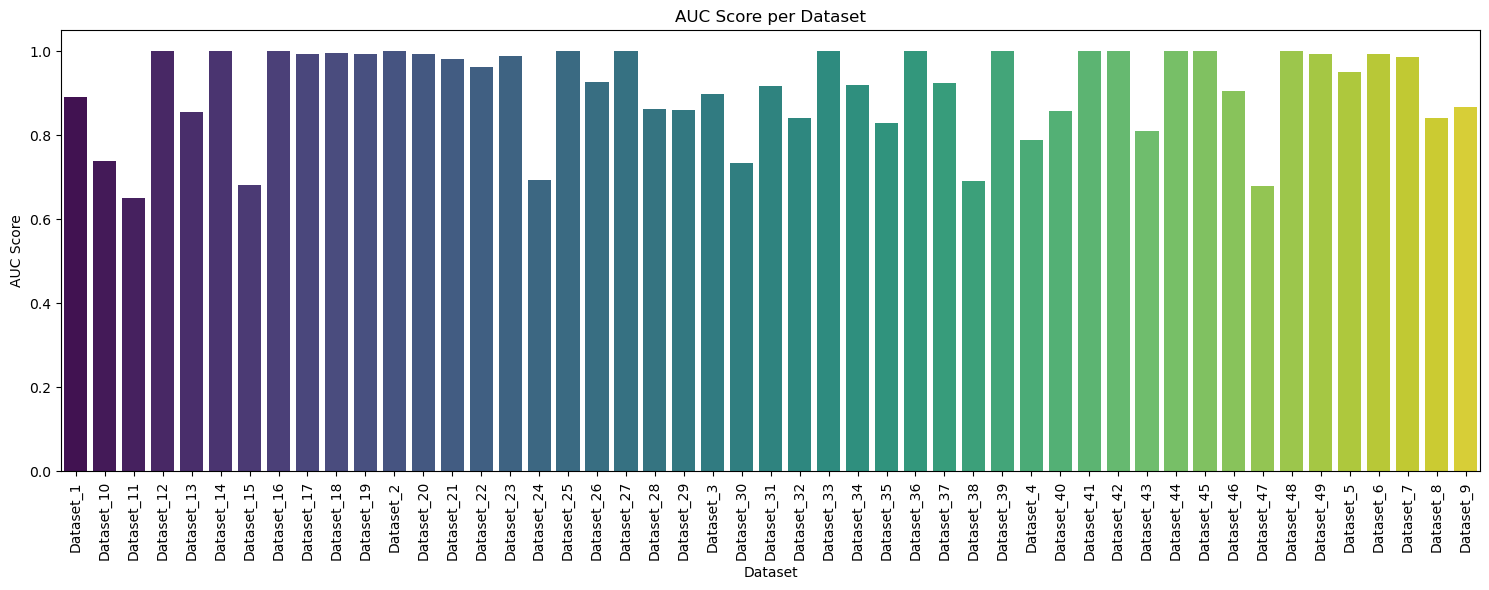

In [30]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from catboost import CatBoostClassifier
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.metrics import roc_auc_score, precision_score, recall_score, f1_score, roc_curve
from imblearn.over_sampling import SMOTE
from collections import Counter
import warnings
import json

warnings.filterwarnings("ignore", category=UserWarning)

def make_serializable(obj):
    """
    Recursively convert NumPy data types in the input object to native Python types.
    """
    if isinstance(obj, dict):
        return {k: make_serializable(v) for k, v in obj.items()}
    elif isinstance(obj, list):
        return [make_serializable(i) for i in obj]
    elif isinstance(obj, np.integer):
        return int(obj)
    elif isinstance(obj, np.floating):
        return float(obj)
    elif isinstance(obj, np.ndarray):
        return obj.tolist()
    else:
        return obj

def get_categorical_features(X):
    """
    Identify categorical features in the dataset based on the rule that features without decimals are categorical.
    """
    categorical_features = []
    for col in X.columns:
        col_values = X[col].dropna()
        if col_values.apply(lambda x: x == int(x)).all():
            categorical_features.append(col)
    return categorical_features

def train_and_predict_with_catboost():
    dataset_names = []
    X_trains = []
    y_trains = []
    X_tests = []
    auc_scores = []
    dataset_auc = {}
    dataset_metrics = {}
    dataset_optimal_thresholds = {}
    
    # Load the best hyperparameters from a JSON file
    # Replace 'best_hyperparameters.json' with your actual file path
    with open("./Competition_data/best_hyperparameters.json", 'r') as f:
        best_params_dict = json.load(f)
    
    low_auc_datasets = [
        'Dataset_4', 'Dataset_11', 'Dataset_15', 'Dataset_24', 'Dataset_31',
        'Dataset_32', 'Dataset_43', 'Dataset_47', 'Dataset_30', 'Dataset_38', 'Dataset_10', 'Dataset_8'
    ]
    
    data_path = "./Competition_data"
    
    for folder_name in os.listdir(data_path):
        folder_path = os.path.join(data_path, folder_name)
        if os.path.isdir(folder_path):
            dataset_names.append(folder_name)
            X_trains.append(pd.read_csv(os.path.join(folder_path, "X_train.csv"), header=0))
            y_trains.append(pd.read_csv(os.path.join(folder_path, "y_train.csv"), header=0))
            X_tests.append(pd.read_csv(os.path.join(folder_path, "X_test.csv"), header=0))
    
    for i in range(len(dataset_names)):
        dataset_name = dataset_names[i]
        print(f"Processing {dataset_name}...")
        
        X_train = X_trains[i]
        y_train = y_trains[i].squeeze()
        X_test = X_tests[i]
    
        # Determine categorical features
        categorical_features = get_categorical_features(X_train)
        
        tmp_X_train, tmp_X_test, tmp_y_train, tmp_y_test = train_test_split(
            X_train, y_train, test_size=0.2, random_state=42, stratify=y_train
        )
        
        # Use the best hyperparameters for this dataset
        if dataset_name in best_params_dict:
            best_params = best_params_dict[dataset_name]
        else:
            # Default parameters if not specified
            best_params = {
                'iterations': 500,
                'depth': 6,
                'learning_rate': 0.05,
                'subsample': 0.8,
                'colsample_bylevel': 0.8,
                'l2_leaf_reg': 3,
                'bagging_temperature': 0,
            }
        
        # Initialize the CatBoostClassifier with the best parameters
        best_model = CatBoostClassifier(
            **best_params,
            random_seed=42,
            eval_metric='AUC',
            silent=True,
            allow_writing_files=False,
        )
        
        if dataset_name in low_auc_datasets:
            # Apply SMOTE to the training data
            smote = SMOTE(random_state=42)
            X_res, y_res = smote.fit_resample(tmp_X_train, tmp_y_train)
            best_model.fit(
                X_res, y_res,
                eval_set=(tmp_X_test, tmp_y_test),
                cat_features=categorical_features,
                early_stopping_rounds=50,
                verbose=False,
            )
        else:
            best_model.fit(
                tmp_X_train, tmp_y_train,
                eval_set=(tmp_X_test, tmp_y_test),
                cat_features=categorical_features,
                early_stopping_rounds=50,
                verbose=False,
            )
        
        # Predict on validation set
        tmp_y_prob = best_model.predict_proba(tmp_X_test)[:, 1]
        auc = roc_auc_score(tmp_y_test, tmp_y_prob)
        
        # Threshold optimization using ROC curve
        fpr, tpr, thresholds = roc_curve(tmp_y_test, tmp_y_prob)
        optimal_idx = np.argmax(tpr - fpr)
        optimal_threshold = thresholds[optimal_idx]
        dataset_optimal_thresholds[dataset_name] = optimal_threshold
        
        tmp_y_pred = (tmp_y_prob >= optimal_threshold).astype(int)
        
        precision = precision_score(tmp_y_test, tmp_y_pred, zero_division=0)
        recall = recall_score(tmp_y_test, tmp_y_pred, zero_division=0)
        f1 = f1_score(tmp_y_test, tmp_y_pred, zero_division=0)
        
        auc_scores.append(auc)
        dataset_auc[dataset_name] = auc
        dataset_metrics[dataset_name] = {
            'AUC': auc,
            'Precision': precision,
            'Recall': recall,
            'F1-Score': f1,
            'Optimal Threshold': optimal_threshold
        }
        
        print(f"Dataset {dataset_name} - AUC: {auc:.4f}, Optimal Threshold: {optimal_threshold:.2f}, Precision: {precision:.4f}, Recall: {recall:.4f}, F1-Score: {f1:.4f}")
        
        # Predict on the test set
        y_predict_proba = best_model.predict_proba(X_test)[:, 1]
        y_predict = (y_predict_proba >= optimal_threshold).astype(int)
    
        # Save the prediction results
        output_df = pd.DataFrame({
            "y_predict_proba": y_predict_proba
        })
        output_csv_path = os.path.join(data_path, dataset_name, "y_predict.csv")
        output_df.to_csv(output_csv_path, index=False)
        
        # Plot feature importance
        if hasattr(best_model, 'get_feature_importance'):
            importances = best_model.get_feature_importance()
            feature_names = X_train.columns
            importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
            importance_df = importance_df.sort_values(by='Importance', ascending=False).head(10)
            
            plt.figure(figsize=(10, 8))
            sns.barplot(x='Importance', y='Feature', data=importance_df)
            plt.title(f'Feature Importance for {dataset_name}')
            plt.tight_layout()
            plt.savefig(os.path.join(data_path, dataset_name, "feature_importance.png"))
            plt.close()
    
    average_auc = np.mean(auc_scores)
    print(f"\nAverage CatBoost AUC Across All Datasets: {average_auc:.4f}")
    
    metrics_df = pd.DataFrame(dataset_metrics).T
    metrics_csv_path = os.path.join(data_path, "dataset_metrics.csv")
    metrics_df.to_csv(metrics_csv_path, index=True)
    
    # Save optimal thresholds
    serializable_optimal_thresholds = make_serializable(dataset_optimal_thresholds)
    thresholds_json_path = os.path.join(data_path, "optimal_thresholds.json")
    with open(thresholds_json_path, 'w') as f:
        json.dump(serializable_optimal_thresholds, f, indent=4)
    
    # Plot AUC scores per dataset
    plt.figure(figsize=(15, 6))
    datasets = list(dataset_auc.keys())
    auc_values = list(dataset_auc.values())
    sns.barplot(x=datasets, y=auc_values, palette='viridis')
    plt.xticks(rotation=90)
    plt.xlabel('Dataset')
    plt.ylabel('AUC Score')
    plt.title('AUC Score per Dataset')
    plt.tight_layout() 
    auc_plot_path = os.path.join(data_path, "auc_scores_per_dataset.png")
    plt.savefig(auc_plot_path)
    plt.show()
    
train_and_predict_with_catboost()


In [18]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from xgboost import XGBClassifier, plot_importance, DMatrix, train as xgb_train
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import roc_auc_score, precision_score, recall_score, f1_score
from collections import Counter
from imblearn.over_sampling import SMOTE
from sklearn.impute import KNNImputer
import optuna
import warnings
import json

warnings.filterwarnings("ignore", category=UserWarning)

def make_serializable(obj):
    """
    Recursively convert NumPy data types in the input object to native Python types.
    """
    if isinstance(obj, dict):
        return {k: make_serializable(v) for k, v in obj.items()}
    elif isinstance(obj, list):
        return [make_serializable(i) for i in obj]
    elif isinstance(obj, np.integer):
        return int(obj)
    elif isinstance(obj, np.floating):
        return float(obj)
    elif isinstance(obj, np.ndarray):
        return obj.tolist()
    else:
        return obj

def train_and_predict_with_xgb():
    dataset_names = []
    X_trains = []
    y_trains = []
    X_tests = []
    auc_scores = []
    dataset_auc = {}
    dataset_metrics = {}
    dataset_best_params = {}

    low_auc_datasets = [
        'Dataset_4', 'Dataset_11', 'Dataset_24', 'Dataset_31',
        'Dataset_32', 'Dataset_43', 'Dataset_47'
    ]
    
    data_path = "./Competition_data/"
    
    for folder_name in os.listdir(data_path):
        folder_path = os.path.join(data_path, folder_name)
        if os.path.isdir(folder_path):
            try:
                X_train = pd.read_csv(os.path.join(folder_path, "X_train.csv"), header=0)
                y_train = pd.read_csv(os.path.join(folder_path, "y_train.csv"), header=0)
                X_test = pd.read_csv(os.path.join(folder_path, "X_test.csv"), header=0)
            except FileNotFoundError as e:
                print(f"Error reading files for {folder_name}: {e}")
                continue
            
            # Ensure consistent sample sizes between X and y
            if len(X_train) != len(y_train):
                print(f"Skipping {folder_name} due to inconsistent number of samples between X_train and y_train.")
                continue
            
            dataset_names.append(folder_name)
            X_trains.append(X_train)
            y_trains.append(y_train.squeeze().values)  # Ensure y_train is 1D NumPy array
            X_tests.append(X_test)

    for i in range(len(dataset_names)):
        try:
            print(f"Processing {dataset_names[i]}...")

            # Load data
            X_train = X_trains[i]
            y_train = y_trains[i]
            X_test = X_tests[i]

            # Handle missing values using KNNImputer
            imputer = KNNImputer(n_neighbors=5)
            X_train = imputer.fit_transform(X_train)
            X_test = imputer.transform(X_test)

            # Check if imputation resulted in NaN values
            if np.isnan(X_train).any() or np.isnan(X_test).any():
                print(f"Skipping {dataset_names[i]} due to NaN values after imputation.")
                continue

            # Scale the data
            scaler = StandardScaler()
            X_train_scaled = scaler.fit_transform(X_train)
            X_test_scaled = scaler.transform(X_test)

            # Handle class imbalance using SMOTE
            smote = SMOTE(random_state=42)
            X_train_resampled, y_train_resampled = smote.fit_resample(X_train_scaled, y_train)

            # Cross-validation setup
            skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

            def objective(trial):
                params = {
                    'max_depth': trial.suggest_int('max_depth', 3, 15),
                    'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.3, log=True),
                    'n_estimators': trial.suggest_int('n_estimators', 100, 500),
                    'gamma': trial.suggest_float('gamma', 0, 5),
                    'min_child_weight': trial.suggest_int('min_child_weight', 1, 10),
                    'subsample': trial.suggest_float('subsample', 0.6, 1.0),
                    'colsample_bytree': trial.suggest_float('colsample_bytree', 0.6, 1.0),
                    'scale_pos_weight': trial.suggest_float('scale_pos_weight', 1, 10),
                    'reg_alpha': trial.suggest_float('reg_alpha', 1e-3, 10.0, log=True),
                    'reg_lambda': trial.suggest_float('reg_lambda', 1e-3, 10.0, log=True)
                }
                auc_scores = []
                for train_index, val_index in skf.split(X_train_resampled, y_train_resampled):
                    X_fold_train, X_fold_val = X_train_resampled[train_index], X_train_resampled[val_index]
                    y_fold_train, y_fold_val = y_train_resampled[train_index], y_train_resampled[val_index]

                    model = XGBClassifier(**params, random_state=42, eval_metric="logloss")
                    model.fit(X_fold_train, y_fold_train)
                    y_pred = model.predict_proba(X_fold_val)[:, 1]
                    auc = roc_auc_score(y_fold_val, y_pred)
                    auc_scores.append(auc)
                return np.mean(auc_scores)

            study = optuna.create_study(direction='maximize')
            study.optimize(objective, n_trials=50)
            best_params = study.best_params
            dataset_best_params[dataset_names[i]] = best_params

            # Prepare DMatrices for training with early stopping
            dtrain = DMatrix(X_train_resampled, label=y_train_resampled)
            dtest = DMatrix(X_test_scaled)

            # Train the model using xgb.train with early stopping
            params = best_params
            params.update({
                'objective': 'binary:logistic',
                'eval_metric': 'logloss',
                'random_state': 42
            })

            best_model = xgb_train(
                params,
                dtrain,
                num_boost_round=500,
                evals=[(dtrain, 'train')],
                early_stopping_rounds=10,
                verbose_eval=False
            )

            # Predict for the test set
            y_predict_proba = best_model.predict(dtest)

            # Save the prediction results
            output_df = pd.DataFrame({
                "y_predict_proba": y_predict_proba
            })
            output_csv_path = os.path.join(data_path, dataset_names[i], "y_predict.csv")
            output_df.to_csv(output_csv_path, index=False)

            # Predict and evaluate using resampled training data
            dtrain_eval = DMatrix(X_train_resampled)
            y_train_pred = (best_model.predict(dtrain_eval) >= 0.5).astype(int)

            auc = roc_auc_score(y_train_resampled, best_model.predict(dtrain_eval))
            precision = precision_score(y_train_resampled, y_train_pred)
            recall = recall_score(y_train_resampled, y_train_pred)
            f1 = f1_score(y_train_resampled, y_train_pred)

            auc_scores.append(auc)
            dataset_auc[dataset_names[i]] = auc
            dataset_metrics[dataset_names[i]] = {
                'AUC': auc,
                'Precision': precision,
                'Recall': recall,
                'F1-Score': f1
            }

            print(f"Dataset {dataset_names[i]} - AUC: {auc:.4f}, Precision: {precision:.4f}, Recall: {recall:.4f}, F1-Score: {f1:.4f}")

            # Plot feature importance
            plt.figure(figsize=(10, 8))
            plot_importance(best_model, max_num_features=10, importance_type='weight')
            plt.title(f'Feature Importance for {dataset_names[i]}')
            plt.tight_layout()
            plt.savefig(os.path.join(data_path, dataset_names[i], "feature_importance.png"))
            plt.close()

        except Exception as e:
            print(f"An error occurred while processing {dataset_names[i]}: {e}")

    # Save overall results
    average_auc = np.mean(auc_scores) if auc_scores else float('nan')
    print(f"\nAverage XGBoost AUC Across All Datasets: {average_auc:.4f}")

    metrics_df = pd.DataFrame(dataset_metrics).T
    metrics_csv_path = os.path.join(data_path, "dataset_metrics.csv")
    metrics_df.to_csv(metrics_csv_path, index=True)

    serializable_best_params = make_serializable(dataset_best_params)

    hyperparams_json_path = os.path.join(data_path, "best_hyperparameters.json")
    with open(hyperparams_json_path, 'w') as f:
        json.dump(serializable_best_params, f, indent=4)

    # Plot AUC scores per dataset
    if dataset_auc:
        plt.figure(figsize=(15, 6))
        datasets = list(dataset_auc.keys())
        auc_values = list(dataset_auc.values())
        sns.barplot(x=datasets, y=auc_values, palette='viridis')
        plt.xticks(rotation=90)
        plt.xlabel('Dataset')
        plt.ylabel('AUC Score')
        plt.title('AUC Score per Dataset')
        plt.tight_layout()
        auc_plot_path = os.path.join(data_path, "auc_scores_per_dataset.png")
        plt.savefig(auc_plot_path)
        plt.close()

train_and_predict_with_xgb()


  Obtaining dependency information for optuna from https://files.pythonhosted.org/packages/e8/30/35111dae435c640694d616a611b7ff6b2482cfd977f8f572ff960a321d66/optuna-4.1.0-py3-none-any.whl.metadata
  Obtaining dependency information for alembic>=1.5.0 from https://files.pythonhosted.org/packages/cb/06/8b505aea3d77021b18dcbd8133aa1418f1a1e37e432a465b14c46b2c0eaa/alembic-1.14.0-py3-none-any.whl.metadata
  Obtaining dependency information for colorlog from https://files.pythonhosted.org/packages/e3/51/9b208e85196941db2f0654ad0357ca6388ab3ed67efdbfc799f35d1f83aa/colorlog-6.9.0-py3-none-any.whl.metadata
  Obtaining dependency information for Mako from https://files.pythonhosted.org/packages/48/22/bc14c6f02e6dccaafb3eba95764c8f096714260c2aa5f76f654fd16a23dd/Mako-1.3.6-py3-none-any.whl.metadata
   ---------------------------------------- 0.0/364.4 kB ? eta -:--:--
   - -------------------------------------- 10.2/364.4 kB ? eta -:--:--
   --- ----------------------------------- 30.7/364.4 kB 64

[I 2024-11-30 02:18:37,395] A new study created in memory with name: no-name-e3c4ecd2-cc9d-46dc-8e63-e31fd8d646ed


Processing Dataset_1...


[I 2024-11-30 02:18:37,732] Trial 0 finished with value: 0.9085257519973343 and parameters: {'max_depth': 11, 'learning_rate': 0.024800221808373768, 'n_estimators': 122, 'gamma': 0.896636162031722, 'min_child_weight': 5, 'subsample': 0.8402731142234177, 'colsample_bytree': 0.7313428126819215, 'scale_pos_weight': 2.0307476030873297, 'reg_alpha': 0.37254630801691324, 'reg_lambda': 1.8010671445051465}. Best is trial 0 with value: 0.9085257519973343.
[I 2024-11-30 02:18:38,742] Trial 1 finished with value: 0.911659717650501 and parameters: {'max_depth': 11, 'learning_rate': 0.023166842510547958, 'n_estimators': 439, 'gamma': 1.0826858402984585, 'min_child_weight': 4, 'subsample': 0.6966770283721522, 'colsample_bytree': 0.6853159889474155, 'scale_pos_weight': 6.600350648355886, 'reg_alpha': 0.00522258202387319, 'reg_lambda': 9.67604650383656}. Best is trial 1 with value: 0.911659717650501.
[I 2024-11-30 02:18:39,174] Trial 2 finished with value: 0.8848113199879712 and parameters: {'max_dept

[I 2024-11-30 02:18:49,766] Trial 19 finished with value: 0.9144580173766041 and parameters: {'max_depth': 9, 'learning_rate': 0.011161611949418313, 'n_estimators': 376, 'gamma': 1.2564786959873837, 'min_child_weight': 3, 'subsample': 0.8566285216248731, 'colsample_bytree': 0.7264082670280401, 'scale_pos_weight': 8.843951263680182, 'reg_alpha': 2.0115913985595477, 'reg_lambda': 0.11771440749821195}. Best is trial 18 with value: 0.9274018807044921.
[I 2024-11-30 02:18:50,594] Trial 20 finished with value: 0.9004811482538058 and parameters: {'max_depth': 12, 'learning_rate': 0.016613115082620263, 'n_estimators': 456, 'gamma': 0.3650348090900285, 'min_child_weight': 3, 'subsample': 0.9398911629234824, 'colsample_bytree': 0.6077153715549976, 'scale_pos_weight': 7.7396183988943275, 'reg_alpha': 9.430777486900945, 'reg_lambda': 0.3165246406725356}. Best is trial 18 with value: 0.9274018807044921.
[I 2024-11-30 02:18:52,015] Trial 21 finished with value: 0.9267955688846626 and parameters: {'m

[I 2024-11-30 02:19:10,364] Trial 38 finished with value: 0.9231625744682581 and parameters: {'max_depth': 13, 'learning_rate': 0.056668438023298726, 'n_estimators': 155, 'gamma': 1.5001796694123768, 'min_child_weight': 1, 'subsample': 0.6563299287215477, 'colsample_bytree': 0.64577233033838, 'scale_pos_weight': 4.256476823487613, 'reg_alpha': 0.009063259328946862, 'reg_lambda': 1.5726033196445426}. Best is trial 35 with value: 0.9315160233747024.
[I 2024-11-30 02:19:10,792] Trial 39 finished with value: 0.9284405757524038 and parameters: {'max_depth': 13, 'learning_rate': 0.06736836172416115, 'n_estimators': 212, 'gamma': 1.1657113438411508, 'min_child_weight': 1, 'subsample': 0.6852184057940942, 'colsample_bytree': 0.6215501768678227, 'scale_pos_weight': 2.6366667079826254, 'reg_alpha': 0.0024113308999467163, 'reg_lambda': 0.5764905874036591}. Best is trial 35 with value: 0.9315160233747024.
[I 2024-11-30 02:19:11,199] Trial 40 finished with value: 0.9175196482416144 and parameters: 

Dataset Dataset_1 - AUC: 0.9999, Precision: 0.9781, Recall: 1.0000, F1-Score: 0.9889
Processing Dataset_10...


[I 2024-11-30 02:19:17,411] Trial 0 finished with value: 0.8178261401897766 and parameters: {'max_depth': 15, 'learning_rate': 0.10887795704439097, 'n_estimators': 101, 'gamma': 3.051371148216254, 'min_child_weight': 9, 'subsample': 0.8045508533049124, 'colsample_bytree': 0.720263043583745, 'scale_pos_weight': 6.783055671442611, 'reg_alpha': 0.006194021891841798, 'reg_lambda': 1.6061008063926563}. Best is trial 0 with value: 0.8178261401897766.
[I 2024-11-30 02:19:18,206] Trial 1 finished with value: 0.8332500765228039 and parameters: {'max_depth': 14, 'learning_rate': 0.03672410589334757, 'n_estimators': 459, 'gamma': 1.0101215498130518, 'min_child_weight': 1, 'subsample': 0.6450314450396298, 'colsample_bytree': 0.7411198228010025, 'scale_pos_weight': 2.76302734639677, 'reg_alpha': 0.00502472654842229, 'reg_lambda': 0.017690484632177778}. Best is trial 1 with value: 0.8332500765228039.
[I 2024-11-30 02:19:18,675] Trial 2 finished with value: 0.8154367921640648 and parameters: {'max_de

[I 2024-11-30 02:19:28,083] Trial 19 finished with value: 0.8024297520661158 and parameters: {'max_depth': 5, 'learning_rate': 0.01533602276118695, 'n_estimators': 167, 'gamma': 3.77564155009032, 'min_child_weight': 1, 'subsample': 0.6621646703080204, 'colsample_bytree': 0.8900181503139097, 'scale_pos_weight': 8.567307355522127, 'reg_alpha': 0.01210418897863341, 'reg_lambda': 0.3297791193284684}. Best is trial 1 with value: 0.8332500765228039.
[I 2024-11-30 02:19:28,727] Trial 20 finished with value: 0.8250713192531375 and parameters: {'max_depth': 8, 'learning_rate': 0.07238900545592991, 'n_estimators': 342, 'gamma': 1.1108874894426277, 'min_child_weight': 4, 'subsample': 0.7052932748645327, 'colsample_bytree': 0.7531354924422317, 'scale_pos_weight': 7.017873025805149, 'reg_alpha': 0.002889507878783375, 'reg_lambda': 0.06319396938557996}. Best is trial 1 with value: 0.8332500765228039.
[I 2024-11-30 02:19:29,144] Trial 21 finished with value: 0.833127640036731 and parameters: {'max_de

[I 2024-11-30 02:19:38,391] Trial 38 finished with value: 0.8339693908784817 and parameters: {'max_depth': 14, 'learning_rate': 0.048304874415611924, 'n_estimators': 137, 'gamma': 0.7761860035985708, 'min_child_weight': 1, 'subsample': 0.6832002932751704, 'colsample_bytree': 0.964418778852984, 'scale_pos_weight': 2.7271634560193507, 'reg_alpha': 0.017344843822642803, 'reg_lambda': 0.03161029471430322}. Best is trial 34 with value: 0.8371313131313132.
[I 2024-11-30 02:19:38,860] Trial 39 finished with value: 0.8359730639730639 and parameters: {'max_depth': 14, 'learning_rate': 0.046433429295777665, 'n_estimators': 151, 'gamma': 0.8270097326215164, 'min_child_weight': 1, 'subsample': 0.6783665571256053, 'colsample_bytree': 0.9594441732198129, 'scale_pos_weight': 1.6868310986101944, 'reg_alpha': 0.015919554752314304, 'reg_lambda': 0.031454633772599376}. Best is trial 34 with value: 0.8371313131313132.
[I 2024-11-30 02:19:39,308] Trial 40 finished with value: 0.8219755127027855 and paramet

Dataset Dataset_10 - AUC: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-Score: 1.0000
Processing Dataset_11...


[I 2024-11-30 02:19:45,082] Trial 0 finished with value: 0.8893827160493828 and parameters: {'max_depth': 7, 'learning_rate': 0.06573684253172425, 'n_estimators': 194, 'gamma': 4.885213390086319, 'min_child_weight': 2, 'subsample': 0.7008345377953213, 'colsample_bytree': 0.8003313818272267, 'scale_pos_weight': 6.4463485122351765, 'reg_alpha': 0.0042584866434171795, 'reg_lambda': 0.22995245077556536}. Best is trial 0 with value: 0.8893827160493828.
[I 2024-11-30 02:19:45,281] Trial 1 finished with value: 0.8750617283950618 and parameters: {'max_depth': 11, 'learning_rate': 0.054898159792950575, 'n_estimators': 117, 'gamma': 0.5720492275410954, 'min_child_weight': 2, 'subsample': 0.6631620923932271, 'colsample_bytree': 0.7849565300060426, 'scale_pos_weight': 1.394428672752616, 'reg_alpha': 0.17761460716114014, 'reg_lambda': 9.237662747649857}. Best is trial 0 with value: 0.8893827160493828.
[I 2024-11-30 02:19:45,491] Trial 2 finished with value: 0.7676543209876543 and parameters: {'max_

[I 2024-11-30 02:19:50,508] Trial 19 finished with value: 0.8824691358024692 and parameters: {'max_depth': 7, 'learning_rate': 0.21385784040885114, 'n_estimators': 178, 'gamma': 0.10599313331841276, 'min_child_weight': 3, 'subsample': 0.9316810092511603, 'colsample_bytree': 0.8496506259702542, 'scale_pos_weight': 9.006011346695626, 'reg_alpha': 0.0026630138201761224, 'reg_lambda': 0.004597243931197309}. Best is trial 7 with value: 0.9135802469135802.
[I 2024-11-30 02:19:50,735] Trial 20 finished with value: 0.8671604938271606 and parameters: {'max_depth': 5, 'learning_rate': 0.12839189116962113, 'n_estimators': 154, 'gamma': 2.291809496282216, 'min_child_weight': 5, 'subsample': 0.835773353760445, 'colsample_bytree': 0.7018780611052946, 'scale_pos_weight': 9.091430499327005, 'reg_alpha': 0.04383982998356284, 'reg_lambda': 0.03111731228485051}. Best is trial 7 with value: 0.9135802469135802.
[I 2024-11-30 02:19:51,081] Trial 21 finished with value: 0.9086419753086421 and parameters: {'m

[I 2024-11-30 02:19:58,645] Trial 38 finished with value: 0.885679012345679 and parameters: {'max_depth': 3, 'learning_rate': 0.11876169730831607, 'n_estimators': 216, 'gamma': 0.3763979294019083, 'min_child_weight': 3, 'subsample': 0.9406813203305149, 'colsample_bytree': 0.950016337216321, 'scale_pos_weight': 9.419907297799938, 'reg_alpha': 0.14406626215740442, 'reg_lambda': 0.015870217454340866}. Best is trial 7 with value: 0.9135802469135802.
[I 2024-11-30 02:19:58,844] Trial 39 finished with value: 0.8402469135802468 and parameters: {'max_depth': 15, 'learning_rate': 0.012887522681030886, 'n_estimators': 103, 'gamma': 4.663593781538882, 'min_child_weight': 7, 'subsample': 0.6906745930828041, 'colsample_bytree': 0.8797267800712452, 'scale_pos_weight': 2.6390823861719888, 'reg_alpha': 0.00945605886026146, 'reg_lambda': 0.004667380231840383}. Best is trial 7 with value: 0.9135802469135802.
[I 2024-11-30 02:19:59,293] Trial 40 finished with value: 0.857283950617284 and parameters: {'ma

Dataset Dataset_11 - AUC: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-Score: 1.0000
Processing Dataset_12...


[I 2024-11-30 02:20:02,111] Trial 0 finished with value: 0.9451311534315486 and parameters: {'max_depth': 4, 'learning_rate': 0.05516482559546815, 'n_estimators': 444, 'gamma': 4.8546731518845165, 'min_child_weight': 7, 'subsample': 0.9301457733344414, 'colsample_bytree': 0.6192816172982467, 'scale_pos_weight': 9.565511423099307, 'reg_alpha': 0.001396139766938366, 'reg_lambda': 2.957049370382337}. Best is trial 0 with value: 0.9451311534315486.
[I 2024-11-30 02:20:02,360] Trial 1 finished with value: 0.930901904419691 and parameters: {'max_depth': 12, 'learning_rate': 0.046745255013319775, 'n_estimators': 268, 'gamma': 3.725528914470732, 'min_child_weight': 9, 'subsample': 0.8863093687736805, 'colsample_bytree': 0.6354321005996454, 'scale_pos_weight': 6.295228221943235, 'reg_alpha': 0.032629569655623115, 'reg_lambda': 2.872943281928906}. Best is trial 0 with value: 0.9451311534315486.
[I 2024-11-30 02:20:02,548] Trial 2 finished with value: 0.9631692418253681 and parameters: {'max_dept

[I 2024-11-30 02:20:07,623] Trial 19 finished with value: 0.9856090549766439 and parameters: {'max_depth': 14, 'learning_rate': 0.018431255076489062, 'n_estimators': 236, 'gamma': 0.5191491003176321, 'min_child_weight': 2, 'subsample': 0.7218039802156518, 'colsample_bytree': 0.687012424730073, 'scale_pos_weight': 4.447361073484483, 'reg_alpha': 0.024548626463085706, 'reg_lambda': 0.03327109865425118}. Best is trial 14 with value: 0.9856270212001437.
[I 2024-11-30 02:20:07,925] Trial 20 finished with value: 0.959486166007905 and parameters: {'max_depth': 14, 'learning_rate': 0.07177858101397348, 'n_estimators': 274, 'gamma': 1.822864245233544, 'min_child_weight': 5, 'subsample': 0.8435241327200096, 'colsample_bytree': 0.6781453226822431, 'scale_pos_weight': 6.936966754467249, 'reg_alpha': 0.02145293403342302, 'reg_lambda': 0.28817542147025565}. Best is trial 14 with value: 0.9856270212001437.
[I 2024-11-30 02:20:08,217] Trial 21 finished with value: 0.9847826086956522 and parameters: {'

[I 2024-11-30 02:20:13,559] Trial 38 finished with value: 0.9687567373338124 and parameters: {'max_depth': 9, 'learning_rate': 0.024707905122868055, 'n_estimators': 124, 'gamma': 3.2935535487078824, 'min_child_weight': 3, 'subsample': 0.6383925515336789, 'colsample_bytree': 0.7089373510004132, 'scale_pos_weight': 8.315896256611733, 'reg_alpha': 0.015168364356501887, 'reg_lambda': 0.015145972521288936}. Best is trial 33 with value: 0.9863636363636363.
[I 2024-11-30 02:20:13,860] Trial 39 finished with value: 0.9798239310097017 and parameters: {'max_depth': 15, 'learning_rate': 0.04772838529882725, 'n_estimators': 185, 'gamma': 0.29397161007008454, 'min_child_weight': 3, 'subsample': 0.8643918758687994, 'colsample_bytree': 0.945188034878555, 'scale_pos_weight': 7.028390060172016, 'reg_alpha': 0.009384794368015597, 'reg_lambda': 0.007388525207324086}. Best is trial 33 with value: 0.9863636363636363.
[I 2024-11-30 02:20:14,277] Trial 40 finished with value: 0.9112109234638879 and parameter

Dataset Dataset_12 - AUC: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-Score: 1.0000
Processing Dataset_13...


[I 2024-11-30 02:20:17,236] Trial 0 finished with value: 0.9595147928994082 and parameters: {'max_depth': 10, 'learning_rate': 0.02959977767290918, 'n_estimators': 187, 'gamma': 3.971731813557221, 'min_child_weight': 4, 'subsample': 0.8388813557997354, 'colsample_bytree': 0.8184122334448651, 'scale_pos_weight': 2.547861364793382, 'reg_alpha': 0.0011421121926254699, 'reg_lambda': 7.813048709153197}. Best is trial 0 with value: 0.9595147928994082.
[I 2024-11-30 02:20:17,632] Trial 1 finished with value: 0.9558934911242604 and parameters: {'max_depth': 13, 'learning_rate': 0.21183522218499778, 'n_estimators': 464, 'gamma': 4.822794184566339, 'min_child_weight': 9, 'subsample': 0.9757428021297864, 'colsample_bytree': 0.6641017226647649, 'scale_pos_weight': 3.597644801302626, 'reg_alpha': 0.040323972521992615, 'reg_lambda': 0.8899158439926719}. Best is trial 0 with value: 0.9595147928994082.
[I 2024-11-30 02:20:17,856] Trial 2 finished with value: 0.9571242603550296 and parameters: {'max_de

[I 2024-11-30 02:20:24,823] Trial 19 finished with value: 0.9669704142011835 and parameters: {'max_depth': 5, 'learning_rate': 0.010199880093467582, 'n_estimators': 240, 'gamma': 3.3813835347637866, 'min_child_weight': 3, 'subsample': 0.7346885481043832, 'colsample_bytree': 0.8423467321527915, 'scale_pos_weight': 7.058400502151898, 'reg_alpha': 0.018205749483271423, 'reg_lambda': 0.006277367067614831}. Best is trial 9 with value: 0.9705798816568049.
[I 2024-11-30 02:20:25,251] Trial 20 finished with value: 0.9667100591715976 and parameters: {'max_depth': 8, 'learning_rate': 0.19274697292513604, 'n_estimators': 420, 'gamma': 2.0498865342735373, 'min_child_weight': 2, 'subsample': 0.6524747014625896, 'colsample_bytree': 0.9018273026188384, 'scale_pos_weight': 5.032761459157658, 'reg_alpha': 3.202353102232846, 'reg_lambda': 0.038296314884823365}. Best is trial 9 with value: 0.9705798816568049.
[I 2024-11-30 02:20:25,720] Trial 21 finished with value: 0.9660710059171598 and parameters: {'m

[I 2024-11-30 02:20:32,752] Trial 38 finished with value: 0.9651952662721893 and parameters: {'max_depth': 11, 'learning_rate': 0.03786319915808189, 'n_estimators': 101, 'gamma': 4.215956449974228, 'min_child_weight': 2, 'subsample': 0.833882734348204, 'colsample_bytree': 0.7366040495890289, 'scale_pos_weight': 1.1838704250557233, 'reg_alpha': 0.005234114392349401, 'reg_lambda': 1.3431485093081799}. Best is trial 35 with value: 0.9738579881656806.
[I 2024-11-30 02:20:33,140] Trial 39 finished with value: 0.9577278106508877 and parameters: {'max_depth': 13, 'learning_rate': 0.022329042554619993, 'n_estimators': 206, 'gamma': 3.166101919660252, 'min_child_weight': 7, 'subsample': 0.7402985731521017, 'colsample_bytree': 0.8517172631274496, 'scale_pos_weight': 2.8168837234175435, 'reg_alpha': 0.10438455666199352, 'reg_lambda': 2.1922195424572326}. Best is trial 35 with value: 0.9738579881656806.
[I 2024-11-30 02:20:33,452] Trial 40 finished with value: 0.9696923076923077 and parameters: {'

Dataset Dataset_13 - AUC: 0.9996, Precision: 0.9699, Recall: 1.0000, F1-Score: 0.9847


[I 2024-11-30 02:20:37,330] A new study created in memory with name: no-name-c7e42a2f-0128-4f19-8661-01c65ccbcc48


Processing Dataset_14...


[I 2024-11-30 02:20:37,812] Trial 0 finished with value: 0.9750177514792899 and parameters: {'max_depth': 3, 'learning_rate': 0.2950843849479448, 'n_estimators': 431, 'gamma': 0.37552924606818805, 'min_child_weight': 10, 'subsample': 0.7534810490237359, 'colsample_bytree': 0.6284345207950109, 'scale_pos_weight': 7.072700355343906, 'reg_alpha': 0.016546076362577423, 'reg_lambda': 0.008120005255442287}. Best is trial 0 with value: 0.9750177514792899.
[I 2024-11-30 02:20:37,993] Trial 1 finished with value: 0.9981893491124261 and parameters: {'max_depth': 5, 'learning_rate': 0.0922748737111898, 'n_estimators': 143, 'gamma': 1.0163734289983861, 'min_child_weight': 5, 'subsample': 0.8134369266489282, 'colsample_bytree': 0.8425522393781899, 'scale_pos_weight': 9.198270872031836, 'reg_alpha': 7.014180639649468, 'reg_lambda': 0.7158057883206865}. Best is trial 1 with value: 0.9981893491124261.
[I 2024-11-30 02:20:38,255] Trial 2 finished with value: 0.9829467455621301 and parameters: {'max_dep

[I 2024-11-30 02:20:45,529] Trial 19 finished with value: 0.9984852071005917 and parameters: {'max_depth': 5, 'learning_rate': 0.013481214176965389, 'n_estimators': 172, 'gamma': 2.6175047365117625, 'min_child_weight': 4, 'subsample': 0.7763594633363183, 'colsample_bytree': 0.8114512853375135, 'scale_pos_weight': 7.36501921014135, 'reg_alpha': 0.6948111800544113, 'reg_lambda': 0.8623132854654268}. Best is trial 4 with value: 1.0.
[I 2024-11-30 02:20:45,734] Trial 20 finished with value: 1.0 and parameters: {'max_depth': 14, 'learning_rate': 0.15097910953053179, 'n_estimators': 105, 'gamma': 3.643812394811072, 'min_child_weight': 2, 'subsample': 0.8358928464762824, 'colsample_bytree': 0.9669265035736336, 'scale_pos_weight': 9.930043579386243, 'reg_alpha': 0.0034718169931582245, 'reg_lambda': 3.323337603187456}. Best is trial 4 with value: 1.0.
[I 2024-11-30 02:20:46,438] Trial 21 finished with value: 1.0 and parameters: {'max_depth': 7, 'learning_rate': 0.023920490429807276, 'n_estimato

[I 2024-11-30 02:20:56,010] Trial 39 finished with value: 0.9990769230769232 and parameters: {'max_depth': 12, 'learning_rate': 0.016158186394104636, 'n_estimators': 380, 'gamma': 1.885991095381438, 'min_child_weight': 3, 'subsample': 0.9125704319098881, 'colsample_bytree': 0.9773595498659647, 'scale_pos_weight': 3.6104340870882377, 'reg_alpha': 0.0016479761462897151, 'reg_lambda': 0.001631123946127978}. Best is trial 4 with value: 1.0.
[I 2024-11-30 02:20:56,558] Trial 40 finished with value: 1.0 and parameters: {'max_depth': 9, 'learning_rate': 0.019492695093271086, 'n_estimators': 438, 'gamma': 3.300285350404311, 'min_child_weight': 2, 'subsample': 0.951818943319797, 'colsample_bytree': 0.7830530622372976, 'scale_pos_weight': 6.383008906480393, 'reg_alpha': 0.6340270293233747, 'reg_lambda': 0.005494573612770331}. Best is trial 4 with value: 1.0.
[I 2024-11-30 02:20:56,977] Trial 41 finished with value: 1.0 and parameters: {'max_depth': 9, 'learning_rate': 0.031402906580595726, 'n_es

Dataset Dataset_14 - AUC: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-Score: 1.0000
Processing Dataset_15...


[I 2024-11-30 02:21:01,041] Trial 0 finished with value: 0.8664 and parameters: {'max_depth': 8, 'learning_rate': 0.174506724922724, 'n_estimators': 150, 'gamma': 3.8809554828613098, 'min_child_weight': 4, 'subsample': 0.6137757282468884, 'colsample_bytree': 0.8512304279425236, 'scale_pos_weight': 7.937335496580561, 'reg_alpha': 0.003576673646359749, 'reg_lambda': 5.907601565124119}. Best is trial 0 with value: 0.8664.
[I 2024-11-30 02:21:01,552] Trial 1 finished with value: 0.8640000000000001 and parameters: {'max_depth': 7, 'learning_rate': 0.014541487375524544, 'n_estimators': 453, 'gamma': 4.35273211117834, 'min_child_weight': 3, 'subsample': 0.9963125427813168, 'colsample_bytree': 0.6651691882107095, 'scale_pos_weight': 5.864264718890072, 'reg_alpha': 0.8501502578391298, 'reg_lambda': 0.0010786289392961074}. Best is trial 0 with value: 0.8664.
[I 2024-11-30 02:21:01,750] Trial 2 finished with value: 0.8712 and parameters: {'max_depth': 8, 'learning_rate': 0.08534190882241172, 'n_e

[I 2024-11-30 02:21:10,528] Trial 19 finished with value: 0.8783999999999998 and parameters: {'max_depth': 13, 'learning_rate': 0.03610830174993249, 'n_estimators': 293, 'gamma': 2.5668506815670185, 'min_child_weight': 2, 'subsample': 0.791142569054168, 'colsample_bytree': 0.8033205345673708, 'scale_pos_weight': 8.965375767235178, 'reg_alpha': 0.0012193354313752118, 'reg_lambda': 0.0034524519702874117}. Best is trial 18 with value: 0.8835200000000001.
[I 2024-11-30 02:21:10,951] Trial 20 finished with value: 0.874 and parameters: {'max_depth': 14, 'learning_rate': 0.09165018552727096, 'n_estimators': 307, 'gamma': 1.756917496269958, 'min_child_weight': 4, 'subsample': 0.7864874337759105, 'colsample_bytree': 0.8011167221520945, 'scale_pos_weight': 7.049954817779423, 'reg_alpha': 0.0013690271205764356, 'reg_lambda': 0.0029883581454110547}. Best is trial 18 with value: 0.8835200000000001.
[I 2024-11-30 02:21:11,418] Trial 21 finished with value: 0.8809600000000002 and parameters: {'max_de

[I 2024-11-30 02:21:21,517] Trial 38 finished with value: 0.8849600000000001 and parameters: {'max_depth': 7, 'learning_rate': 0.07433048819805191, 'n_estimators': 436, 'gamma': 0.014147298708181655, 'min_child_weight': 1, 'subsample': 0.8149144041807603, 'colsample_bytree': 0.6470478566214982, 'scale_pos_weight': 8.276349682472823, 'reg_alpha': 0.9210865328587095, 'reg_lambda': 0.007428222834070252}. Best is trial 32 with value: 0.8880799999999999.
[I 2024-11-30 02:21:22,400] Trial 39 finished with value: 0.8766399999999999 and parameters: {'max_depth': 7, 'learning_rate': 0.07720726106848198, 'n_estimators': 438, 'gamma': 0.05018827941997696, 'min_child_weight': 1, 'subsample': 0.8168351243716008, 'colsample_bytree': 0.8836067224011411, 'scale_pos_weight': 8.126329336153352, 'reg_alpha': 1.6268488173707658, 'reg_lambda': 0.01153307360719677}. Best is trial 32 with value: 0.8880799999999999.
[I 2024-11-30 02:21:22,928] Trial 40 finished with value: 0.8733599999999999 and parameters: {

Dataset Dataset_15 - AUC: 1.0000, Precision: 0.9960, Recall: 1.0000, F1-Score: 0.9980
Processing Dataset_16...


[I 2024-11-30 02:21:28,223] Trial 0 finished with value: 0.9994555353901997 and parameters: {'max_depth': 11, 'learning_rate': 0.010177689546166057, 'n_estimators': 149, 'gamma': 3.492238060544923, 'min_child_weight': 10, 'subsample': 0.9774044748868433, 'colsample_bytree': 0.6314339847374958, 'scale_pos_weight': 6.908062093659798, 'reg_alpha': 1.39530134932358, 'reg_lambda': 0.04531907568392485}. Best is trial 0 with value: 0.9994555353901997.
[I 2024-11-30 02:21:28,500] Trial 1 finished with value: 0.9996975196612221 and parameters: {'max_depth': 14, 'learning_rate': 0.25984069685199945, 'n_estimators': 285, 'gamma': 0.2572061455463559, 'min_child_weight': 6, 'subsample': 0.728156500004768, 'colsample_bytree': 0.9374552669506411, 'scale_pos_weight': 7.334427079080188, 'reg_alpha': 0.005485132624921696, 'reg_lambda': 0.04860370765254514}. Best is trial 1 with value: 0.9996975196612221.
[I 2024-11-30 02:21:28,678] Trial 2 finished with value: 0.9999395039322444 and parameters: {'max_de

[I 2024-11-30 02:21:34,649] Trial 19 finished with value: 0.9997569543944556 and parameters: {'max_depth': 5, 'learning_rate': 0.023610848539359124, 'n_estimators': 177, 'gamma': 2.9947534017361104, 'min_child_weight': 8, 'subsample': 0.758520157768492, 'colsample_bytree': 0.8322588789511588, 'scale_pos_weight': 2.2550644930403867, 'reg_alpha': 0.13182730172562127, 'reg_lambda': 0.01695141297315926}. Best is trial 3 with value: 1.0.
[I 2024-11-30 02:21:35,108] Trial 20 finished with value: 0.9999384425977225 and parameters: {'max_depth': 9, 'learning_rate': 0.0531754443285972, 'n_estimators': 408, 'gamma': 1.0886483823959971, 'min_child_weight': 3, 'subsample': 0.8132618880034133, 'colsample_bytree': 0.9004336977776517, 'scale_pos_weight': 8.372223375798288, 'reg_alpha': 2.357379218728737, 'reg_lambda': 1.0037961044667554}. Best is trial 3 with value: 1.0.
[I 2024-11-30 02:21:35,728] Trial 21 finished with value: 1.0 and parameters: {'max_depth': 13, 'learning_rate': 0.0157728856024281

[I 2024-11-30 02:21:44,259] Trial 39 finished with value: 0.9999384425977225 and parameters: {'max_depth': 4, 'learning_rate': 0.025956663488742225, 'n_estimators': 122, 'gamma': 2.688628796436434, 'min_child_weight': 4, 'subsample': 0.6249233746794666, 'colsample_bytree': 0.7515743669573585, 'scale_pos_weight': 5.603821584505505, 'reg_alpha': 0.32951752968118436, 'reg_lambda': 0.024926857436960936}. Best is trial 3 with value: 1.0.
[I 2024-11-30 02:21:44,841] Trial 40 finished with value: 0.9999384425977225 and parameters: {'max_depth': 13, 'learning_rate': 0.018502564152579525, 'n_estimators': 441, 'gamma': 3.0868501936017916, 'min_child_weight': 5, 'subsample': 0.8918003412716088, 'colsample_bytree': 0.6192258602224694, 'scale_pos_weight': 2.899284433253403, 'reg_alpha': 0.003977475232898255, 'reg_lambda': 0.0076480927574509834}. Best is trial 3 with value: 1.0.
[I 2024-11-30 02:21:45,250] Trial 41 finished with value: 0.9999395039322444 and parameters: {'max_depth': 13, 'learning_r

Dataset Dataset_16 - AUC: 1.0000, Precision: 0.9863, Recall: 1.0000, F1-Score: 0.9931
Processing Dataset_17...


[I 2024-11-30 02:21:48,563] Trial 0 finished with value: 0.9577909270216962 and parameters: {'max_depth': 15, 'learning_rate': 0.08359784903392095, 'n_estimators': 201, 'gamma': 2.659732065663498, 'min_child_weight': 7, 'subsample': 0.8603314809016697, 'colsample_bytree': 0.7349548751206056, 'scale_pos_weight': 3.7850102242273636, 'reg_alpha': 0.1005117903706657, 'reg_lambda': 0.03900639695822489}. Best is trial 0 with value: 0.9577909270216962.
[I 2024-11-30 02:21:48,725] Trial 1 finished with value: 0.9539447731755424 and parameters: {'max_depth': 3, 'learning_rate': 0.10369401831422441, 'n_estimators': 153, 'gamma': 0.4090627780367029, 'min_child_weight': 5, 'subsample': 0.7071105080794315, 'colsample_bytree': 0.7720640443843384, 'scale_pos_weight': 7.738334371053033, 'reg_alpha': 0.9719102595950392, 'reg_lambda': 0.0017164640748925403}. Best is trial 0 with value: 0.9577909270216962.
[I 2024-11-30 02:21:49,127] Trial 2 finished with value: 0.96163708086785 and parameters: {'max_dep

[I 2024-11-30 02:21:53,926] Trial 19 finished with value: 0.9541420118343196 and parameters: {'max_depth': 11, 'learning_rate': 0.010851258782565645, 'n_estimators': 325, 'gamma': 3.6399666989904396, 'min_child_weight': 10, 'subsample': 0.7672569488479314, 'colsample_bytree': 0.8281162340763698, 'scale_pos_weight': 8.890984188014103, 'reg_alpha': 0.02559027524334155, 'reg_lambda': 0.26530220236090063}. Best is trial 10 with value: 0.9651873767258383.
[I 2024-11-30 02:21:54,305] Trial 20 finished with value: 0.9642011834319527 and parameters: {'max_depth': 8, 'learning_rate': 0.02142064666510573, 'n_estimators': 397, 'gamma': 4.567307188357734, 'min_child_weight': 4, 'subsample': 0.9923502195683822, 'colsample_bytree': 0.6274360979231604, 'scale_pos_weight': 6.783330713084424, 'reg_alpha': 9.484662070964214, 'reg_lambda': 0.016654322539128102}. Best is trial 10 with value: 0.9651873767258383.
[I 2024-11-30 02:21:54,650] Trial 21 finished with value: 0.9648422090729785 and parameters: {'

[I 2024-11-30 02:22:00,230] Trial 38 finished with value: 0.9615384615384615 and parameters: {'max_depth': 5, 'learning_rate': 0.1090355342872891, 'n_estimators': 280, 'gamma': 3.351876918404638, 'min_child_weight': 7, 'subsample': 0.9206499917895204, 'colsample_bytree': 0.6568554483679733, 'scale_pos_weight': 9.318340745401013, 'reg_alpha': 0.0753638878255967, 'reg_lambda': 2.783483425617254}. Best is trial 35 with value: 0.9653846153846153.
[I 2024-11-30 02:22:00,446] Trial 39 finished with value: 0.9647928994082839 and parameters: {'max_depth': 11, 'learning_rate': 0.12711243819786625, 'n_estimators': 207, 'gamma': 4.714432091959921, 'min_child_weight': 8, 'subsample': 0.6788600332890306, 'colsample_bytree': 0.7906840677680592, 'scale_pos_weight': 7.634131083334347, 'reg_alpha': 1.1285618584024861, 'reg_lambda': 0.001254522388375811}. Best is trial 35 with value: 0.9653846153846153.
[I 2024-11-30 02:22:00,724] Trial 40 finished with value: 0.9612426035502958 and parameters: {'max_de

Dataset Dataset_17 - AUC: 0.9902, Precision: 0.7875, Recall: 1.0000, F1-Score: 0.8811
Processing Dataset_18...


[I 2024-11-30 02:22:03,464] Trial 0 finished with value: 0.9975480769230769 and parameters: {'max_depth': 15, 'learning_rate': 0.021052951497609836, 'n_estimators': 354, 'gamma': 4.101261122900885, 'min_child_weight': 4, 'subsample': 0.9667628827504995, 'colsample_bytree': 0.8052283163206504, 'scale_pos_weight': 5.315734913096288, 'reg_alpha': 0.006197927367994312, 'reg_lambda': 0.008681380909565575}. Best is trial 0 with value: 0.9975480769230769.
[I 2024-11-30 02:22:03,730] Trial 1 finished with value: 0.9983173076923076 and parameters: {'max_depth': 9, 'learning_rate': 0.09511933716647056, 'n_estimators': 277, 'gamma': 2.5250348956129125, 'min_child_weight': 2, 'subsample': 0.7746263063412534, 'colsample_bytree': 0.9790942440849774, 'scale_pos_weight': 7.437812645163735, 'reg_alpha': 0.0019095928938615578, 'reg_lambda': 0.13438749112202017}. Best is trial 1 with value: 0.9983173076923076.
[I 2024-11-30 02:22:04,193] Trial 2 finished with value: 0.9974278846153846 and parameters: {'m

[I 2024-11-30 02:22:09,608] Trial 19 finished with value: 0.9974999999999999 and parameters: {'max_depth': 13, 'learning_rate': 0.10554000936817867, 'n_estimators': 339, 'gamma': 0.06715474594497883, 'min_child_weight': 7, 'subsample': 0.6525077038365492, 'colsample_bytree': 0.9531811052152149, 'scale_pos_weight': 1.2443315383419193, 'reg_alpha': 0.0659485763157329, 'reg_lambda': 2.993523903747405}. Best is trial 15 with value: 1.0.
[I 2024-11-30 02:22:09,960] Trial 20 finished with value: 0.9977163461538462 and parameters: {'max_depth': 4, 'learning_rate': 0.29902746426603055, 'n_estimators': 396, 'gamma': 0.7438135216283144, 'min_child_weight': 3, 'subsample': 0.7367281133516792, 'colsample_bytree': 0.8624383007798966, 'scale_pos_weight': 6.606947654373581, 'reg_alpha': 0.0158713559027743, 'reg_lambda': 0.44294193121443987}. Best is trial 15 with value: 1.0.
[I 2024-11-30 02:22:10,311] Trial 21 finished with value: 0.9960576923076923 and parameters: {'max_depth': 12, 'learning_rate':

[I 2024-11-30 02:22:17,827] Trial 38 finished with value: 0.9989903846153846 and parameters: {'max_depth': 13, 'learning_rate': 0.08560604941178682, 'n_estimators': 367, 'gamma': 0.380473776244161, 'min_child_weight': 5, 'subsample': 0.8700874389173203, 'colsample_bytree': 0.6413289873601475, 'scale_pos_weight': 5.2423792807433856, 'reg_alpha': 0.005946561776660586, 'reg_lambda': 0.004263712572476913}. Best is trial 15 with value: 1.0.
[I 2024-11-30 02:22:18,208] Trial 39 finished with value: 0.9990384615384615 and parameters: {'max_depth': 14, 'learning_rate': 0.18724103952096882, 'n_estimators': 316, 'gamma': 0.7886142753812027, 'min_child_weight': 2, 'subsample': 0.9885794574913435, 'colsample_bytree': 0.6017500732795941, 'scale_pos_weight': 5.960540113616444, 'reg_alpha': 0.011541824363192621, 'reg_lambda': 0.12346822571447144}. Best is trial 15 with value: 1.0.
[I 2024-11-30 02:22:18,616] Trial 40 finished with value: 0.9997355769230769 and parameters: {'max_depth': 15, 'learning_

Dataset Dataset_18 - AUC: 1.0000, Precision: 0.9969, Recall: 1.0000, F1-Score: 0.9984
Processing Dataset_19...


[I 2024-11-30 02:22:22,974] Trial 0 finished with value: 0.9944306177755655 and parameters: {'max_depth': 11, 'learning_rate': 0.07160423688658171, 'n_estimators': 286, 'gamma': 3.209861799427618, 'min_child_weight': 4, 'subsample': 0.6541645877148197, 'colsample_bytree': 0.9344817125053888, 'scale_pos_weight': 4.158271813009606, 'reg_alpha': 1.0170346086292148, 'reg_lambda': 1.5636521223677866}. Best is trial 0 with value: 0.9944306177755655.
[I 2024-11-30 02:22:23,155] Trial 1 finished with value: 0.9958243459985621 and parameters: {'max_depth': 13, 'learning_rate': 0.2357559502859697, 'n_estimators': 111, 'gamma': 1.848126141564742, 'min_child_weight': 4, 'subsample': 0.9234729900112157, 'colsample_bytree': 0.6283200853183594, 'scale_pos_weight': 9.341666785975693, 'reg_alpha': 0.003272773810833243, 'reg_lambda': 1.1013196504830693}. Best is trial 1 with value: 0.9958243459985621.
[I 2024-11-30 02:22:23,774] Trial 2 finished with value: 0.9946629058127316 and parameters: {'max_depth

[I 2024-11-30 02:22:30,044] Trial 19 finished with value: 0.996056634035728 and parameters: {'max_depth': 15, 'learning_rate': 0.040219149547873666, 'n_estimators': 329, 'gamma': 2.579165154122652, 'min_child_weight': 2, 'subsample': 0.7110972005883422, 'colsample_bytree': 0.7376423733488051, 'scale_pos_weight': 6.879102812207518, 'reg_alpha': 0.26745467381004495, 'reg_lambda': 0.07366220276014064}. Best is trial 18 with value: 0.9962889220728941.
[I 2024-11-30 02:22:30,594] Trial 20 finished with value: 0.9955920579613959 and parameters: {'max_depth': 15, 'learning_rate': 0.0407539648373225, 'n_estimators': 365, 'gamma': 2.6107432289354127, 'min_child_weight': 2, 'subsample': 0.732433372074867, 'colsample_bytree': 0.7302667576353329, 'scale_pos_weight': 6.660299271546977, 'reg_alpha': 0.2890999239777755, 'reg_lambda': 0.0694024179610034}. Best is trial 18 with value: 0.9962889220728941.
[I 2024-11-30 02:22:31,106] Trial 21 finished with value: 0.996056634035728 and parameters: {'max_d

[I 2024-11-30 02:22:42,458] Trial 38 finished with value: 0.99629168740667 and parameters: {'max_depth': 10, 'learning_rate': 0.06641259269919861, 'n_estimators': 497, 'gamma': 0.6219841560294934, 'min_child_weight': 4, 'subsample': 0.678372817936975, 'colsample_bytree': 0.6343281812906572, 'scale_pos_weight': 9.33146784457132, 'reg_alpha': 0.0020083528709434226, 'reg_lambda': 0.003857476952456713}. Best is trial 36 with value: 0.9972180742215585.
[I 2024-11-30 02:22:43,186] Trial 39 finished with value: 0.9955948232951718 and parameters: {'max_depth': 10, 'learning_rate': 0.09677160928168314, 'n_estimators': 493, 'gamma': 0.45030805683941794, 'min_child_weight': 6, 'subsample': 0.6795792117136786, 'colsample_bytree': 0.629969580529042, 'scale_pos_weight': 9.55463093343388, 'reg_alpha': 0.0019927836884113368, 'reg_lambda': 0.0030633735438825075}. Best is trial 36 with value: 0.9972180742215585.
[I 2024-11-30 02:22:43,871] Trial 40 finished with value: 0.9965212101100602 and parameters:

Dataset Dataset_19 - AUC: 1.0000, Precision: 0.9952, Recall: 1.0000, F1-Score: 0.9976
Processing Dataset_2...


[I 2024-11-30 02:22:49,517] Trial 0 finished with value: 1.0 and parameters: {'max_depth': 8, 'learning_rate': 0.011133902531830385, 'n_estimators': 273, 'gamma': 2.277733925455647, 'min_child_weight': 3, 'subsample': 0.8813506590559372, 'colsample_bytree': 0.6098934930057541, 'scale_pos_weight': 6.3113598336065, 'reg_alpha': 1.3173361112275204, 'reg_lambda': 0.002718444661520281}. Best is trial 0 with value: 1.0.
[I 2024-11-30 02:22:49,777] Trial 1 finished with value: 0.9997580157289775 and parameters: {'max_depth': 8, 'learning_rate': 0.29715326117881335, 'n_estimators': 312, 'gamma': 3.930806860018126, 'min_child_weight': 1, 'subsample': 0.6059383421139677, 'colsample_bytree': 0.6080430177134246, 'scale_pos_weight': 8.648555703630457, 'reg_alpha': 0.0462648722144588, 'reg_lambda': 0.038605739112426124}. Best is trial 0 with value: 1.0.
[I 2024-11-30 02:22:50,267] Trial 2 finished with value: 0.9997569543944556 and parameters: {'max_depth': 15, 'learning_rate': 0.02177896705716669, 

[I 2024-11-30 02:22:55,978] Trial 20 finished with value: 0.9999692212988611 and parameters: {'max_depth': 7, 'learning_rate': 0.14238187823761386, 'n_estimators': 143, 'gamma': 3.1130514059208076, 'min_child_weight': 4, 'subsample': 0.8524048981533191, 'colsample_bytree': 0.6458018968431182, 'scale_pos_weight': 6.605793494887251, 'reg_alpha': 4.111360375597935, 'reg_lambda': 0.0037496331417768685}. Best is trial 0 with value: 1.0.
[I 2024-11-30 02:22:56,287] Trial 21 finished with value: 1.0 and parameters: {'max_depth': 11, 'learning_rate': 0.062122373403189275, 'n_estimators': 242, 'gamma': 0.6041485869404213, 'min_child_weight': 9, 'subsample': 0.9053163608838055, 'colsample_bytree': 0.7081554706028349, 'scale_pos_weight': 9.68334829321237, 'reg_alpha': 1.087851911667212, 'reg_lambda': 0.004586771934731046}. Best is trial 0 with value: 1.0.
[I 2024-11-30 02:22:56,657] Trial 22 finished with value: 1.0 and parameters: {'max_depth': 10, 'learning_rate': 0.04289496153591727, 'n_estima

[I 2024-11-30 02:23:03,406] Trial 40 finished with value: 1.0 and parameters: {'max_depth': 4, 'learning_rate': 0.020100702835495917, 'n_estimators': 424, 'gamma': 2.26413949196776, 'min_child_weight': 3, 'subsample': 0.8657364304201219, 'colsample_bytree': 0.8633768136167936, 'scale_pos_weight': 7.158629996801478, 'reg_alpha': 2.2730872050095683, 'reg_lambda': 0.0032369870811868456}. Best is trial 0 with value: 1.0.
[I 2024-11-30 02:23:03,773] Trial 41 finished with value: 1.0 and parameters: {'max_depth': 3, 'learning_rate': 0.03094220971002206, 'n_estimators': 212, 'gamma': 0.032546380867604086, 'min_child_weight': 1, 'subsample': 0.7455321416612516, 'colsample_bytree': 0.9080479945578694, 'scale_pos_weight': 8.580412835491142, 'reg_alpha': 0.5712898401426186, 'reg_lambda': 0.19025318736079763}. Best is trial 0 with value: 1.0.
[I 2024-11-30 02:23:04,171] Trial 42 finished with value: 0.9999384425977225 and parameters: {'max_depth': 4, 'learning_rate': 0.013665155600239473, 'n_estim

Dataset Dataset_2 - AUC: 1.0000, Precision: 0.9897, Recall: 1.0000, F1-Score: 0.9948
Processing Dataset_20...


[I 2024-11-30 02:23:07,016] Trial 0 finished with value: 0.9496101364522417 and parameters: {'max_depth': 5, 'learning_rate': 0.1217230170011332, 'n_estimators': 307, 'gamma': 3.1787619790310644, 'min_child_weight': 1, 'subsample': 0.8550046955831418, 'colsample_bytree': 0.9117711582340897, 'scale_pos_weight': 7.85301672455188, 'reg_alpha': 0.007041327235990093, 'reg_lambda': 1.5962835991677249}. Best is trial 0 with value: 0.9496101364522417.
[I 2024-11-30 02:23:07,154] Trial 1 finished with value: 0.9514619883040936 and parameters: {'max_depth': 11, 'learning_rate': 0.20094136568255144, 'n_estimators': 158, 'gamma': 2.1936958627293768, 'min_child_weight': 4, 'subsample': 0.7261002432679727, 'colsample_bytree': 0.9903283512435151, 'scale_pos_weight': 1.6238338441426952, 'reg_alpha': 0.005725904309946538, 'reg_lambda': 0.4113481189933962}. Best is trial 1 with value: 0.9514619883040936.
[I 2024-11-30 02:23:07,335] Trial 2 finished with value: 0.928866146848603 and parameters: {'max_dep

[I 2024-11-30 02:23:13,702] Trial 19 finished with value: 0.9586419753086421 and parameters: {'max_depth': 13, 'learning_rate': 0.019456693894502795, 'n_estimators': 369, 'gamma': 1.0554648610355426, 'min_child_weight': 4, 'subsample': 0.7719269144007491, 'colsample_bytree': 0.6442040839710313, 'scale_pos_weight': 7.461276697819473, 'reg_alpha': 0.0026194040970066714, 'reg_lambda': 0.0691044237422356}. Best is trial 18 with value: 0.9621507472384666.
[I 2024-11-30 02:23:14,324] Trial 20 finished with value: 0.9580571799870047 and parameters: {'max_depth': 15, 'learning_rate': 0.011517701549670368, 'n_estimators': 352, 'gamma': 0.14327896984357635, 'min_child_weight': 1, 'subsample': 0.6758220606067372, 'colsample_bytree': 0.7202453970918823, 'scale_pos_weight': 6.258957901828255, 'reg_alpha': 0.010061556656116948, 'reg_lambda': 0.0010468877619536083}. Best is trial 18 with value: 0.9621507472384666.
[I 2024-11-30 02:23:15,099] Trial 21 finished with value: 0.9603963612735542 and parame

[I 2024-11-30 02:23:24,473] Trial 38 finished with value: 0.9550682261208576 and parameters: {'max_depth': 10, 'learning_rate': 0.016657278221147934, 'n_estimators': 360, 'gamma': 0.7271032973336917, 'min_child_weight': 4, 'subsample': 0.6899348963371638, 'colsample_bytree': 0.8063503967789536, 'scale_pos_weight': 5.586356369871367, 'reg_alpha': 0.004420717494618998, 'reg_lambda': 0.11435221318709114}. Best is trial 18 with value: 0.9621507472384666.
[I 2024-11-30 02:23:25,025] Trial 39 finished with value: 0.95682261208577 and parameters: {'max_depth': 14, 'learning_rate': 0.012873001513635376, 'n_estimators': 318, 'gamma': 1.8943207518966059, 'min_child_weight': 1, 'subsample': 0.7481830870174598, 'colsample_bytree': 0.6983732521045696, 'scale_pos_weight': 8.613259292637252, 'reg_alpha': 0.0019425325450650964, 'reg_lambda': 0.22388252990338345}. Best is trial 18 with value: 0.9621507472384666.
[I 2024-11-30 02:23:25,517] Trial 40 finished with value: 0.9555880441845354 and parameters

Dataset Dataset_20 - AUC: 1.0000, Precision: 0.9681, Recall: 1.0000, F1-Score: 0.9838
Processing Dataset_21...


[I 2024-11-30 02:23:31,614] Trial 0 finished with value: 0.9648979591836735 and parameters: {'max_depth': 9, 'learning_rate': 0.05298376212023385, 'n_estimators': 309, 'gamma': 3.0964960155841297, 'min_child_weight': 4, 'subsample': 0.9043337301986191, 'colsample_bytree': 0.610525757827847, 'scale_pos_weight': 5.768755380371133, 'reg_alpha': 0.0064557042327801845, 'reg_lambda': 0.001724378904123299}. Best is trial 0 with value: 0.9648979591836735.
[I 2024-11-30 02:23:32,019] Trial 1 finished with value: 0.9645714285714286 and parameters: {'max_depth': 4, 'learning_rate': 0.026446586207247318, 'n_estimators': 250, 'gamma': 2.950909574709823, 'min_child_weight': 6, 'subsample': 0.926397204947875, 'colsample_bytree': 0.6127190275100362, 'scale_pos_weight': 7.532413891546456, 'reg_alpha': 0.018815233865827043, 'reg_lambda': 2.7275231029717872}. Best is trial 0 with value: 0.9648979591836735.
[I 2024-11-30 02:23:32,472] Trial 2 finished with value: 0.9591836734693878 and parameters: {'max_d

[I 2024-11-30 02:23:40,909] Trial 19 finished with value: 0.9657142857142856 and parameters: {'max_depth': 13, 'learning_rate': 0.03832841704773772, 'n_estimators': 368, 'gamma': 0.6171769851791181, 'min_child_weight': 4, 'subsample': 0.7654857075606596, 'colsample_bytree': 0.972123571263287, 'scale_pos_weight': 6.072566367299974, 'reg_alpha': 0.4215921288265595, 'reg_lambda': 2.568516198363225}. Best is trial 3 with value: 0.9717551020408163.
[I 2024-11-30 02:23:41,460] Trial 20 finished with value: 0.9706122448979592 and parameters: {'max_depth': 10, 'learning_rate': 0.06606255031302893, 'n_estimators': 309, 'gamma': 0.014327797711466306, 'min_child_weight': 2, 'subsample': 0.6792632382247044, 'colsample_bytree': 0.671050314963295, 'scale_pos_weight': 4.863394356810942, 'reg_alpha': 0.10248430998335745, 'reg_lambda': 0.5068544564396964}. Best is trial 3 with value: 0.9717551020408163.
[I 2024-11-30 02:23:41,883] Trial 21 finished with value: 0.9704489795918366 and parameters: {'max_d

[I 2024-11-30 02:23:48,484] Trial 38 finished with value: 0.9591836734693878 and parameters: {'max_depth': 11, 'learning_rate': 0.033652925045006075, 'n_estimators': 109, 'gamma': 2.8434630125176468, 'min_child_weight': 7, 'subsample': 0.7547817478650938, 'colsample_bytree': 0.7451111906646712, 'scale_pos_weight': 7.661095617757178, 'reg_alpha': 0.034288489568064365, 'reg_lambda': 0.027453926157052534}. Best is trial 33 with value: 0.9724081632653062.
[I 2024-11-30 02:23:48,867] Trial 39 finished with value: 0.9675102040816327 and parameters: {'max_depth': 13, 'learning_rate': 0.028721567487853646, 'n_estimators': 186, 'gamma': 2.5917191111093785, 'min_child_weight': 2, 'subsample': 0.6142302438203355, 'colsample_bytree': 0.833828437720209, 'scale_pos_weight': 6.481366446549449, 'reg_alpha': 0.20158931010868278, 'reg_lambda': 0.0022837246859959285}. Best is trial 33 with value: 0.9724081632653062.
[I 2024-11-30 02:23:49,336] Trial 40 finished with value: 0.963265306122449 and parameter

Dataset Dataset_21 - AUC: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-Score: 1.0000
Processing Dataset_22...


[I 2024-11-30 02:23:54,391] Trial 0 finished with value: 0.8972886029411764 and parameters: {'max_depth': 10, 'learning_rate': 0.05435254113254537, 'n_estimators': 252, 'gamma': 1.6336571084653762, 'min_child_weight': 8, 'subsample': 0.6961246435907376, 'colsample_bytree': 0.7211698950717048, 'scale_pos_weight': 7.145256806909441, 'reg_alpha': 0.0013118381293849386, 'reg_lambda': 0.02178056271144648}. Best is trial 0 with value: 0.8972886029411764.
[I 2024-11-30 02:23:54,575] Trial 1 finished with value: 0.9297794117647058 and parameters: {'max_depth': 9, 'learning_rate': 0.08089972988486357, 'n_estimators': 176, 'gamma': 2.0303117097884456, 'min_child_weight': 3, 'subsample': 0.6740763196327352, 'colsample_bytree': 0.8723105442115111, 'scale_pos_weight': 7.193426198950229, 'reg_alpha': 0.4154438454674055, 'reg_lambda': 0.020103867243502986}. Best is trial 1 with value: 0.9297794117647058.
[I 2024-11-30 02:23:54,757] Trial 2 finished with value: 0.8646599264705882 and parameters: {'max

[I 2024-11-30 02:24:00,784] Trial 19 finished with value: 0.9525275735294118 and parameters: {'max_depth': 7, 'learning_rate': 0.09555969068757376, 'n_estimators': 273, 'gamma': 0.0008392735359634956, 'min_child_weight': 2, 'subsample': 0.6443453362869866, 'colsample_bytree': 0.9265216747207512, 'scale_pos_weight': 8.079461808387858, 'reg_alpha': 0.7505773667469577, 'reg_lambda': 0.07064997132845469}. Best is trial 12 with value: 0.9626378676470587.
[I 2024-11-30 02:24:01,175] Trial 20 finished with value: 0.9328125 and parameters: {'max_depth': 5, 'learning_rate': 0.042101786250473734, 'n_estimators': 336, 'gamma': 0.5865196168803103, 'min_child_weight': 5, 'subsample': 0.9409810856796212, 'colsample_bytree': 0.962628320357376, 'scale_pos_weight': 9.36708486341056, 'reg_alpha': 0.19955176094358493, 'reg_lambda': 0.02252069838826104}. Best is trial 12 with value: 0.9626378676470587.
[I 2024-11-30 02:24:01,537] Trial 21 finished with value: 0.9581801470588236 and parameters: {'max_depth

[I 2024-11-30 02:24:07,208] Trial 38 finished with value: 0.9535845588235293 and parameters: {'max_depth': 10, 'learning_rate': 0.031613804294024765, 'n_estimators': 189, 'gamma': 2.3064532570607357, 'min_child_weight': 1, 'subsample': 0.6666385159256033, 'colsample_bytree': 0.8340274789485729, 'scale_pos_weight': 3.4343680762132474, 'reg_alpha': 0.051088339755866005, 'reg_lambda': 0.04046882285177479}. Best is trial 12 with value: 0.9626378676470587.
[I 2024-11-30 02:24:07,627] Trial 39 finished with value: 0.9197150735294117 and parameters: {'max_depth': 4, 'learning_rate': 0.21270920958159067, 'n_estimators': 424, 'gamma': 0.8828614284563571, 'min_child_weight': 5, 'subsample': 0.7120120750292965, 'colsample_bytree': 0.8783958193772574, 'scale_pos_weight': 6.410765996434673, 'reg_alpha': 0.2931744062562147, 'reg_lambda': 2.4142622825049362}. Best is trial 12 with value: 0.9626378676470587.
[I 2024-11-30 02:24:07,950] Trial 40 finished with value: 0.8309742647058822 and parameters: {

Dataset Dataset_22 - AUC: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-Score: 1.0000
Processing Dataset_23...


[I 2024-11-30 02:24:11,876] Trial 0 finished with value: 0.9550383499680416 and parameters: {'max_depth': 8, 'learning_rate': 0.015700724197958434, 'n_estimators': 337, 'gamma': 3.175908473462827, 'min_child_weight': 2, 'subsample': 0.9734090008189814, 'colsample_bytree': 0.9245760165147293, 'scale_pos_weight': 1.0982808837277294, 'reg_alpha': 0.027696974539450817, 'reg_lambda': 4.259884606912663}. Best is trial 0 with value: 0.9550383499680416.
[I 2024-11-30 02:24:12,176] Trial 1 finished with value: 0.9612493239588966 and parameters: {'max_depth': 8, 'learning_rate': 0.02810521215834525, 'n_estimators': 210, 'gamma': 2.1532831348869563, 'min_child_weight': 10, 'subsample': 0.8686066494257405, 'colsample_bytree': 0.7780381857796812, 'scale_pos_weight': 4.984298575761089, 'reg_alpha': 0.6267084636446975, 'reg_lambda': 2.074311760037421}. Best is trial 1 with value: 0.9612493239588966.
[I 2024-11-30 02:24:12,433] Trial 2 finished with value: 0.9619794483504597 and parameters: {'max_dept

[I 2024-11-30 02:24:18,325] Trial 19 finished with value: 0.9586262844780962 and parameters: {'max_depth': 9, 'learning_rate': 0.02780024297435746, 'n_estimators': 157, 'gamma': 1.7746637069057232, 'min_child_weight': 1, 'subsample': 0.7470943379978332, 'colsample_bytree': 0.9106437851580955, 'scale_pos_weight': 6.5726581974202, 'reg_alpha': 0.001136758591438314, 'reg_lambda': 0.02765013854814956}. Best is trial 18 with value: 0.9658193618171985.
[I 2024-11-30 02:24:18,607] Trial 20 finished with value: 0.9647622793647672 and parameters: {'max_depth': 6, 'learning_rate': 0.06823253942763736, 'n_estimators': 153, 'gamma': 2.1908462354617724, 'min_child_weight': 3, 'subsample': 0.6720218466970601, 'colsample_bytree': 0.9920834562719185, 'scale_pos_weight': 8.261258210714587, 'reg_alpha': 0.004571379349279381, 'reg_lambda': 0.8832286560590423}. Best is trial 18 with value: 0.9658193618171985.
[I 2024-11-30 02:24:18,897] Trial 21 finished with value: 0.9655096120753232 and parameters: {'ma

[I 2024-11-30 02:24:24,183] Trial 38 finished with value: 0.9621625940311717 and parameters: {'max_depth': 7, 'learning_rate': 0.10900759195167903, 'n_estimators': 218, 'gamma': 2.6189706174801053, 'min_child_weight': 2, 'subsample': 0.7643818086988626, 'colsample_bytree': 0.9283738758976652, 'scale_pos_weight': 6.7214869310824525, 'reg_alpha': 0.0016341960906870099, 'reg_lambda': 0.7357540969475989}. Best is trial 18 with value: 0.9658193618171985.
[I 2024-11-30 02:24:24,532] Trial 39 finished with value: 0.9641599882000099 and parameters: {'max_depth': 6, 'learning_rate': 0.08429370725861028, 'n_estimators': 199, 'gamma': 0.7270124904791655, 'min_child_weight': 4, 'subsample': 0.7186179349782087, 'colsample_bytree': 0.8672194984437883, 'scale_pos_weight': 4.117900641744576, 'reg_alpha': 0.0033793660660644716, 'reg_lambda': 1.3946840352648648}. Best is trial 18 with value: 0.9658193618171985.
[I 2024-11-30 02:24:24,857] Trial 40 finished with value: 0.9608215743153548 and parameters: 

Dataset Dataset_23 - AUC: 0.9996, Precision: 0.9476, Recall: 1.0000, F1-Score: 0.9731
Processing Dataset_24...


[I 2024-11-30 02:24:29,473] Trial 0 finished with value: 0.8209891365574957 and parameters: {'max_depth': 13, 'learning_rate': 0.03987160852405252, 'n_estimators': 412, 'gamma': 4.523939047129395, 'min_child_weight': 6, 'subsample': 0.994754806717065, 'colsample_bytree': 0.7556398345267802, 'scale_pos_weight': 4.652534540906675, 'reg_alpha': 0.0011588164544801421, 'reg_lambda': 0.001788399256987761}. Best is trial 0 with value: 0.8209891365574957.
[I 2024-11-30 02:24:29,680] Trial 1 finished with value: 0.8100378208739036 and parameters: {'max_depth': 5, 'learning_rate': 0.07650833774272657, 'n_estimators': 159, 'gamma': 4.821293127414934, 'min_child_weight': 6, 'subsample': 0.8696043207291233, 'colsample_bytree': 0.7016388857151346, 'scale_pos_weight': 2.523613460467553, 'reg_alpha': 0.0036854830407388756, 'reg_lambda': 0.03386894395829562}. Best is trial 0 with value: 0.8209891365574957.
[I 2024-11-30 02:24:30,061] Trial 2 finished with value: 0.8200910919771465 and parameters: {'max

[I 2024-11-30 02:24:40,648] Trial 19 finished with value: 0.814809688581315 and parameters: {'max_depth': 12, 'learning_rate': 0.20566462662378068, 'n_estimators': 311, 'gamma': 2.740528098444866, 'min_child_weight': 9, 'subsample': 0.6133275260385018, 'colsample_bytree': 0.998247171351612, 'scale_pos_weight': 6.304444034791131, 'reg_alpha': 0.8750573274536111, 'reg_lambda': 0.09121617462877778}. Best is trial 12 with value: 0.8382528365655428.
[I 2024-11-30 02:24:41,200] Trial 20 finished with value: 0.835801078297256 and parameters: {'max_depth': 8, 'learning_rate': 0.10952407798093255, 'n_estimators': 227, 'gamma': 0.721662313051878, 'min_child_weight': 7, 'subsample': 0.8099787627383505, 'colsample_bytree': 0.9226688935733401, 'scale_pos_weight': 8.02316678938401, 'reg_alpha': 0.06084993028619631, 'reg_lambda': 0.0036609725330805027}. Best is trial 12 with value: 0.8382528365655428.
[I 2024-11-30 02:24:41,739] Trial 21 finished with value: 0.8333329041602962 and parameters: {'max_d

[I 2024-11-30 02:24:53,010] Trial 38 finished with value: 0.8408146777178725 and parameters: {'max_depth': 13, 'learning_rate': 0.06887999652249605, 'n_estimators': 374, 'gamma': 2.3302920614477642, 'min_child_weight': 2, 'subsample': 0.8453830176320914, 'colsample_bytree': 0.6739654434985565, 'scale_pos_weight': 4.619540010411679, 'reg_alpha': 0.0031819197175147187, 'reg_lambda': 0.036620521912895526}. Best is trial 33 with value: 0.8495978112175102.
[I 2024-11-30 02:24:53,698] Trial 39 finished with value: 0.8500342801963466 and parameters: {'max_depth': 14, 'learning_rate': 0.039821161208155355, 'n_estimators': 337, 'gamma': 1.6318086801903111, 'min_child_weight': 1, 'subsample': 0.8771825227458294, 'colsample_bytree': 0.7652373705482635, 'scale_pos_weight': 8.138527992870802, 'reg_alpha': 0.005532553578919071, 'reg_lambda': 0.16505882913185219}. Best is trial 39 with value: 0.8500342801963466.
[I 2024-11-30 02:24:54,413] Trial 40 finished with value: 0.8518374507121591 and paramete

Dataset Dataset_24 - AUC: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-Score: 1.0000
Processing Dataset_25...


[I 2024-11-30 02:25:05,210] Trial 0 finished with value: 0.9970588235294118 and parameters: {'max_depth': 4, 'learning_rate': 0.04313308288271877, 'n_estimators': 389, 'gamma': 4.609394604544085, 'min_child_weight': 3, 'subsample': 0.8793546262086192, 'colsample_bytree': 0.6412320267427069, 'scale_pos_weight': 6.429162488771574, 'reg_alpha': 0.001203405867953617, 'reg_lambda': 0.2916495398670795}. Best is trial 0 with value: 0.9970588235294118.
[I 2024-11-30 02:25:05,440] Trial 1 finished with value: 0.9970588235294118 and parameters: {'max_depth': 14, 'learning_rate': 0.05590006593521331, 'n_estimators': 313, 'gamma': 2.6058175746436065, 'min_child_weight': 4, 'subsample': 0.8604717784432607, 'colsample_bytree': 0.9808319562925276, 'scale_pos_weight': 6.576145002367506, 'reg_alpha': 0.004202300743887992, 'reg_lambda': 0.909056051685293}. Best is trial 0 with value: 0.9970588235294118.
[I 2024-11-30 02:25:05,719] Trial 2 finished with value: 0.9967320261437909 and parameters: {'max_dep

[I 2024-11-30 02:25:10,731] Trial 19 finished with value: 0.9970588235294118 and parameters: {'max_depth': 8, 'learning_rate': 0.2987641613036112, 'n_estimators': 134, 'gamma': 3.1928782898406, 'min_child_weight': 4, 'subsample': 0.7918488593677273, 'colsample_bytree': 0.9219125371071206, 'scale_pos_weight': 1.9303700054365793, 'reg_alpha': 0.1067392839108199, 'reg_lambda': 0.008852866038763146}. Best is trial 5 with value: 1.0.
[I 2024-11-30 02:25:11,043] Trial 20 finished with value: 0.9973856209150327 and parameters: {'max_depth': 6, 'learning_rate': 0.017852952969654688, 'n_estimators': 273, 'gamma': 1.0288439873464847, 'min_child_weight': 4, 'subsample': 0.7159248325197122, 'colsample_bytree': 0.6712403633014574, 'scale_pos_weight': 4.770081920908942, 'reg_alpha': 0.01120205217015058, 'reg_lambda': 0.7127683693401731}. Best is trial 5 with value: 1.0.
[I 2024-11-30 02:25:11,458] Trial 21 finished with value: 1.0 and parameters: {'max_depth': 7, 'learning_rate': 0.01979330011770879

[I 2024-11-30 02:25:17,608] Trial 39 finished with value: 1.0 and parameters: {'max_depth': 5, 'learning_rate': 0.053862371492541694, 'n_estimators': 328, 'gamma': 3.9584953717390694, 'min_child_weight': 5, 'subsample': 0.6561442005030252, 'colsample_bytree': 0.6541219566650779, 'scale_pos_weight': 1.5269767390982305, 'reg_alpha': 0.03289745165223335, 'reg_lambda': 0.13907414361854778}. Best is trial 5 with value: 1.0.
[I 2024-11-30 02:25:17,990] Trial 40 finished with value: 0.9869281045751634 and parameters: {'max_depth': 8, 'learning_rate': 0.030784604860230377, 'n_estimators': 378, 'gamma': 1.0881649450720503, 'min_child_weight': 8, 'subsample': 0.6978948404573909, 'colsample_bytree': 0.858547428353893, 'scale_pos_weight': 6.33894069897238, 'reg_alpha': 0.00248681464873453, 'reg_lambda': 0.007516592960824036}. Best is trial 5 with value: 1.0.
[I 2024-11-30 02:25:18,343] Trial 41 finished with value: 1.0 and parameters: {'max_depth': 9, 'learning_rate': 0.06680164615197402, 'n_estim

Dataset Dataset_25 - AUC: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-Score: 1.0000
Processing Dataset_26...


[I 2024-11-30 02:25:21,674] Trial 0 finished with value: 0.9000171850833476 and parameters: {'max_depth': 5, 'learning_rate': 0.11859462052200177, 'n_estimators': 247, 'gamma': 3.7523298345223735, 'min_child_weight': 3, 'subsample': 0.9632755754775383, 'colsample_bytree': 0.6448686735305076, 'scale_pos_weight': 2.8711215149116223, 'reg_alpha': 0.07642974299562419, 'reg_lambda': 0.5052166257928501}. Best is trial 0 with value: 0.9000171850833476.
[I 2024-11-30 02:25:22,179] Trial 1 finished with value: 0.9041072349200892 and parameters: {'max_depth': 9, 'learning_rate': 0.025451670727303793, 'n_estimators': 407, 'gamma': 1.123624156429467, 'min_child_weight': 5, 'subsample': 0.8823719650141488, 'colsample_bytree': 0.7950620279199881, 'scale_pos_weight': 7.224143309097879, 'reg_alpha': 0.0010314684672707989, 'reg_lambda': 0.4038948795593715}. Best is trial 1 with value: 0.9041072349200892.
[I 2024-11-30 02:25:22,369] Trial 2 finished with value: 0.8742911153119092 and parameters: {'max_d

[I 2024-11-30 02:25:29,432] Trial 19 finished with value: 0.9021996906684997 and parameters: {'max_depth': 5, 'learning_rate': 0.044430512719060795, 'n_estimators': 309, 'gamma': 1.7821498316645588, 'min_child_weight': 4, 'subsample': 0.6016107042334478, 'colsample_bytree': 0.8482484611591603, 'scale_pos_weight': 6.619123694422795, 'reg_alpha': 0.028480975591478382, 'reg_lambda': 1.2690819482531697}. Best is trial 15 with value: 0.9052242653376869.
[I 2024-11-30 02:25:30,019] Trial 20 finished with value: 0.9117717820931432 and parameters: {'max_depth': 7, 'learning_rate': 0.02946470857725903, 'n_estimators': 368, 'gamma': 0.8568866365684439, 'min_child_weight': 2, 'subsample': 0.6545949640762755, 'colsample_bytree': 0.9486530397957094, 'scale_pos_weight': 9.878226191238664, 'reg_alpha': 0.0030169487710367277, 'reg_lambda': 0.1749401166019575}. Best is trial 20 with value: 0.9117717820931432.
[I 2024-11-30 02:25:30,702] Trial 21 finished with value: 0.9094861660079051 and parameters: {

[I 2024-11-30 02:25:39,682] Trial 38 finished with value: 0.9063241106719367 and parameters: {'max_depth': 6, 'learning_rate': 0.04480650719377396, 'n_estimators': 218, 'gamma': 0.06639844831192565, 'min_child_weight': 3, 'subsample': 0.6712352579924917, 'colsample_bytree': 0.8376121274352234, 'scale_pos_weight': 9.348514978328316, 'reg_alpha': 0.008836037117129525, 'reg_lambda': 1.3607897068526509}. Best is trial 20 with value: 0.9117717820931432.
[I 2024-11-30 02:25:39,996] Trial 39 finished with value: 0.8863378587386149 and parameters: {'max_depth': 9, 'learning_rate': 0.1265062482663864, 'n_estimators': 304, 'gamma': 3.324082687068527, 'min_child_weight': 10, 'subsample': 0.6392825085058965, 'colsample_bytree': 0.8176372418057032, 'scale_pos_weight': 7.178952444029251, 'reg_alpha': 0.004405217409714903, 'reg_lambda': 3.8877549350983207}. Best is trial 20 with value: 0.9117717820931432.
[I 2024-11-30 02:25:40,275] Trial 40 finished with value: 0.9034198315861831 and parameters: {'m

Dataset Dataset_26 - AUC: 1.0000, Precision: 0.9580, Recall: 1.0000, F1-Score: 0.9785
Processing Dataset_27...


[I 2024-11-30 02:25:45,237] Trial 0 finished with value: 0.9996219281663515 and parameters: {'max_depth': 7, 'learning_rate': 0.061774348089740784, 'n_estimators': 171, 'gamma': 0.08940812036319634, 'min_child_weight': 6, 'subsample': 0.6927986379801401, 'colsample_bytree': 0.6661622590953246, 'scale_pos_weight': 3.865354175545655, 'reg_alpha': 0.09212921580788518, 'reg_lambda': 0.3091293144381383}. Best is trial 0 with value: 0.9996219281663515.
[I 2024-11-30 02:25:45,489] Trial 1 finished with value: 0.9980409004983674 and parameters: {'max_depth': 4, 'learning_rate': 0.03702787567929688, 'n_estimators': 357, 'gamma': 1.189400548046236, 'min_child_weight': 10, 'subsample': 0.8270141525587674, 'colsample_bytree': 0.9301826800256934, 'scale_pos_weight': 5.870789827160611, 'reg_alpha': 0.02213270250833196, 'reg_lambda': 4.456818035961862}. Best is trial 0 with value: 0.9996219281663515.
[I 2024-11-30 02:25:45,771] Trial 2 finished with value: 0.9969152775390961 and parameters: {'max_dep

[I 2024-11-30 02:25:50,047] Trial 19 finished with value: 0.9974823852895687 and parameters: {'max_depth': 5, 'learning_rate': 0.24619596054808218, 'n_estimators': 259, 'gamma': 1.707300417055936, 'min_child_weight': 4, 'subsample': 0.663314741446933, 'colsample_bytree': 0.7885560508822599, 'scale_pos_weight': 1.863756079408227, 'reg_alpha': 0.0011493738316708812, 'reg_lambda': 0.04214939516573293}. Best is trial 8 with value: 1.0.
[I 2024-11-30 02:25:50,340] Trial 20 finished with value: 0.9988314143323596 and parameters: {'max_depth': 3, 'learning_rate': 0.1501380633915554, 'n_estimators': 337, 'gamma': 2.637227563160548, 'min_child_weight': 3, 'subsample': 0.9523845966251532, 'colsample_bytree': 0.7325928193398192, 'scale_pos_weight': 3.664534649465287, 'reg_alpha': 1.0088557771122229, 'reg_lambda': 1.4718705420629532}. Best is trial 8 with value: 1.0.
[I 2024-11-30 02:25:50,679] Trial 21 finished with value: 0.999604743083004 and parameters: {'max_depth': 9, 'learning_rate': 0.0669

[I 2024-11-30 02:25:56,767] Trial 38 finished with value: 0.9992094861660078 and parameters: {'max_depth': 5, 'learning_rate': 0.038008712856311584, 'n_estimators': 380, 'gamma': 0.7540884248443889, 'min_child_weight': 3, 'subsample': 0.780012798927127, 'colsample_bytree': 0.9601208830970311, 'scale_pos_weight': 5.2194110078527505, 'reg_alpha': 0.06855395041521144, 'reg_lambda': 0.13794414561690205}. Best is trial 8 with value: 1.0.
[I 2024-11-30 02:25:57,206] Trial 39 finished with value: 0.9996219281663515 and parameters: {'max_depth': 11, 'learning_rate': 0.012871165442989642, 'n_estimators': 424, 'gamma': 0.23056576327961853, 'min_child_weight': 4, 'subsample': 0.9073865308350267, 'colsample_bytree': 0.8580134053883453, 'scale_pos_weight': 1.465085131916485, 'reg_alpha': 0.3020893439331481, 'reg_lambda': 0.00214542192489501}. Best is trial 8 with value: 1.0.
[I 2024-11-30 02:25:57,609] Trial 40 finished with value: 0.9992266712493555 and parameters: {'max_depth': 10, 'learning_rate

Dataset Dataset_27 - AUC: 0.9996, Precision: 0.9661, Recall: 1.0000, F1-Score: 0.9828
Processing Dataset_28...


[I 2024-11-30 02:26:01,679] Trial 0 finished with value: 0.8915414312617701 and parameters: {'max_depth': 15, 'learning_rate': 0.21982652427945126, 'n_estimators': 320, 'gamma': 4.292158116959893, 'min_child_weight': 1, 'subsample': 0.7600079970870887, 'colsample_bytree': 0.9423833772985089, 'scale_pos_weight': 3.4266088813986033, 'reg_alpha': 0.0013168975229371949, 'reg_lambda': 0.0031903449579659946}. Best is trial 0 with value: 0.8915414312617701.
[I 2024-11-30 02:26:01,995] Trial 1 finished with value: 0.8918691148775894 and parameters: {'max_depth': 6, 'learning_rate': 0.03175268956182071, 'n_estimators': 291, 'gamma': 3.7750688765752107, 'min_child_weight': 10, 'subsample': 0.8650913320610691, 'colsample_bytree': 0.8526990484522514, 'scale_pos_weight': 2.5492922812193024, 'reg_alpha': 0.0033993664790236177, 'reg_lambda': 0.015540736054425597}. Best is trial 1 with value: 0.8918691148775894.
[I 2024-11-30 02:26:02,432] Trial 2 finished with value: 0.8883116760828624 and parameters

[I 2024-11-30 02:26:10,214] Trial 19 finished with value: 0.9050282485875705 and parameters: {'max_depth': 11, 'learning_rate': 0.2962539412586841, 'n_estimators': 245, 'gamma': 1.816174843590631, 'min_child_weight': 1, 'subsample': 0.9094788388817273, 'colsample_bytree': 0.7056627150735483, 'scale_pos_weight': 4.263381329015463, 'reg_alpha': 1.3763059562616002, 'reg_lambda': 2.3033458259469137}. Best is trial 14 with value: 0.9168625235404896.
[I 2024-11-30 02:26:10,455] Trial 20 finished with value: 0.8831346516007533 and parameters: {'max_depth': 10, 'learning_rate': 0.12669534771349195, 'n_estimators': 176, 'gamma': 2.8683580676882836, 'min_child_weight': 5, 'subsample': 0.8057101172650073, 'colsample_bytree': 0.6014832097802651, 'scale_pos_weight': 9.113944526278418, 'reg_alpha': 4.078149690366991, 'reg_lambda': 0.0883523014533482}. Best is trial 14 with value: 0.9168625235404896.
[I 2024-11-30 02:26:10,971] Trial 21 finished with value: 0.9114915254237289 and parameters: {'max_de

[I 2024-11-30 02:26:19,942] Trial 38 finished with value: 0.8952655367231639 and parameters: {'max_depth': 11, 'learning_rate': 0.019627914054786217, 'n_estimators': 344, 'gamma': 4.700565133369993, 'min_child_weight': 4, 'subsample': 0.8352300841154183, 'colsample_bytree': 0.8018797319645377, 'scale_pos_weight': 3.945533523410488, 'reg_alpha': 0.3072769657367929, 'reg_lambda': 0.26000021445231386}. Best is trial 33 with value: 0.9191647834274953.
[I 2024-11-30 02:26:20,349] Trial 39 finished with value: 0.9101374764595104 and parameters: {'max_depth': 6, 'learning_rate': 0.05251773176894569, 'n_estimators': 249, 'gamma': 0.8620138422062347, 'min_child_weight': 1, 'subsample': 0.9169497519344009, 'colsample_bytree': 0.7650528267671977, 'scale_pos_weight': 1.6098800989105395, 'reg_alpha': 0.0953892452956119, 'reg_lambda': 0.12587178358452783}. Best is trial 33 with value: 0.9191647834274953.
[I 2024-11-30 02:26:20,799] Trial 40 finished with value: 0.9112476459510358 and parameters: {'m

Dataset Dataset_28 - AUC: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-Score: 1.0000
Processing Dataset_29...


[I 2024-11-30 02:26:28,085] Trial 0 finished with value: 0.9377959183673468 and parameters: {'max_depth': 14, 'learning_rate': 0.24305709364202294, 'n_estimators': 173, 'gamma': 0.5110900770026011, 'min_child_weight': 10, 'subsample': 0.6270773685127238, 'colsample_bytree': 0.8667705797496593, 'scale_pos_weight': 4.72083540586007, 'reg_alpha': 5.588212123384687, 'reg_lambda': 0.001992436600336837}. Best is trial 0 with value: 0.9377959183673468.
[I 2024-11-30 02:26:28,447] Trial 1 finished with value: 0.947265306122449 and parameters: {'max_depth': 10, 'learning_rate': 0.02033370105391332, 'n_estimators': 225, 'gamma': 2.8129073904984225, 'min_child_weight': 4, 'subsample': 0.7623974685973519, 'colsample_bytree': 0.8162855257112579, 'scale_pos_weight': 8.144058383450094, 'reg_alpha': 0.04370478040025632, 'reg_lambda': 0.062130405213910764}. Best is trial 1 with value: 0.947265306122449.
[I 2024-11-30 02:26:28,836] Trial 2 finished with value: 0.9417142857142856 and parameters: {'max_de

[I 2024-11-30 02:26:35,228] Trial 19 finished with value: 0.9427755102040816 and parameters: {'max_depth': 7, 'learning_rate': 0.038465702298991745, 'n_estimators': 485, 'gamma': 1.1517147117190119, 'min_child_weight': 8, 'subsample': 0.9426150033768474, 'colsample_bytree': 0.6790702932636021, 'scale_pos_weight': 4.082283572744439, 'reg_alpha': 4.387456487157329, 'reg_lambda': 0.9203617913706374}. Best is trial 16 with value: 0.9513469387755101.
[I 2024-11-30 02:26:35,656] Trial 20 finished with value: 0.9464489795918368 and parameters: {'max_depth': 3, 'learning_rate': 0.06247493741114833, 'n_estimators': 388, 'gamma': 2.297579854748303, 'min_child_weight': 5, 'subsample': 0.8573315459624778, 'colsample_bytree': 0.6605937517598854, 'scale_pos_weight': 9.085026994453475, 'reg_alpha': 0.18088568448560421, 'reg_lambda': 0.1723058085058679}. Best is trial 16 with value: 0.9513469387755101.
[I 2024-11-30 02:26:36,044] Trial 21 finished with value: 0.9467755102040816 and parameters: {'max_d

[I 2024-11-30 02:26:43,643] Trial 38 finished with value: 0.9435918367346939 and parameters: {'max_depth': 10, 'learning_rate': 0.05754502239811188, 'n_estimators': 311, 'gamma': 4.007399971517367, 'min_child_weight': 3, 'subsample': 0.9996086911431252, 'colsample_bytree': 0.725447821294864, 'scale_pos_weight': 2.206397431677316, 'reg_alpha': 0.001691649103869401, 'reg_lambda': 0.027624112915467118}. Best is trial 29 with value: 0.9533061224489796.
[I 2024-11-30 02:26:44,072] Trial 39 finished with value: 0.9516734693877552 and parameters: {'max_depth': 8, 'learning_rate': 0.04744993410659567, 'n_estimators': 255, 'gamma': 0.590934818760799, 'min_child_weight': 2, 'subsample': 0.9730769737311491, 'colsample_bytree': 0.6467974565603739, 'scale_pos_weight': 8.126714556077216, 'reg_alpha': 0.013712728585878855, 'reg_lambda': 0.009234673259494376}. Best is trial 29 with value: 0.9533061224489796.
[I 2024-11-30 02:26:44,502] Trial 40 finished with value: 0.9508571428571428 and parameters: {

Dataset Dataset_29 - AUC: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-Score: 1.0000
Processing Dataset_3...


[I 2024-11-30 02:26:49,111] Trial 0 finished with value: 0.6979591836734693 and parameters: {'max_depth': 5, 'learning_rate': 0.058130274631489294, 'n_estimators': 400, 'gamma': 0.04642301058960463, 'min_child_weight': 9, 'subsample': 0.6926729455961249, 'colsample_bytree': 0.8484572562941837, 'scale_pos_weight': 7.998136324179147, 'reg_alpha': 0.47111484810562465, 'reg_lambda': 0.08073952814147313}. Best is trial 0 with value: 0.6979591836734693.
[I 2024-11-30 02:26:49,398] Trial 1 finished with value: 0.6816326530612246 and parameters: {'max_depth': 7, 'learning_rate': 0.020684380952521612, 'n_estimators': 441, 'gamma': 1.97629465709614, 'min_child_weight': 1, 'subsample': 0.6462072849092505, 'colsample_bytree': 0.6902627757433207, 'scale_pos_weight': 6.941044719808652, 'reg_alpha': 9.651822500979929, 'reg_lambda': 0.3579336168484115}. Best is trial 0 with value: 0.6979591836734693.
[I 2024-11-30 02:26:49,681] Trial 2 finished with value: 0.8204081632653061 and parameters: {'max_dept

[I 2024-11-30 02:26:54,481] Trial 19 finished with value: 0.8040816326530612 and parameters: {'max_depth': 12, 'learning_rate': 0.03641121154325943, 'n_estimators': 444, 'gamma': 2.795457231409286, 'min_child_weight': 2, 'subsample': 0.6035531185181447, 'colsample_bytree': 0.8222313534214987, 'scale_pos_weight': 5.0279795775331255, 'reg_alpha': 0.0038807670079998038, 'reg_lambda': 0.22927463512499452}. Best is trial 2 with value: 0.8204081632653061.
[I 2024-11-30 02:26:54,759] Trial 20 finished with value: 0.7142857142857142 and parameters: {'max_depth': 9, 'learning_rate': 0.0175554139701004, 'n_estimators': 259, 'gamma': 4.119068965215191, 'min_child_weight': 4, 'subsample': 0.8291837640188703, 'colsample_bytree': 0.6975624078881933, 'scale_pos_weight': 7.537109238100998, 'reg_alpha': 0.13483592747455955, 'reg_lambda': 6.4606973196774}. Best is trial 2 with value: 0.8204081632653061.
[I 2024-11-30 02:26:55,074] Trial 21 finished with value: 0.7918367346938775 and parameters: {'max_de

[I 2024-11-30 02:27:00,420] Trial 38 finished with value: 0.7877551020408163 and parameters: {'max_depth': 8, 'learning_rate': 0.17626592252156648, 'n_estimators': 376, 'gamma': 1.853914266458066, 'min_child_weight': 1, 'subsample': 0.760337208602815, 'colsample_bytree': 0.8721522942971962, 'scale_pos_weight': 9.370111770599978, 'reg_alpha': 0.16400571498369873, 'reg_lambda': 0.0024097984368026035}. Best is trial 37 with value: 0.8530612244897959.
[I 2024-11-30 02:27:00,688] Trial 39 finished with value: 0.8163265306122449 and parameters: {'max_depth': 6, 'learning_rate': 0.07436912813407563, 'n_estimators': 261, 'gamma': 1.7931110129781993, 'min_child_weight': 1, 'subsample': 0.7195899767926088, 'colsample_bytree': 0.9218709073632153, 'scale_pos_weight': 7.945821706438736, 'reg_alpha': 0.9942504446934594, 'reg_lambda': 0.005785216425172899}. Best is trial 37 with value: 0.8530612244897959.
[I 2024-11-30 02:27:00,962] Trial 40 finished with value: 0.636734693877551 and parameters: {'ma

Dataset Dataset_3 - AUC: 1.0000, Precision: 0.9211, Recall: 1.0000, F1-Score: 0.9589
Processing Dataset_30...


[I 2024-11-30 02:27:04,702] Trial 0 finished with value: 0.8701844872049197 and parameters: {'max_depth': 11, 'learning_rate': 0.05041718070260415, 'n_estimators': 381, 'gamma': 3.5776595216224245, 'min_child_weight': 5, 'subsample': 0.843413740679929, 'colsample_bytree': 0.9999774422453885, 'scale_pos_weight': 3.6589698932980204, 'reg_alpha': 0.0011123106127220175, 'reg_lambda': 0.0023103517757516556}. Best is trial 0 with value: 0.8701844872049197.
[I 2024-11-30 02:27:05,459] Trial 1 finished with value: 0.8630827216822059 and parameters: {'max_depth': 10, 'learning_rate': 0.019412916268211376, 'n_estimators': 296, 'gamma': 4.234438155764077, 'min_child_weight': 3, 'subsample': 0.8473683901134036, 'colsample_bytree': 0.8531096471890801, 'scale_pos_weight': 9.705727738470893, 'reg_alpha': 0.16215764708546038, 'reg_lambda': 0.26822327420319836}. Best is trial 0 with value: 0.8701844872049197.
[I 2024-11-30 02:27:06,107] Trial 2 finished with value: 0.8706605832176155 and parameters: {'

[I 2024-11-30 02:27:15,486] Trial 19 finished with value: 0.8574885935330292 and parameters: {'max_depth': 15, 'learning_rate': 0.15109836266443866, 'n_estimators': 105, 'gamma': 0.9200815457392668, 'min_child_weight': 2, 'subsample': 0.87581914691213, 'colsample_bytree': 0.7851723401162803, 'scale_pos_weight': 5.189785628875558, 'reg_alpha': 4.163856621554374, 'reg_lambda': 9.188551027129481}. Best is trial 16 with value: 0.8793890101170403.
[I 2024-11-30 02:27:16,198] Trial 20 finished with value: 0.8829597302122595 and parameters: {'max_depth': 13, 'learning_rate': 0.1316993887417278, 'n_estimators': 179, 'gamma': 0.0006943945719138089, 'min_child_weight': 2, 'subsample': 0.7429655018624645, 'colsample_bytree': 0.7224066728170109, 'scale_pos_weight': 6.98671915957396, 'reg_alpha': 0.08746064612633322, 'reg_lambda': 3.4073846187146786}. Best is trial 20 with value: 0.8829597302122595.
[I 2024-11-30 02:27:16,783] Trial 21 finished with value: 0.8731600872842691 and parameters: {'max_d

[I 2024-11-30 02:27:26,387] Trial 38 finished with value: 0.8806189248165047 and parameters: {'max_depth': 11, 'learning_rate': 0.0165421015455811, 'n_estimators': 273, 'gamma': 0.7049561569691489, 'min_child_weight': 2, 'subsample': 0.7587611981971424, 'colsample_bytree': 0.9627465616219558, 'scale_pos_weight': 7.638931309792177, 'reg_alpha': 0.05190659092444785, 'reg_lambda': 0.3347477434096433}. Best is trial 20 with value: 0.8829597302122595.
[I 2024-11-30 02:27:27,402] Trial 39 finished with value: 0.8783574687561991 and parameters: {'max_depth': 8, 'learning_rate': 0.02505707324822324, 'n_estimators': 261, 'gamma': 1.147084662170259, 'min_child_weight': 4, 'subsample': 0.753038028991394, 'colsample_bytree': 0.9752105569438915, 'scale_pos_weight': 7.411089514187723, 'reg_alpha': 0.04656669610711333, 'reg_lambda': 0.32294749923772886}. Best is trial 20 with value: 0.8829597302122595.
[I 2024-11-30 02:27:29,201] Trial 40 finished with value: 0.8738345566355882 and parameters: {'max_

Dataset Dataset_30 - AUC: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-Score: 1.0000
Processing Dataset_31...


[I 2024-11-30 02:27:38,803] Trial 0 finished with value: 0.9013888888888888 and parameters: {'max_depth': 9, 'learning_rate': 0.2006808554252248, 'n_estimators': 252, 'gamma': 2.1274398409474364, 'min_child_weight': 1, 'subsample': 0.8361258158735257, 'colsample_bytree': 0.9124200911690297, 'scale_pos_weight': 7.90383735523604, 'reg_alpha': 1.1239101548835833, 'reg_lambda': 0.11905554206132085}. Best is trial 0 with value: 0.9013888888888888.
[I 2024-11-30 02:27:39,082] Trial 1 finished with value: 0.9236111111111113 and parameters: {'max_depth': 9, 'learning_rate': 0.030572527340225676, 'n_estimators': 238, 'gamma': 0.5923171998184584, 'min_child_weight': 3, 'subsample': 0.8867565864497995, 'colsample_bytree': 0.7464873572871342, 'scale_pos_weight': 9.402034508532381, 'reg_alpha': 0.7658458218174655, 'reg_lambda': 9.49931371369058}. Best is trial 1 with value: 0.9236111111111113.
[I 2024-11-30 02:27:39,384] Trial 2 finished with value: 0.9075757575757576 and parameters: {'max_depth': 

[I 2024-11-30 02:27:44,026] Trial 19 finished with value: 0.8910353535353535 and parameters: {'max_depth': 8, 'learning_rate': 0.1984755470072283, 'n_estimators': 218, 'gamma': 4.00025656800147, 'min_child_weight': 2, 'subsample': 0.998778447942329, 'colsample_bytree': 0.8229032164116306, 'scale_pos_weight': 3.2501799141405416, 'reg_alpha': 0.020701121903084905, 'reg_lambda': 0.5844793975962299}. Best is trial 3 with value: 0.9343434343434345.
[I 2024-11-30 02:27:44,549] Trial 20 finished with value: 0.9176767676767676 and parameters: {'max_depth': 5, 'learning_rate': 0.011509031374821612, 'n_estimators': 438, 'gamma': 0.6398476257172941, 'min_child_weight': 5, 'subsample': 0.7359632200792567, 'colsample_bytree': 0.9964483345835908, 'scale_pos_weight': 8.472357025963131, 'reg_alpha': 0.0013103754667032504, 'reg_lambda': 0.054965750304506844}. Best is trial 3 with value: 0.9343434343434345.
[I 2024-11-30 02:27:44,738] Trial 21 finished with value: 0.9237373737373737 and parameters: {'ma

[I 2024-11-30 02:27:50,703] Trial 38 finished with value: 0.9180555555555555 and parameters: {'max_depth': 10, 'learning_rate': 0.026409147359480502, 'n_estimators': 281, 'gamma': 3.501314963037589, 'min_child_weight': 2, 'subsample': 0.6728290907570332, 'colsample_bytree': 0.9414143133365857, 'scale_pos_weight': 6.9482868653236345, 'reg_alpha': 0.10681113383796066, 'reg_lambda': 0.37752522413354656}. Best is trial 27 with value: 0.9392676767676766.
[I 2024-11-30 02:27:51,092] Trial 39 finished with value: 0.927651515151515 and parameters: {'max_depth': 9, 'learning_rate': 0.013919620981904395, 'n_estimators': 215, 'gamma': 0.421797592605897, 'min_child_weight': 1, 'subsample': 0.7122338631869793, 'colsample_bytree': 0.8933325297369185, 'scale_pos_weight': 7.75632681522254, 'reg_alpha': 0.27624975409896574, 'reg_lambda': 0.3465066542547428}. Best is trial 27 with value: 0.9392676767676766.
[I 2024-11-30 02:27:51,407] Trial 40 finished with value: 0.9053030303030303 and parameters: {'ma

Dataset Dataset_31 - AUC: 1.0000, Precision: 0.9833, Recall: 1.0000, F1-Score: 0.9916
Processing Dataset_32...


[I 2024-11-30 02:27:55,148] Trial 0 finished with value: 0.8681417238986567 and parameters: {'max_depth': 6, 'learning_rate': 0.04674794109364912, 'n_estimators': 499, 'gamma': 2.549762761914607, 'min_child_weight': 1, 'subsample': 0.6828036503860697, 'colsample_bytree': 0.7712447632992762, 'scale_pos_weight': 2.015528563725665, 'reg_alpha': 0.0013269467443102422, 'reg_lambda': 0.014142298173212546}. Best is trial 0 with value: 0.8681417238986567.
[I 2024-11-30 02:27:55,604] Trial 1 finished with value: 0.8680588792717361 and parameters: {'max_depth': 13, 'learning_rate': 0.01823551592797251, 'n_estimators': 237, 'gamma': 0.8925475124028581, 'min_child_weight': 2, 'subsample': 0.847187382726434, 'colsample_bytree': 0.6014432639618732, 'scale_pos_weight': 3.6985268839153136, 'reg_alpha': 0.0027194328280923416, 'reg_lambda': 0.007643996152286889}. Best is trial 0 with value: 0.8681417238986567.
[I 2024-11-30 02:27:56,234] Trial 2 finished with value: 0.881476345071898 and parameters: {'m

[I 2024-11-30 02:28:04,878] Trial 19 finished with value: 0.8845513031209935 and parameters: {'max_depth': 10, 'learning_rate': 0.1305515461843304, 'n_estimators': 476, 'gamma': 0.510139326725729, 'min_child_weight': 4, 'subsample': 0.8035003306231127, 'colsample_bytree': 0.8417076955876688, 'scale_pos_weight': 5.345765942055571, 'reg_alpha': 0.004512157049744564, 'reg_lambda': 0.0041046592852525205}. Best is trial 18 with value: 0.887287290173397.
[I 2024-11-30 02:28:05,367] Trial 20 finished with value: 0.8799578472698755 and parameters: {'max_depth': 12, 'learning_rate': 0.1319824440739118, 'n_estimators': 296, 'gamma': 0.537253301624825, 'min_child_weight': 2, 'subsample': 0.8693840539557104, 'colsample_bytree': 0.7643679071274609, 'scale_pos_weight': 6.547574805368105, 'reg_alpha': 0.15083041141212075, 'reg_lambda': 0.036016040676920096}. Best is trial 18 with value: 0.887287290173397.
[I 2024-11-30 02:28:06,158] Trial 21 finished with value: 0.8867400543199342 and parameters: {'m

[I 2024-11-30 02:28:16,023] Trial 38 finished with value: 0.8434538328614456 and parameters: {'max_depth': 5, 'learning_rate': 0.1509388736963859, 'n_estimators': 138, 'gamma': 4.816373800602167, 'min_child_weight': 3, 'subsample': 0.7036733898680613, 'colsample_bytree': 0.9215451222510826, 'scale_pos_weight': 4.7043379687157945, 'reg_alpha': 0.008590249127687024, 'reg_lambda': 0.0027716948163463216}. Best is trial 34 with value: 0.8890151100142047.
[I 2024-11-30 02:28:16,746] Trial 39 finished with value: 0.8837008482444052 and parameters: {'max_depth': 11, 'learning_rate': 0.1118958398754829, 'n_estimators': 438, 'gamma': 0.30720413472177727, 'min_child_weight': 2, 'subsample': 0.8493178693812418, 'colsample_bytree': 0.866753374575226, 'scale_pos_weight': 2.4031576426370007, 'reg_alpha': 0.0011910801659087713, 'reg_lambda': 0.017195813736879156}. Best is trial 34 with value: 0.8890151100142047.
[I 2024-11-30 02:28:17,041] Trial 40 finished with value: 0.8411555191628655 and parameter

Dataset Dataset_32 - AUC: 0.9791, Precision: 0.8039, Recall: 0.9881, F1-Score: 0.8865
Processing Dataset_33...


[I 2024-11-30 02:28:22,592] Trial 0 finished with value: 0.9974121863799283 and parameters: {'max_depth': 6, 'learning_rate': 0.019073484084417475, 'n_estimators': 147, 'gamma': 0.557274930904122, 'min_child_weight': 8, 'subsample': 0.7121520040937205, 'colsample_bytree': 0.8339854740013777, 'scale_pos_weight': 6.704627744665429, 'reg_alpha': 0.005512759599327425, 'reg_lambda': 0.8282221511662202}. Best is trial 0 with value: 0.9974121863799283.
[I 2024-11-30 02:28:22,863] Trial 1 finished with value: 1.0 and parameters: {'max_depth': 14, 'learning_rate': 0.04667983441129785, 'n_estimators': 344, 'gamma': 4.8673302735846145, 'min_child_weight': 1, 'subsample': 0.9145314356296298, 'colsample_bytree': 0.6679511539228637, 'scale_pos_weight': 4.122065499328674, 'reg_alpha': 0.20218320672441917, 'reg_lambda': 0.5341252014034585}. Best is trial 1 with value: 1.0.
[I 2024-11-30 02:28:23,196] Trial 2 finished with value: 0.9969820788530466 and parameters: {'max_depth': 10, 'learning_rate': 0.1

[I 2024-11-30 02:28:28,490] Trial 19 finished with value: 1.0 and parameters: {'max_depth': 9, 'learning_rate': 0.03137082556132468, 'n_estimators': 445, 'gamma': 4.979596075267744, 'min_child_weight': 2, 'subsample': 0.9364261318730553, 'colsample_bytree': 0.9381568062900275, 'scale_pos_weight': 4.758724379066461, 'reg_alpha': 0.0076654451877730114, 'reg_lambda': 0.2770846710758846}. Best is trial 1 with value: 1.0.
[I 2024-11-30 02:28:28,853] Trial 20 finished with value: 0.9989175627240143 and parameters: {'max_depth': 7, 'learning_rate': 0.015581844931324827, 'n_estimators': 278, 'gamma': 2.0670719271912006, 'min_child_weight': 2, 'subsample': 0.7699537280010977, 'colsample_bytree': 0.8660814995100985, 'scale_pos_weight': 8.584874950859804, 'reg_alpha': 2.0251135524260966, 'reg_lambda': 2.3145198641338744}. Best is trial 1 with value: 1.0.
[I 2024-11-30 02:28:29,238] Trial 21 finished with value: 1.0 and parameters: {'max_depth': 4, 'learning_rate': 0.027829527682407994, 'n_estimat

[I 2024-11-30 02:28:36,790] Trial 39 finished with value: 0.9971971326164875 and parameters: {'max_depth': 12, 'learning_rate': 0.0963562435239479, 'n_estimators': 314, 'gamma': 2.0953594098696606, 'min_child_weight': 6, 'subsample': 0.7550693306166477, 'colsample_bytree': 0.9119827689578671, 'scale_pos_weight': 5.747442477551748, 'reg_alpha': 0.09098132080842099, 'reg_lambda': 0.007171999064172854}. Best is trial 1 with value: 1.0.
[I 2024-11-30 02:28:37,152] Trial 40 finished with value: 0.9978422939068101 and parameters: {'max_depth': 13, 'learning_rate': 0.01866723344435525, 'n_estimators': 300, 'gamma': 2.785605870612351, 'min_child_weight': 2, 'subsample': 0.7110936231716479, 'colsample_bytree': 0.7236439217171395, 'scale_pos_weight': 6.695074682432128, 'reg_alpha': 1.4131698436823381, 'reg_lambda': 6.040031084413871}. Best is trial 1 with value: 1.0.
[I 2024-11-30 02:28:37,560] Trial 41 finished with value: 1.0 and parameters: {'max_depth': 8, 'learning_rate': 0.0307160129868300

Dataset Dataset_33 - AUC: 1.0000, Precision: 0.9870, Recall: 1.0000, F1-Score: 0.9935
Processing Dataset_34...


[I 2024-11-30 02:28:41,184] Trial 0 finished with value: 0.8506210978147761 and parameters: {'max_depth': 15, 'learning_rate': 0.08699488265255668, 'n_estimators': 228, 'gamma': 2.6067579137792802, 'min_child_weight': 10, 'subsample': 0.8306334788932047, 'colsample_bytree': 0.722554695708084, 'scale_pos_weight': 1.817490357704385, 'reg_alpha': 3.4025691704986603, 'reg_lambda': 0.020107174515918334}. Best is trial 0 with value: 0.8506210978147761.
[I 2024-11-30 02:28:41,407] Trial 1 finished with value: 0.8895258844953172 and parameters: {'max_depth': 5, 'learning_rate': 0.08220088924713606, 'n_estimators': 209, 'gamma': 2.9405609903635117, 'min_child_weight': 4, 'subsample': 0.8165554756439849, 'colsample_bytree': 0.8472678827679251, 'scale_pos_weight': 9.54827662044722, 'reg_alpha': 0.0016689231420838264, 'reg_lambda': 5.3207870872688545}. Best is trial 1 with value: 0.8895258844953172.
[I 2024-11-30 02:28:41,592] Trial 2 finished with value: 0.8682492195629553 and parameters: {'max_d

[I 2024-11-30 02:28:48,588] Trial 19 finished with value: 0.8922704214360042 and parameters: {'max_depth': 15, 'learning_rate': 0.12124964585463924, 'n_estimators': 318, 'gamma': 0.8737983356929754, 'min_child_weight': 5, 'subsample': 0.7540798979752317, 'colsample_bytree': 0.8164194074744121, 'scale_pos_weight': 5.845595279010404, 'reg_alpha': 0.014188223009928618, 'reg_lambda': 0.0169117965458668}. Best is trial 18 with value: 0.9062890218522373.
[I 2024-11-30 02:28:48,877] Trial 20 finished with value: 0.8910867585848076 and parameters: {'max_depth': 11, 'learning_rate': 0.01700040237275527, 'n_estimators': 108, 'gamma': 0.8796490050529029, 'min_child_weight': 4, 'subsample': 0.678160253889903, 'colsample_bytree': 0.8921790988014723, 'scale_pos_weight': 9.965760154681277, 'reg_alpha': 0.0045743964551171355, 'reg_lambda': 0.6055428414436559}. Best is trial 18 with value: 0.9062890218522373.
[I 2024-11-30 02:28:49,413] Trial 21 finished with value: 0.8995675078043706 and parameters: {

[I 2024-11-30 02:28:58,503] Trial 38 finished with value: 0.9113813735691988 and parameters: {'max_depth': 15, 'learning_rate': 0.04467590753021694, 'n_estimators': 267, 'gamma': 0.6913589526523816, 'min_child_weight': 1, 'subsample': 0.7566048219998688, 'colsample_bytree': 0.8502489674800567, 'scale_pos_weight': 6.048800633264186, 'reg_alpha': 0.008943038008436946, 'reg_lambda': 0.14338771011400817}. Best is trial 38 with value: 0.9113813735691988.
[I 2024-11-30 02:28:59,017] Trial 39 finished with value: 0.9073556191467222 and parameters: {'max_depth': 15, 'learning_rate': 0.0391903736489037, 'n_estimators': 206, 'gamma': 0.27633383279740176, 'min_child_weight': 1, 'subsample': 0.7510528720345734, 'colsample_bytree': 0.8485368510762735, 'scale_pos_weight': 2.9092195831907213, 'reg_alpha': 0.0030573414589663526, 'reg_lambda': 0.14801790707065166}. Best is trial 38 with value: 0.9113813735691988.
[I 2024-11-30 02:28:59,474] Trial 40 finished with value: 0.904445239334027 and parameters

Dataset Dataset_34 - AUC: 0.9995, Precision: 0.9573, Recall: 1.0000, F1-Score: 0.9782
Processing Dataset_35...


[I 2024-11-30 02:29:04,397] Trial 0 finished with value: 0.8831059322033898 and parameters: {'max_depth': 8, 'learning_rate': 0.2598190547977238, 'n_estimators': 323, 'gamma': 1.9946127027737048, 'min_child_weight': 10, 'subsample': 0.7796590819530008, 'colsample_bytree': 0.7287370947967519, 'scale_pos_weight': 1.3191010009433013, 'reg_alpha': 1.015207435030467, 'reg_lambda': 0.3494487167081106}. Best is trial 0 with value: 0.8831059322033898.
[I 2024-11-30 02:29:04,619] Trial 1 finished with value: 0.899017890772128 and parameters: {'max_depth': 9, 'learning_rate': 0.07149137795382826, 'n_estimators': 149, 'gamma': 3.7119729564896495, 'min_child_weight': 2, 'subsample': 0.6253823464049215, 'colsample_bytree': 0.9481980411130536, 'scale_pos_weight': 9.424438019132243, 'reg_alpha': 0.6070994339436543, 'reg_lambda': 0.0020149813024778348}. Best is trial 1 with value: 0.899017890772128.
[I 2024-11-30 02:29:04,999] Trial 2 finished with value: 0.893482109227872 and parameters: {'max_depth'

[I 2024-11-30 02:29:13,152] Trial 19 finished with value: 0.908632768361582 and parameters: {'max_depth': 11, 'learning_rate': 0.08965380440622721, 'n_estimators': 380, 'gamma': 0.15754603531787925, 'min_child_weight': 1, 'subsample': 0.8220421084092981, 'colsample_bytree': 0.6180934364913224, 'scale_pos_weight': 2.5849278347347457, 'reg_alpha': 0.0010245999695071202, 'reg_lambda': 0.6030532445421513}. Best is trial 18 with value: 0.9160075329566857.
[I 2024-11-30 02:29:13,853] Trial 20 finished with value: 0.8996760828625237 and parameters: {'max_depth': 12, 'learning_rate': 0.09198617596234618, 'n_estimators': 495, 'gamma': 0.01129150227889511, 'min_child_weight': 8, 'subsample': 0.741461012880023, 'colsample_bytree': 0.6007546760741904, 'scale_pos_weight': 2.615962707039311, 'reg_alpha': 0.0011034615415080403, 'reg_lambda': 5.772426551247206}. Best is trial 18 with value: 0.9160075329566857.
[I 2024-11-30 02:29:14,501] Trial 21 finished with value: 0.9107655367231638 and parameters:

[I 2024-11-30 02:29:24,006] Trial 38 finished with value: 0.906879472693032 and parameters: {'max_depth': 14, 'learning_rate': 0.2363941608420556, 'n_estimators': 444, 'gamma': 0.3369057428360591, 'min_child_weight': 2, 'subsample': 0.6709835697132591, 'colsample_bytree': 0.8129592213573367, 'scale_pos_weight': 3.5071260782590588, 'reg_alpha': 0.47572116792828956, 'reg_lambda': 0.3552098626951829}. Best is trial 18 with value: 0.9160075329566857.
[I 2024-11-30 02:29:24,584] Trial 39 finished with value: 0.9069802259887005 and parameters: {'max_depth': 8, 'learning_rate': 0.29814556082354204, 'n_estimators': 467, 'gamma': 0.03853905176431617, 'min_child_weight': 1, 'subsample': 0.8970277379897902, 'colsample_bytree': 0.7111977349391427, 'scale_pos_weight': 4.100284791708895, 'reg_alpha': 0.0015771694472045974, 'reg_lambda': 0.06316552710663839}. Best is trial 18 with value: 0.9160075329566857.
[I 2024-11-30 02:29:25,021] Trial 40 finished with value: 0.8877947269303201 and parameters: {

Dataset Dataset_35 - AUC: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-Score: 1.0000
Processing Dataset_36...


[I 2024-11-30 02:29:31,068] Trial 0 finished with value: 0.998917748917749 and parameters: {'max_depth': 12, 'learning_rate': 0.07261359142377942, 'n_estimators': 427, 'gamma': 2.598882625733454, 'min_child_weight': 9, 'subsample': 0.7029425224630177, 'colsample_bytree': 0.6612778215944578, 'scale_pos_weight': 7.55587840715055, 'reg_alpha': 1.9467307514780694, 'reg_lambda': 2.176965678211823}. Best is trial 0 with value: 0.998917748917749.
[I 2024-11-30 02:29:31,395] Trial 1 finished with value: 0.9987012987012986 and parameters: {'max_depth': 3, 'learning_rate': 0.028046115664420827, 'n_estimators': 297, 'gamma': 0.3809526059064683, 'min_child_weight': 1, 'subsample': 0.7209418625305706, 'colsample_bytree': 0.8741090669467484, 'scale_pos_weight': 3.10608413746511, 'reg_alpha': 0.1791757557127467, 'reg_lambda': 0.0013718184815843736}. Best is trial 0 with value: 0.998917748917749.
[I 2024-11-30 02:29:31,752] Trial 2 finished with value: 0.9952380952380953 and parameters: {'max_depth': 

[I 2024-11-30 02:29:36,394] Trial 19 finished with value: 0.9993506493506494 and parameters: {'max_depth': 11, 'learning_rate': 0.11243802331848748, 'n_estimators': 246, 'gamma': 3.220893703983713, 'min_child_weight': 2, 'subsample': 0.7598528947881882, 'colsample_bytree': 0.8410985097183142, 'scale_pos_weight': 5.221052498470915, 'reg_alpha': 0.009999157129864046, 'reg_lambda': 0.28566487607355784}. Best is trial 12 with value: 0.9993506493506494.
[I 2024-11-30 02:29:36,646] Trial 20 finished with value: 0.998917748917749 and parameters: {'max_depth': 15, 'learning_rate': 0.06422691046687133, 'n_estimators': 201, 'gamma': 4.336579069720822, 'min_child_weight': 4, 'subsample': 0.7994453200716609, 'colsample_bytree': 0.7115011407552816, 'scale_pos_weight': 3.4994301480051875, 'reg_alpha': 0.05693450467317925, 'reg_lambda': 0.1305320540944701}. Best is trial 12 with value: 0.9993506493506494.
[I 2024-11-30 02:29:36,827] Trial 21 finished with value: 0.9993506493506494 and parameters: {'m

[I 2024-11-30 02:29:41,529] Trial 38 finished with value: 0.998917748917749 and parameters: {'max_depth': 13, 'learning_rate': 0.2634507935052938, 'n_estimators': 217, 'gamma': 4.3992741542420175, 'min_child_weight': 6, 'subsample': 0.6923469482841123, 'colsample_bytree': 0.8898086988406498, 'scale_pos_weight': 3.032791718992268, 'reg_alpha': 1.071239876132558, 'reg_lambda': 0.1107001578713348}. Best is trial 12 with value: 0.9993506493506494.
[I 2024-11-30 02:29:41,737] Trial 39 finished with value: 0.9952380952380953 and parameters: {'max_depth': 11, 'learning_rate': 0.1677662241353425, 'n_estimators': 127, 'gamma': 0.09549886561228149, 'min_child_weight': 3, 'subsample': 0.8529740562012711, 'colsample_bytree': 0.9728714469236458, 'scale_pos_weight': 8.839113919538203, 'reg_alpha': 0.08693903651583408, 'reg_lambda': 0.525513546821488}. Best is trial 12 with value: 0.9993506493506494.
[I 2024-11-30 02:29:42,040] Trial 40 finished with value: 0.998917748917749 and parameters: {'max_dep

Dataset Dataset_36 - AUC: 1.0000, Precision: 1.0000, Recall: 0.9907, F1-Score: 0.9953
Processing Dataset_37...


[I 2024-11-30 02:29:45,225] Trial 0 finished with value: 0.9077562326869806 and parameters: {'max_depth': 13, 'learning_rate': 0.011579622164150032, 'n_estimators': 474, 'gamma': 3.380874812898659, 'min_child_weight': 2, 'subsample': 0.7198764239718047, 'colsample_bytree': 0.8903378800342272, 'scale_pos_weight': 1.7831103046925156, 'reg_alpha': 4.149263038119087, 'reg_lambda': 0.02471854653680259}. Best is trial 0 with value: 0.9077562326869806.
[I 2024-11-30 02:29:45,555] Trial 1 finished with value: 0.9085872576177285 and parameters: {'max_depth': 9, 'learning_rate': 0.15092907777492265, 'n_estimators': 384, 'gamma': 0.18781267821799008, 'min_child_weight': 3, 'subsample': 0.9101584817262462, 'colsample_bytree': 0.8696610240013161, 'scale_pos_weight': 5.216614805423216, 'reg_alpha': 0.002145459894400879, 'reg_lambda': 0.005459790954664153}. Best is trial 1 with value: 0.9085872576177285.
[I 2024-11-30 02:29:45,834] Trial 2 finished with value: 0.9180055401662051 and parameters: {'max

[I 2024-11-30 02:29:50,631] Trial 19 finished with value: 0.9174515235457064 and parameters: {'max_depth': 7, 'learning_rate': 0.017736717759832345, 'n_estimators': 156, 'gamma': 2.174581098190016, 'min_child_weight': 7, 'subsample': 0.7788959668227715, 'colsample_bytree': 0.6441520222136876, 'scale_pos_weight': 3.169190950698884, 'reg_alpha': 0.04055634928966316, 'reg_lambda': 0.5076968686818636}. Best is trial 18 with value: 0.9213296398891966.
[I 2024-11-30 02:29:50,941] Trial 20 finished with value: 0.9157894736842105 and parameters: {'max_depth': 5, 'learning_rate': 0.017409055455396137, 'n_estimators': 233, 'gamma': 3.130617688189555, 'min_child_weight': 8, 'subsample': 0.9396077427428184, 'colsample_bytree': 0.7350026267874976, 'scale_pos_weight': 6.3803371129444555, 'reg_alpha': 0.003927308548723227, 'reg_lambda': 0.08755965432086278}. Best is trial 18 with value: 0.9213296398891966.
[I 2024-11-30 02:29:51,197] Trial 21 finished with value: 0.9185595567867036 and parameters: {'

[I 2024-11-30 02:29:56,979] Trial 38 finished with value: 0.9168975069252078 and parameters: {'max_depth': 8, 'learning_rate': 0.013101550527404957, 'n_estimators': 239, 'gamma': 3.2363768532588373, 'min_child_weight': 3, 'subsample': 0.9210722426590577, 'colsample_bytree': 0.6377014117450585, 'scale_pos_weight': 3.2720687712591343, 'reg_alpha': 0.35956218447224597, 'reg_lambda': 0.3856800034514096}. Best is trial 25 with value: 0.9218836565096954.
[I 2024-11-30 02:29:57,266] Trial 39 finished with value: 0.9146814404432133 and parameters: {'max_depth': 5, 'learning_rate': 0.044371306040317644, 'n_estimators': 276, 'gamma': 4.505198740093464, 'min_child_weight': 8, 'subsample': 0.999774436796219, 'colsample_bytree': 0.7017820845359524, 'scale_pos_weight': 9.102623484702159, 'reg_alpha': 0.05442162798114021, 'reg_lambda': 0.14355721259966125}. Best is trial 25 with value: 0.9218836565096954.
[I 2024-11-30 02:29:57,499] Trial 40 finished with value: 0.9174515235457064 and parameters: {'m

Dataset Dataset_37 - AUC: 0.9912, Precision: 0.7661, Recall: 1.0000, F1-Score: 0.8676
Processing Dataset_38...


[I 2024-11-30 02:30:01,479] Trial 0 finished with value: 0.8753812244897958 and parameters: {'max_depth': 8, 'learning_rate': 0.23613756297683003, 'n_estimators': 402, 'gamma': 1.2960458454430275, 'min_child_weight': 2, 'subsample': 0.9496835332219875, 'colsample_bytree': 0.673743895146878, 'scale_pos_weight': 5.954395441580812, 'reg_alpha': 0.1675243395017552, 'reg_lambda': 8.397101248758268}. Best is trial 0 with value: 0.8753812244897958.
[I 2024-11-30 02:30:01,782] Trial 1 finished with value: 0.8365665306122448 and parameters: {'max_depth': 14, 'learning_rate': 0.136568449892736, 'n_estimators': 337, 'gamma': 0.652133804202778, 'min_child_weight': 1, 'subsample': 0.8462438648944789, 'colsample_bytree': 0.7613505291722444, 'scale_pos_weight': 1.8292177041797328, 'reg_alpha': 6.853599435043897, 'reg_lambda': 0.004602260910938482}. Best is trial 0 with value: 0.8753812244897958.
[I 2024-11-30 02:30:02,118] Trial 2 finished with value: 0.9085632653061225 and parameters: {'max_depth': 

[I 2024-11-30 02:30:08,486] Trial 19 finished with value: 0.8970987755102039 and parameters: {'max_depth': 6, 'learning_rate': 0.17080101473946507, 'n_estimators': 154, 'gamma': 1.0873806110943987, 'min_child_weight': 2, 'subsample': 0.8996372777040618, 'colsample_bytree': 0.9146641138281697, 'scale_pos_weight': 4.590166807762525, 'reg_alpha': 0.03670718553886072, 'reg_lambda': 0.00659961731404699}. Best is trial 2 with value: 0.9085632653061225.
[I 2024-11-30 02:30:08,821] Trial 20 finished with value: 0.8704326530612245 and parameters: {'max_depth': 8, 'learning_rate': 0.06143239430185315, 'n_estimators': 255, 'gamma': 4.929073019873043, 'min_child_weight': 3, 'subsample': 0.7900517896274311, 'colsample_bytree': 0.9327012464085228, 'scale_pos_weight': 4.472415495092952, 'reg_alpha': 0.06643002307787507, 'reg_lambda': 0.05061068765662416}. Best is trial 2 with value: 0.9085632653061225.
[I 2024-11-30 02:30:09,238] Trial 21 finished with value: 0.8958873469387754 and parameters: {'max_

[I 2024-11-30 02:30:16,760] Trial 38 finished with value: 0.9074497959183674 and parameters: {'max_depth': 4, 'learning_rate': 0.1992450012320957, 'n_estimators': 378, 'gamma': 0.6313778614408307, 'min_child_weight': 1, 'subsample': 0.7414450530739973, 'colsample_bytree': 0.9667594981704885, 'scale_pos_weight': 8.740348868181199, 'reg_alpha': 0.0010746485758296753, 'reg_lambda': 0.06641264773260365}. Best is trial 37 with value: 0.917614693877551.
[I 2024-11-30 02:30:17,386] Trial 39 finished with value: 0.8965289795918367 and parameters: {'max_depth': 8, 'learning_rate': 0.12767613205308556, 'n_estimators': 427, 'gamma': 0.002553273166967407, 'min_child_weight': 8, 'subsample': 0.7144324919711474, 'colsample_bytree': 0.979588376361743, 'scale_pos_weight': 7.802963273302196, 'reg_alpha': 0.0028085072183335253, 'reg_lambda': 0.006728394253045997}. Best is trial 37 with value: 0.917614693877551.
[I 2024-11-30 02:30:17,919] Trial 40 finished with value: 0.8797061224489795 and parameters: 

Dataset Dataset_38 - AUC: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-Score: 1.0000
Processing Dataset_39...


[I 2024-11-30 02:30:23,248] Trial 0 finished with value: 0.9962994870632244 and parameters: {'max_depth': 3, 'learning_rate': 0.036143200434744185, 'n_estimators': 370, 'gamma': 3.454449534105845, 'min_child_weight': 2, 'subsample': 0.9719672035163707, 'colsample_bytree': 0.8249584840965454, 'scale_pos_weight': 2.6004404350097743, 'reg_alpha': 0.06502397602767841, 'reg_lambda': 4.432777209919063}. Best is trial 0 with value: 0.9962994870632244.
[I 2024-11-30 02:30:23,846] Trial 1 finished with value: 0.9975475387536488 and parameters: {'max_depth': 14, 'learning_rate': 0.03490382283583873, 'n_estimators': 456, 'gamma': 1.1682057885738006, 'min_child_weight': 7, 'subsample': 0.8147369646214012, 'colsample_bytree': 0.8668482142604923, 'scale_pos_weight': 7.602708559806195, 'reg_alpha': 0.016299077546522767, 'reg_lambda': 3.0265681682024685}. Best is trial 1 with value: 0.9975475387536488.
[I 2024-11-30 02:30:24,086] Trial 2 finished with value: 0.9956595913509224 and parameters: {'max_de

[I 2024-11-30 02:30:30,908] Trial 19 finished with value: 0.9975458384107462 and parameters: {'max_depth': 4, 'learning_rate': 0.08246195875479771, 'n_estimators': 192, 'gamma': 2.37701412159668, 'min_child_weight': 4, 'subsample': 0.6455185565551451, 'colsample_bytree': 0.6307157749317357, 'scale_pos_weight': 5.30229878224739, 'reg_alpha': 0.765474068800131, 'reg_lambda': 0.8410911986017237}. Best is trial 5 with value: 0.9975877802023408.
[I 2024-11-30 02:30:31,289] Trial 20 finished with value: 0.9974279479695072 and parameters: {'max_depth': 8, 'learning_rate': 0.20860809500039046, 'n_estimators': 338, 'gamma': 1.641655912347858, 'min_child_weight': 8, 'subsample': 0.8549677727063091, 'colsample_bytree': 0.8342494962483458, 'scale_pos_weight': 9.922204895104677, 'reg_alpha': 0.0036941378776459907, 'reg_lambda': 0.005926116534281731}. Best is trial 5 with value: 0.9975877802023408.
[I 2024-11-30 02:30:31,891] Trial 21 finished with value: 0.9975883469833082 and parameters: {'max_dep

[I 2024-11-30 02:30:40,411] Trial 38 finished with value: 0.9968617337829795 and parameters: {'max_depth': 13, 'learning_rate': 0.06935126009702589, 'n_estimators': 402, 'gamma': 0.73507366770306, 'min_child_weight': 1, 'subsample': 0.7095533022036697, 'colsample_bytree': 0.8112583240946643, 'scale_pos_weight': 7.845743531596543, 'reg_alpha': 1.6694161433146295, 'reg_lambda': 0.007869521982102817}. Best is trial 29 with value: 0.9987938901011704.
[I 2024-11-30 02:30:40,910] Trial 39 finished with value: 0.9974245472837022 and parameters: {'max_depth': 15, 'learning_rate': 0.239512730345282, 'n_estimators': 469, 'gamma': 0.3124273851802908, 'min_child_weight': 2, 'subsample': 0.6696868134376601, 'colsample_bytree': 0.68209837460472, 'scale_pos_weight': 9.965306414559887, 'reg_alpha': 0.16460291361205473, 'reg_lambda': 0.0027502893648784148}. Best is trial 29 with value: 0.9987938901011704.
[I 2024-11-30 02:30:41,347] Trial 40 finished with value: 0.9967421429988382 and parameters: {'max

Dataset Dataset_39 - AUC: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-Score: 1.0000
Processing Dataset_4...


[I 2024-11-30 02:30:45,520] Trial 0 finished with value: 0.9904631041490886 and parameters: {'max_depth': 7, 'learning_rate': 0.2687536690799436, 'n_estimators': 107, 'gamma': 4.748351627436519, 'min_child_weight': 9, 'subsample': 0.9910181405983941, 'colsample_bytree': 0.9918302951807945, 'scale_pos_weight': 7.799338570789978, 'reg_alpha': 0.03805652611622203, 'reg_lambda': 0.02815561017105892}. Best is trial 0 with value: 0.9904631041490886.
[I 2024-11-30 02:30:45,702] Trial 1 finished with value: 0.9895052717654178 and parameters: {'max_depth': 7, 'learning_rate': 0.2687869008599256, 'n_estimators': 141, 'gamma': 4.884317035574528, 'min_child_weight': 10, 'subsample': 0.8517651739412186, 'colsample_bytree': 0.986691909699582, 'scale_pos_weight': 7.221097300687971, 'reg_alpha': 0.1666936006188617, 'reg_lambda': 0.003513613265915372}. Best is trial 0 with value: 0.9904631041490886.
[I 2024-11-30 02:30:46,105] Trial 2 finished with value: 0.9638446472222645 and parameters: {'max_depth'

[I 2024-11-30 02:30:59,993] Trial 19 finished with value: 0.9937974063044285 and parameters: {'max_depth': 14, 'learning_rate': 0.02268697020442562, 'n_estimators': 221, 'gamma': 2.9717678658319793, 'min_child_weight': 2, 'subsample': 0.7362520342011835, 'colsample_bytree': 0.7099709925158324, 'scale_pos_weight': 9.9769852692224, 'reg_alpha': 0.48793137166932365, 'reg_lambda': 0.002392924528609722}. Best is trial 10 with value: 0.99544715112105.
[I 2024-11-30 02:31:00,888] Trial 20 finished with value: 0.9939702759624416 and parameters: {'max_depth': 11, 'learning_rate': 0.0445354462403419, 'n_estimators': 324, 'gamma': 0.410522413371396, 'min_child_weight': 3, 'subsample': 0.6755898251987502, 'colsample_bytree': 0.6342377081058506, 'scale_pos_weight': 7.940484327199328, 'reg_alpha': 0.07476328953125334, 'reg_lambda': 0.001087262594132426}. Best is trial 10 with value: 0.99544715112105.
[I 2024-11-30 02:31:01,714] Trial 21 finished with value: 0.9948138018093834 and parameters: {'max_d

[I 2024-11-30 02:31:18,528] Trial 38 finished with value: 0.9939519478744842 and parameters: {'max_depth': 14, 'learning_rate': 0.0111032657935878, 'n_estimators': 463, 'gamma': 1.204199045354149, 'min_child_weight': 8, 'subsample': 0.7064006356971367, 'colsample_bytree': 0.6189477929425584, 'scale_pos_weight': 8.812788387260907, 'reg_alpha': 0.035472384667479616, 'reg_lambda': 0.07562700145975734}. Best is trial 23 with value: 0.9956991894430214.
[I 2024-11-30 02:31:19,355] Trial 39 finished with value: 0.9916156046859174 and parameters: {'max_depth': 4, 'learning_rate': 0.013536434109446579, 'n_estimators': 424, 'gamma': 0.6567550692762592, 'min_child_weight': 4, 'subsample': 0.6194924517777063, 'colsample_bytree': 0.8290153146198468, 'scale_pos_weight': 9.416852350042783, 'reg_alpha': 0.0025737901194177897, 'reg_lambda': 0.012445362901839042}. Best is trial 23 with value: 0.9956991894430214.
[I 2024-11-30 02:31:20,030] Trial 40 finished with value: 0.994681492535371 and parameters: 

Dataset Dataset_4 - AUC: 1.0000, Precision: 0.9979, Recall: 0.9979, F1-Score: 0.9979
Processing Dataset_40...


[I 2024-11-30 02:31:30,830] Trial 0 finished with value: 0.8884548022598869 and parameters: {'max_depth': 5, 'learning_rate': 0.01063273045034083, 'n_estimators': 394, 'gamma': 1.9677139438443452, 'min_child_weight': 10, 'subsample': 0.8213696536083034, 'colsample_bytree': 0.9971822602604258, 'scale_pos_weight': 5.546042471647423, 'reg_alpha': 1.1667565305636385, 'reg_lambda': 6.444514229443618}. Best is trial 0 with value: 0.8884548022598869.
[I 2024-11-30 02:31:31,220] Trial 1 finished with value: 0.8961657250470811 and parameters: {'max_depth': 12, 'learning_rate': 0.21318654358307387, 'n_estimators': 409, 'gamma': 1.9324183686453178, 'min_child_weight': 6, 'subsample': 0.655398821806736, 'colsample_bytree': 0.6476996951379224, 'scale_pos_weight': 8.013603933595506, 'reg_alpha': 0.8087045001912895, 'reg_lambda': 0.7595522082598648}. Best is trial 1 with value: 0.8961657250470811.
[I 2024-11-30 02:31:31,600] Trial 2 finished with value: 0.8994322033898305 and parameters: {'max_depth'

[I 2024-11-30 02:31:40,759] Trial 19 finished with value: 0.9103888888888889 and parameters: {'max_depth': 8, 'learning_rate': 0.016820065460058493, 'n_estimators': 265, 'gamma': 1.2212850326449005, 'min_child_weight': 4, 'subsample': 0.8836069526719135, 'colsample_bytree': 0.928156283768659, 'scale_pos_weight': 6.179846280103696, 'reg_alpha': 0.029075239746420276, 'reg_lambda': 0.018512326665612124}. Best is trial 13 with value: 0.9155056497175142.
[I 2024-11-30 02:31:41,219] Trial 20 finished with value: 0.8918775894538605 and parameters: {'max_depth': 11, 'learning_rate': 0.0686414261148262, 'n_estimators': 442, 'gamma': 0.6954194515110013, 'min_child_weight': 1, 'subsample': 0.9695561536447839, 'colsample_bytree': 0.8777041931594112, 'scale_pos_weight': 4.636398172893099, 'reg_alpha': 8.942993713534609, 'reg_lambda': 0.001047209252956585}. Best is trial 13 with value: 0.9155056497175142.
[I 2024-11-30 02:31:41,867] Trial 21 finished with value: 0.9098295668549905 and parameters: {'

[I 2024-11-30 02:31:53,199] Trial 38 finished with value: 0.8986431261770245 and parameters: {'max_depth': 5, 'learning_rate': 0.02071285879051863, 'n_estimators': 171, 'gamma': 3.2521938350566177, 'min_child_weight': 1, 'subsample': 0.9335291162102303, 'colsample_bytree': 0.7079581568159592, 'scale_pos_weight': 9.33674928827309, 'reg_alpha': 0.0016657010365093389, 'reg_lambda': 0.0016552440676792604}. Best is trial 13 with value: 0.9155056497175142.
[I 2024-11-30 02:31:54,165] Trial 39 finished with value: 0.8988192090395482 and parameters: {'max_depth': 11, 'learning_rate': 0.013414699600573152, 'n_estimators': 472, 'gamma': 2.186833815753006, 'min_child_weight': 2, 'subsample': 0.8060858866892215, 'colsample_bytree': 0.776901733990916, 'scale_pos_weight': 8.599905049733621, 'reg_alpha': 0.04964917217191463, 'reg_lambda': 8.694951266055499}. Best is trial 13 with value: 0.9155056497175142.
[I 2024-11-30 02:31:54,791] Trial 40 finished with value: 0.8995329566854989 and parameters: {'

Dataset Dataset_40 - AUC: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-Score: 1.0000
Processing Dataset_41...


[I 2024-11-30 02:32:00,407] Trial 0 finished with value: 0.997806829413849 and parameters: {'max_depth': 10, 'learning_rate': 0.12726674076234684, 'n_estimators': 355, 'gamma': 0.5488389586301751, 'min_child_weight': 4, 'subsample': 0.6033566048668398, 'colsample_bytree': 0.8564734817043531, 'scale_pos_weight': 4.676572544899132, 'reg_alpha': 4.834270112495471, 'reg_lambda': 1.4412568416262754}. Best is trial 0 with value: 0.997806829413849.
[I 2024-11-30 02:32:00,902] Trial 1 finished with value: 0.9977005277782958 and parameters: {'max_depth': 4, 'learning_rate': 0.015154088099618384, 'n_estimators': 338, 'gamma': 1.6388013476509862, 'min_child_weight': 5, 'subsample': 0.7415298209853193, 'colsample_bytree': 0.88719441649145, 'scale_pos_weight': 3.132160498461629, 'reg_alpha': 0.09899849602107932, 'reg_lambda': 0.004738265724965769}. Best is trial 0 with value: 0.997806829413849.
[I 2024-11-30 02:32:01,053] Trial 2 finished with value: 0.9971624923071184 and parameters: {'max_depth':

[I 2024-11-30 02:32:06,578] Trial 19 finished with value: 0.9986901897888265 and parameters: {'max_depth': 11, 'learning_rate': 0.05249485320264286, 'n_estimators': 170, 'gamma': 2.064048655114415, 'min_child_weight': 4, 'subsample': 0.8622065635905557, 'colsample_bytree': 0.7993558620352229, 'scale_pos_weight': 6.0275388552935, 'reg_alpha': 0.018976417885521537, 'reg_lambda': 0.31405437162536054}. Best is trial 14 with value: 0.9996789193288699.
[I 2024-11-30 02:32:06,951] Trial 20 finished with value: 0.9985024523973817 and parameters: {'max_depth': 14, 'learning_rate': 0.19535570775218924, 'n_estimators': 341, 'gamma': 3.150188381798961, 'min_child_weight': 2, 'subsample': 0.7671416674360972, 'colsample_bytree': 0.6528078625327818, 'scale_pos_weight': 8.994440230291683, 'reg_alpha': 0.0038749634451247686, 'reg_lambda': 0.028663521516496433}. Best is trial 14 with value: 0.9996789193288699.
[I 2024-11-30 02:32:07,500] Trial 21 finished with value: 0.9989307671745522 and parameters: {

[I 2024-11-30 02:32:14,560] Trial 38 finished with value: 0.9993049986634588 and parameters: {'max_depth': 10, 'learning_rate': 0.08005771666327495, 'n_estimators': 409, 'gamma': 0.4024274169335391, 'min_child_weight': 2, 'subsample': 0.790564083678792, 'colsample_bytree': 0.8615418674031431, 'scale_pos_weight': 9.953244442443294, 'reg_alpha': 0.07217326320967499, 'reg_lambda': 0.058280493083169446}. Best is trial 14 with value: 0.9996789193288699.
[I 2024-11-30 02:32:15,062] Trial 39 finished with value: 0.9990644212777333 and parameters: {'max_depth': 10, 'learning_rate': 0.07213422650809104, 'n_estimators': 410, 'gamma': 0.5051654929765176, 'min_child_weight': 4, 'subsample': 0.6410063305744218, 'colsample_bytree': 0.6774216611132197, 'scale_pos_weight': 4.263017187493855, 'reg_alpha': 0.20114179204799018, 'reg_lambda': 0.10078647844314213}. Best is trial 14 with value: 0.9996789193288699.
[I 2024-11-30 02:32:15,557] Trial 40 finished with value: 0.9978341818814768 and parameters: {

Dataset Dataset_41 - AUC: 1.0000, Precision: 0.9977, Recall: 1.0000, F1-Score: 0.9988
Processing Dataset_42...


[I 2024-11-30 02:32:19,538] Trial 0 finished with value: 0.9993589743589745 and parameters: {'max_depth': 14, 'learning_rate': 0.01972408456882853, 'n_estimators': 354, 'gamma': 3.1892526658658378, 'min_child_weight': 6, 'subsample': 0.7659654383107459, 'colsample_bytree': 0.8462777584351443, 'scale_pos_weight': 7.064608123471053, 'reg_alpha': 1.7124309981151224, 'reg_lambda': 0.010830508432168779}. Best is trial 0 with value: 0.9993589743589745.
[I 2024-11-30 02:32:19,650] Trial 1 finished with value: 0.9993589743589745 and parameters: {'max_depth': 6, 'learning_rate': 0.01652413087498935, 'n_estimators': 111, 'gamma': 4.719484051877413, 'min_child_weight': 3, 'subsample': 0.7615784467202225, 'colsample_bytree': 0.9156204536046606, 'scale_pos_weight': 4.100295764020262, 'reg_alpha': 0.7932856949871754, 'reg_lambda': 0.0032275614222172493}. Best is trial 0 with value: 0.9993589743589745.
[I 2024-11-30 02:32:19,841] Trial 2 finished with value: 0.9993589743589745 and parameters: {'max_d

[I 2024-11-30 02:32:23,969] Trial 19 finished with value: 0.9993589743589745 and parameters: {'max_depth': 13, 'learning_rate': 0.05107948696883221, 'n_estimators': 168, 'gamma': 2.0984611853786, 'min_child_weight': 7, 'subsample': 0.8925686496836374, 'colsample_bytree': 0.7531033653911022, 'scale_pos_weight': 5.866363485891969, 'reg_alpha': 0.09612822930051795, 'reg_lambda': 0.09819153954087802}. Best is trial 17 with value: 1.0.
[I 2024-11-30 02:32:24,258] Trial 20 finished with value: 0.9987179487179487 and parameters: {'max_depth': 8, 'learning_rate': 0.059244457538718306, 'n_estimators': 326, 'gamma': 1.3989591797757135, 'min_child_weight': 2, 'subsample': 0.965721964394856, 'colsample_bytree': 0.8194136973237127, 'scale_pos_weight': 6.954103789403877, 'reg_alpha': 0.01114186880817748, 'reg_lambda': 0.010978628544151891}. Best is trial 17 with value: 1.0.
[I 2024-11-30 02:32:24,427] Trial 21 finished with value: 1.0 and parameters: {'max_depth': 6, 'learning_rate': 0.0153296626932

[I 2024-11-30 02:32:28,129] Trial 39 finished with value: 0.9987179487179487 and parameters: {'max_depth': 8, 'learning_rate': 0.015061446617157484, 'n_estimators': 119, 'gamma': 2.650138210006199, 'min_child_weight': 2, 'subsample': 0.8023398442213742, 'colsample_bytree': 0.9710966502748946, 'scale_pos_weight': 6.180903129820285, 'reg_alpha': 0.0035598182690230653, 'reg_lambda': 0.0017333104911201743}. Best is trial 17 with value: 1.0.
[I 2024-11-30 02:32:28,334] Trial 40 finished with value: 0.9987179487179487 and parameters: {'max_depth': 9, 'learning_rate': 0.07122157557152324, 'n_estimators': 187, 'gamma': 3.4865403311593344, 'min_child_weight': 1, 'subsample': 0.7767032231283147, 'colsample_bytree': 0.8901960929850188, 'scale_pos_weight': 4.786633223372776, 'reg_alpha': 0.3218814276639813, 'reg_lambda': 0.0029726112968492748}. Best is trial 17 with value: 1.0.
[I 2024-11-30 02:32:28,513] Trial 41 finished with value: 1.0 and parameters: {'max_depth': 5, 'learning_rate': 0.0240814

Dataset Dataset_42 - AUC: 1.0000, Precision: 0.9841, Recall: 1.0000, F1-Score: 0.9920
Processing Dataset_43...


[I 2024-11-30 02:32:30,689] Trial 0 finished with value: 0.8510277731325842 and parameters: {'max_depth': 14, 'learning_rate': 0.010276152307676282, 'n_estimators': 165, 'gamma': 2.9481086151602183, 'min_child_weight': 1, 'subsample': 0.9900084919570502, 'colsample_bytree': 0.7138402911491184, 'scale_pos_weight': 6.6557944068152795, 'reg_alpha': 0.006285273423289336, 'reg_lambda': 0.002059204329806669}. Best is trial 0 with value: 0.8510277731325842.
[I 2024-11-30 02:32:30,996] Trial 1 finished with value: 0.8473673284626073 and parameters: {'max_depth': 11, 'learning_rate': 0.10002939883725445, 'n_estimators': 329, 'gamma': 1.5117671368235204, 'min_child_weight': 2, 'subsample': 0.7777609985485827, 'colsample_bytree': 0.7470306634013248, 'scale_pos_weight': 5.195473419112582, 'reg_alpha': 1.3433713156139147, 'reg_lambda': 8.075309537664278}. Best is trial 0 with value: 0.8510277731325842.
[I 2024-11-30 02:32:31,274] Trial 2 finished with value: 0.8330821084438089 and parameters: {'max

[I 2024-11-30 02:32:38,006] Trial 19 finished with value: 0.8700845361181428 and parameters: {'max_depth': 3, 'learning_rate': 0.0472966529508221, 'n_estimators': 440, 'gamma': 1.396979439719617, 'min_child_weight': 2, 'subsample': 0.7994189114376311, 'colsample_bytree': 0.9910521569691118, 'scale_pos_weight': 3.880579074806272, 'reg_alpha': 0.012910395803900021, 'reg_lambda': 0.10514425278795977}. Best is trial 13 with value: 0.8890028082598592.
[I 2024-11-30 02:32:38,473] Trial 20 finished with value: 0.8774455022671749 and parameters: {'max_depth': 5, 'learning_rate': 0.12065527599625628, 'n_estimators': 386, 'gamma': 0.6856698940815269, 'min_child_weight': 4, 'subsample': 0.6192222185003063, 'colsample_bytree': 0.7445797623110879, 'scale_pos_weight': 2.2847816225643673, 'reg_alpha': 0.15405305231988892, 'reg_lambda': 0.006463176062703519}. Best is trial 13 with value: 0.8890028082598592.
[I 2024-11-30 02:32:39,049] Trial 21 finished with value: 0.8859279463182194 and parameters: {'

[I 2024-11-30 02:32:47,256] Trial 38 finished with value: 0.8757550682266828 and parameters: {'max_depth': 3, 'learning_rate': 0.07993542433464829, 'n_estimators': 398, 'gamma': 0.32891430070437616, 'min_child_weight': 2, 'subsample': 0.6172492484699053, 'colsample_bytree': 0.7763409960648432, 'scale_pos_weight': 2.7556807270122055, 'reg_alpha': 0.00936272734086351, 'reg_lambda': 0.013080459759104043}. Best is trial 24 with value: 0.8907319736050482.
[I 2024-11-30 02:32:47,651] Trial 39 finished with value: 0.8334565430916998 and parameters: {'max_depth': 5, 'learning_rate': 0.10747691007441441, 'n_estimators': 451, 'gamma': 0.645136552622932, 'min_child_weight': 6, 'subsample': 0.9713615459190836, 'colsample_bytree': 0.6603454518191982, 'scale_pos_weight': 1.628279125309337, 'reg_alpha': 3.7638174828939865, 'reg_lambda': 2.3489646248635023}. Best is trial 24 with value: 0.8907319736050482.
[I 2024-11-30 02:32:48,035] Trial 40 finished with value: 0.8783568892707558 and parameters: {'m

Dataset Dataset_43 - AUC: 0.9749, Precision: 0.8502, Recall: 0.9644, F1-Score: 0.9037
Processing Dataset_44...


[I 2024-11-30 02:32:52,841] Trial 0 finished with value: 0.986111111111111 and parameters: {'max_depth': 6, 'learning_rate': 0.07517256910698143, 'n_estimators': 245, 'gamma': 2.6350286946655075, 'min_child_weight': 8, 'subsample': 0.8442334467791961, 'colsample_bytree': 0.6397328925696713, 'scale_pos_weight': 8.406974241673343, 'reg_alpha': 0.001976930171656662, 'reg_lambda': 0.002198717900563014}. Best is trial 0 with value: 0.986111111111111.
[I 2024-11-30 02:32:52,949] Trial 1 finished with value: 0.9680555555555556 and parameters: {'max_depth': 11, 'learning_rate': 0.09313105538061538, 'n_estimators': 133, 'gamma': 4.682300659672746, 'min_child_weight': 9, 'subsample': 0.656266239585662, 'colsample_bytree': 0.9437451445005076, 'scale_pos_weight': 8.258405156373753, 'reg_alpha': 0.033051988422886, 'reg_lambda': 0.0020433642208203514}. Best is trial 0 with value: 0.986111111111111.
[I 2024-11-30 02:32:53,107] Trial 2 finished with value: 0.976388888888889 and parameters: {'max_depth

[I 2024-11-30 02:32:57,416] Trial 19 finished with value: 0.9875 and parameters: {'max_depth': 13, 'learning_rate': 0.1276737186647266, 'n_estimators': 188, 'gamma': 2.3574328646445526, 'min_child_weight': 2, 'subsample': 0.6715864744437532, 'colsample_bytree': 0.7939738192119312, 'scale_pos_weight': 7.49896935193899, 'reg_alpha': 0.6059928253750093, 'reg_lambda': 0.36672052610744316}. Best is trial 6 with value: 0.9916666666666668.
[I 2024-11-30 02:32:57,668] Trial 20 finished with value: 0.9805555555555557 and parameters: {'max_depth': 10, 'learning_rate': 0.03766413327107606, 'n_estimators': 239, 'gamma': 0.6622700174412084, 'min_child_weight': 3, 'subsample': 0.7490373839174687, 'colsample_bytree': 0.609299006919008, 'scale_pos_weight': 8.812323359763234, 'reg_alpha': 0.04752810357174831, 'reg_lambda': 2.6651736836856763}. Best is trial 6 with value: 0.9916666666666668.
[I 2024-11-30 02:32:58,004] Trial 21 finished with value: 0.9902777777777778 and parameters: {'max_depth': 13, 'l

[I 2024-11-30 02:33:02,997] Trial 38 finished with value: 0.9805555555555557 and parameters: {'max_depth': 12, 'learning_rate': 0.02053694076523476, 'n_estimators': 149, 'gamma': 1.4318586840243952, 'min_child_weight': 1, 'subsample': 0.762091355780887, 'colsample_bytree': 0.6762665115451477, 'scale_pos_weight': 7.779524489110228, 'reg_alpha': 0.0049100960147361854, 'reg_lambda': 0.06979105256495442}. Best is trial 6 with value: 0.9916666666666668.
[I 2024-11-30 02:33:03,362] Trial 39 finished with value: 0.9819444444444445 and parameters: {'max_depth': 9, 'learning_rate': 0.04007024431931159, 'n_estimators': 448, 'gamma': 2.693672546116039, 'min_child_weight': 2, 'subsample': 0.9074070065628833, 'colsample_bytree': 0.7339012899740366, 'scale_pos_weight': 7.017045220873179, 'reg_alpha': 0.022201486242474346, 'reg_lambda': 0.004909882548359242}. Best is trial 6 with value: 0.9916666666666668.
[I 2024-11-30 02:33:03,568] Trial 40 finished with value: 0.9819444444444445 and parameters: {'

Dataset Dataset_44 - AUC: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-Score: 1.0000
Processing Dataset_45...


[I 2024-11-30 02:33:06,297] Trial 0 finished with value: 1.0 and parameters: {'max_depth': 12, 'learning_rate': 0.10987787661336056, 'n_estimators': 277, 'gamma': 0.25048629454822835, 'min_child_weight': 9, 'subsample': 0.8194467547103561, 'colsample_bytree': 0.770069825463761, 'scale_pos_weight': 9.88297818696537, 'reg_alpha': 0.0014331337328950648, 'reg_lambda': 2.9094451105215238}. Best is trial 0 with value: 1.0.
[I 2024-11-30 02:33:06,620] Trial 1 finished with value: 1.0 and parameters: {'max_depth': 10, 'learning_rate': 0.0349468100003458, 'n_estimators': 464, 'gamma': 4.97783745040825, 'min_child_weight': 3, 'subsample': 0.628538808221038, 'colsample_bytree': 0.7266603860054925, 'scale_pos_weight': 2.017263454026824, 'reg_alpha': 1.2843927886046358, 'reg_lambda': 0.019383594208593338}. Best is trial 0 with value: 1.0.
[I 2024-11-30 02:33:06,784] Trial 2 finished with value: 1.0 and parameters: {'max_depth': 10, 'learning_rate': 0.028456904214818567, 'n_estimators': 160, 'gamma'

[I 2024-11-30 02:33:11,742] Trial 20 finished with value: 1.0 and parameters: {'max_depth': 14, 'learning_rate': 0.06548951836356631, 'n_estimators': 325, 'gamma': 3.620803406004538, 'min_child_weight': 3, 'subsample': 0.8208271717926258, 'colsample_bytree': 0.6795414647158959, 'scale_pos_weight': 5.153398269641663, 'reg_alpha': 8.391557807143329, 'reg_lambda': 0.17926184723182986}. Best is trial 0 with value: 1.0.
[I 2024-11-30 02:33:11,974] Trial 21 finished with value: 1.0 and parameters: {'max_depth': 10, 'learning_rate': 0.0319592665705562, 'n_estimators': 165, 'gamma': 4.96226666152907, 'min_child_weight': 1, 'subsample': 0.7686026572997793, 'colsample_bytree': 0.6469695614007528, 'scale_pos_weight': 9.94658781425254, 'reg_alpha': 0.005233619273697797, 'reg_lambda': 7.975651520566161}. Best is trial 0 with value: 1.0.
[I 2024-11-30 02:33:12,184] Trial 22 finished with value: 1.0 and parameters: {'max_depth': 11, 'learning_rate': 0.025328957053006054, 'n_estimators': 134, 'gamma':

[I 2024-11-30 02:33:16,818] Trial 40 finished with value: 1.0 and parameters: {'max_depth': 9, 'learning_rate': 0.015018654331151786, 'n_estimators': 207, 'gamma': 2.7097454124384823, 'min_child_weight': 8, 'subsample': 0.6295871766554609, 'colsample_bytree': 0.6319010070197465, 'scale_pos_weight': 5.654513992059638, 'reg_alpha': 0.09208769879101293, 'reg_lambda': 0.01764168883725114}. Best is trial 0 with value: 1.0.
[I 2024-11-30 02:33:17,018] Trial 41 finished with value: 1.0 and parameters: {'max_depth': 13, 'learning_rate': 0.05357822392229221, 'n_estimators': 151, 'gamma': 3.150307154853717, 'min_child_weight': 4, 'subsample': 0.7715665969089259, 'colsample_bytree': 0.9437856554916769, 'scale_pos_weight': 1.3423242460769451, 'reg_alpha': 0.040579083662286235, 'reg_lambda': 0.7672282144420262}. Best is trial 0 with value: 1.0.
[I 2024-11-30 02:33:17,233] Trial 42 finished with value: 1.0 and parameters: {'max_depth': 14, 'learning_rate': 0.09277858642890152, 'n_estimators': 177, '

Dataset Dataset_45 - AUC: 1.0000, Precision: 0.9735, Recall: 1.0000, F1-Score: 0.9866
Processing Dataset_46...


[I 2024-11-30 02:33:19,782] Trial 0 finished with value: 0.9136878994021851 and parameters: {'max_depth': 4, 'learning_rate': 0.07249256843832921, 'n_estimators': 430, 'gamma': 0.29294464128655273, 'min_child_weight': 3, 'subsample': 0.8767158037006748, 'colsample_bytree': 0.6228671752409016, 'scale_pos_weight': 5.713663568327471, 'reg_alpha': 0.00797765787341255, 'reg_lambda': 0.0016556441213563299}. Best is trial 0 with value: 0.9136878994021851.
[I 2024-11-30 02:33:19,943] Trial 1 finished with value: 0.90278293135436 and parameters: {'max_depth': 4, 'learning_rate': 0.021497267379182047, 'n_estimators': 116, 'gamma': 3.1876312330906225, 'min_child_weight': 7, 'subsample': 0.7576114521138624, 'colsample_bytree': 0.7193686957955311, 'scale_pos_weight': 5.787982533878814, 'reg_alpha': 0.01303240520618646, 'reg_lambda': 0.019392468375713325}. Best is trial 0 with value: 0.9136878994021851.
[I 2024-11-30 02:33:20,424] Trial 2 finished with value: 0.9244279529993816 and parameters: {'max

[I 2024-11-30 02:33:26,479] Trial 19 finished with value: 0.9286332714904143 and parameters: {'max_depth': 12, 'learning_rate': 0.014628399493726532, 'n_estimators': 255, 'gamma': 0.7969216660672507, 'min_child_weight': 2, 'subsample': 0.9484072684930119, 'colsample_bytree': 0.9929663516847885, 'scale_pos_weight': 7.019295648131492, 'reg_alpha': 0.3718908206334338, 'reg_lambda': 0.07649231283216948}. Best is trial 17 with value: 0.9313131313131313.
[I 2024-11-30 02:33:26,825] Trial 20 finished with value: 0.9253143681715109 and parameters: {'max_depth': 13, 'learning_rate': 0.029534065782147224, 'n_estimators': 228, 'gamma': 1.006722339577611, 'min_child_weight': 4, 'subsample': 0.9549380335544291, 'colsample_bytree': 0.9952263922767659, 'scale_pos_weight': 8.552699553350138, 'reg_alpha': 0.20752830621042792, 'reg_lambda': 0.07361948614709111}. Best is trial 17 with value: 0.9313131313131313.
[I 2024-11-30 02:33:27,185] Trial 21 finished with value: 0.9296639868068439 and parameters: {

[I 2024-11-30 02:33:33,827] Trial 38 finished with value: 0.923366316223459 and parameters: {'max_depth': 15, 'learning_rate': 0.013210161097562591, 'n_estimators': 149, 'gamma': 1.1927913129067949, 'min_child_weight': 1, 'subsample': 0.7774470432208099, 'colsample_bytree': 0.9754422167357862, 'scale_pos_weight': 5.544465365836145, 'reg_alpha': 0.4145963089447054, 'reg_lambda': 0.0048358345420441585}. Best is trial 17 with value: 0.9313131313131313.
[I 2024-11-30 02:33:34,450] Trial 39 finished with value: 0.9203257060399916 and parameters: {'max_depth': 13, 'learning_rate': 0.020577230218240067, 'n_estimators': 362, 'gamma': 0.3734559281920117, 'min_child_weight': 2, 'subsample': 0.936402903176093, 'colsample_bytree': 0.8972860910868443, 'scale_pos_weight': 8.815070826598664, 'reg_alpha': 0.07333892027286848, 'reg_lambda': 0.0011809313306485577}. Best is trial 17 with value: 0.9313131313131313.
[I 2024-11-30 02:33:34,727] Trial 40 finished with value: 0.9171304885590601 and parameters

Dataset Dataset_46 - AUC: 0.9971, Precision: 0.9068, Recall: 1.0000, F1-Score: 0.9511
Processing Dataset_47...


[I 2024-11-30 02:33:38,737] Trial 0 finished with value: 0.9203282828282828 and parameters: {'max_depth': 6, 'learning_rate': 0.2753956566980241, 'n_estimators': 164, 'gamma': 3.116817400334787, 'min_child_weight': 6, 'subsample': 0.972217481426912, 'colsample_bytree': 0.8828633455770867, 'scale_pos_weight': 6.848670887456835, 'reg_alpha': 1.8337059529949709, 'reg_lambda': 0.007335839353161553}. Best is trial 0 with value: 0.9203282828282828.
[I 2024-11-30 02:33:39,138] Trial 1 finished with value: 0.9285353535353534 and parameters: {'max_depth': 4, 'learning_rate': 0.03036063615270652, 'n_estimators': 366, 'gamma': 4.920049009271738, 'min_child_weight': 4, 'subsample': 0.7943064438095303, 'colsample_bytree': 0.7039498109605721, 'scale_pos_weight': 4.27240430594458, 'reg_alpha': 0.9380606131972439, 'reg_lambda': 2.684888925199072}. Best is trial 1 with value: 0.9285353535353534.
[I 2024-11-30 02:33:39,398] Trial 2 finished with value: 0.9095959595959595 and parameters: {'max_depth': 11

[I 2024-11-30 02:33:44,906] Trial 19 finished with value: 0.9516414141414142 and parameters: {'max_depth': 6, 'learning_rate': 0.07182906730198463, 'n_estimators': 214, 'gamma': 3.417183499675228, 'min_child_weight': 1, 'subsample': 0.8651928268936052, 'colsample_bytree': 0.9454357544217636, 'scale_pos_weight': 7.861429900149094, 'reg_alpha': 0.8645591534233161, 'reg_lambda': 0.06937351252648939}. Best is trial 18 with value: 0.961111111111111.
[I 2024-11-30 02:33:45,264] Trial 20 finished with value: 0.9148358585858587 and parameters: {'max_depth': 9, 'learning_rate': 0.12176852816377015, 'n_estimators': 309, 'gamma': 4.394600965812472, 'min_child_weight': 4, 'subsample': 0.9285175787246267, 'colsample_bytree': 0.9978282364386672, 'scale_pos_weight': 6.063098690785891, 'reg_alpha': 6.6592101448305, 'reg_lambda': 0.014539211628930907}. Best is trial 18 with value: 0.961111111111111.
[I 2024-11-30 02:33:45,509] Trial 21 finished with value: 0.9608585858585859 and parameters: {'max_depth

[I 2024-11-30 02:33:50,458] Trial 38 finished with value: 0.9396464646464647 and parameters: {'max_depth': 7, 'learning_rate': 0.25042799729374277, 'n_estimators': 101, 'gamma': 4.99105096321766, 'min_child_weight': 2, 'subsample': 0.8895018335237317, 'colsample_bytree': 0.9725711532058043, 'scale_pos_weight': 4.56303045468132, 'reg_alpha': 0.0625142737819816, 'reg_lambda': 0.016820427300407875}. Best is trial 18 with value: 0.961111111111111.
[I 2024-11-30 02:33:50,833] Trial 39 finished with value: 0.9258838383838384 and parameters: {'max_depth': 10, 'learning_rate': 0.021402699247164047, 'n_estimators': 213, 'gamma': 2.7545533529796535, 'min_child_weight': 9, 'subsample': 0.8283674726914746, 'colsample_bytree': 0.9307547136971626, 'scale_pos_weight': 7.133990699929529, 'reg_alpha': 1.3057453065459796, 'reg_lambda': 0.042576460759416165}. Best is trial 18 with value: 0.961111111111111.
[I 2024-11-30 02:33:51,356] Trial 40 finished with value: 0.9646464646464645 and parameters: {'max_

Dataset Dataset_47 - AUC: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-Score: 1.0000
Processing Dataset_48...


[I 2024-11-30 02:33:56,841] Trial 0 finished with value: 1.0 and parameters: {'max_depth': 5, 'learning_rate': 0.1905487022172655, 'n_estimators': 322, 'gamma': 3.2707879505658854, 'min_child_weight': 6, 'subsample': 0.7921368153056733, 'colsample_bytree': 0.7758601007171182, 'scale_pos_weight': 9.567738165143263, 'reg_alpha': 0.011919371898770268, 'reg_lambda': 1.4874380497765654}. Best is trial 0 with value: 1.0.
[I 2024-11-30 02:33:57,051] Trial 1 finished with value: 1.0 and parameters: {'max_depth': 15, 'learning_rate': 0.16922643453804803, 'n_estimators': 266, 'gamma': 0.7736095363280004, 'min_child_weight': 2, 'subsample': 0.6046971547667759, 'colsample_bytree': 0.7772693638965928, 'scale_pos_weight': 1.7281913609119794, 'reg_alpha': 7.2489601061271465, 'reg_lambda': 0.16453212841715942}. Best is trial 0 with value: 1.0.
[I 2024-11-30 02:33:57,464] Trial 2 finished with value: 1.0 and parameters: {'max_depth': 13, 'learning_rate': 0.010064190055768675, 'n_estimators': 444, 'gamm

[I 2024-11-30 02:34:02,388] Trial 20 finished with value: 1.0 and parameters: {'max_depth': 11, 'learning_rate': 0.1101567069866745, 'n_estimators': 388, 'gamma': 0.5736188635980832, 'min_child_weight': 3, 'subsample': 0.9343699652790244, 'colsample_bytree': 0.7471600689791029, 'scale_pos_weight': 3.9338684805789566, 'reg_alpha': 0.16066050616829536, 'reg_lambda': 0.012365282247761858}. Best is trial 0 with value: 1.0.
[I 2024-11-30 02:34:02,820] Trial 21 finished with value: 1.0 and parameters: {'max_depth': 14, 'learning_rate': 0.04966611885820008, 'n_estimators': 498, 'gamma': 4.627282733949331, 'min_child_weight': 1, 'subsample': 0.8255565680129617, 'colsample_bytree': 0.6586232096182266, 'scale_pos_weight': 9.04683574850126, 'reg_alpha': 0.10125321549291869, 'reg_lambda': 0.002996242171004958}. Best is trial 0 with value: 1.0.
[I 2024-11-30 02:34:03,197] Trial 22 finished with value: 1.0 and parameters: {'max_depth': 14, 'learning_rate': 0.18253543306448908, 'n_estimators': 452, '

[I 2024-11-30 02:34:08,592] Trial 40 finished with value: 1.0 and parameters: {'max_depth': 8, 'learning_rate': 0.015296923375062764, 'n_estimators': 333, 'gamma': 1.8861523106809495, 'min_child_weight': 3, 'subsample': 0.8332590623737665, 'colsample_bytree': 0.8207809993604999, 'scale_pos_weight': 9.462958515034765, 'reg_alpha': 0.0035315020194475947, 'reg_lambda': 0.054175712110237834}. Best is trial 0 with value: 1.0.
[I 2024-11-30 02:34:08,837] Trial 41 finished with value: 1.0 and parameters: {'max_depth': 12, 'learning_rate': 0.1374744989295729, 'n_estimators': 213, 'gamma': 2.6761347943744793, 'min_child_weight': 2, 'subsample': 0.7409689473502348, 'colsample_bytree': 0.8572267031349718, 'scale_pos_weight': 3.661252003765771, 'reg_alpha': 0.3929845418634078, 'reg_lambda': 4.517000002268003}. Best is trial 0 with value: 1.0.
[I 2024-11-30 02:34:09,141] Trial 42 finished with value: 1.0 and parameters: {'max_depth': 11, 'learning_rate': 0.1087096671169925, 'n_estimators': 309, 'ga

Dataset Dataset_48 - AUC: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-Score: 1.0000
Processing Dataset_49...


[I 2024-11-30 02:34:12,303] Trial 0 finished with value: 0.9864429590642103 and parameters: {'max_depth': 11, 'learning_rate': 0.015837165329810055, 'n_estimators': 345, 'gamma': 2.1710313909171393, 'min_child_weight': 6, 'subsample': 0.6609754672072827, 'colsample_bytree': 0.9748808889653825, 'scale_pos_weight': 8.298433906678934, 'reg_alpha': 0.051683773887728594, 'reg_lambda': 0.08076477307291664}. Best is trial 0 with value: 0.9864429590642103.
[I 2024-11-30 02:34:12,784] Trial 1 finished with value: 0.9846693416852617 and parameters: {'max_depth': 14, 'learning_rate': 0.16943003698836626, 'n_estimators': 409, 'gamma': 1.9083139879285749, 'min_child_weight': 4, 'subsample': 0.8446151647809442, 'colsample_bytree': 0.6853704199559347, 'scale_pos_weight': 4.127978580484447, 'reg_alpha': 7.550175747924053, 'reg_lambda': 5.270161181413154}. Best is trial 0 with value: 0.9864429590642103.
[I 2024-11-30 02:34:13,295] Trial 2 finished with value: 0.9863318890901267 and parameters: {'max_de

[I 2024-11-30 02:34:23,184] Trial 19 finished with value: 0.9873665409207801 and parameters: {'max_depth': 9, 'learning_rate': 0.24794461672204834, 'n_estimators': 196, 'gamma': 2.8950248386966875, 'min_child_weight': 1, 'subsample': 0.8708604623646324, 'colsample_bytree': 0.6040166883200683, 'scale_pos_weight': 6.14392297209143, 'reg_alpha': 1.2859106369026259, 'reg_lambda': 0.22880549020293478}. Best is trial 15 with value: 0.9888424707565766.
[I 2024-11-30 02:34:23,648] Trial 20 finished with value: 0.9855914225962357 and parameters: {'max_depth': 6, 'learning_rate': 0.10593315678289654, 'n_estimators': 275, 'gamma': 3.7741288419948056, 'min_child_weight': 3, 'subsample': 0.816400237169166, 'colsample_bytree': 0.7434406688143858, 'scale_pos_weight': 7.47440199620962, 'reg_alpha': 0.009690011346612005, 'reg_lambda': 0.036241007693662376}. Best is trial 15 with value: 0.9888424707565766.
[I 2024-11-30 02:34:24,355] Trial 21 finished with value: 0.9880399651780621 and parameters: {'max

[I 2024-11-30 02:34:37,825] Trial 38 finished with value: 0.9865920529933858 and parameters: {'max_depth': 15, 'learning_rate': 0.014680879822491577, 'n_estimators': 143, 'gamma': 0.21011856813453544, 'min_child_weight': 2, 'subsample': 0.7901384821168322, 'colsample_bytree': 0.9209688259635814, 'scale_pos_weight': 3.3965274031188235, 'reg_alpha': 1.9832817714643747, 'reg_lambda': 0.021978995506801834}. Best is trial 36 with value: 0.9891066371814243.
[I 2024-11-30 02:34:38,466] Trial 39 finished with value: 0.9841895394098282 and parameters: {'max_depth': 12, 'learning_rate': 0.023689659713310225, 'n_estimators': 264, 'gamma': 1.1061102375371765, 'min_child_weight': 4, 'subsample': 0.6212858615935857, 'colsample_bytree': 0.9527699455268672, 'scale_pos_weight': 2.238731304974568, 'reg_alpha': 5.989313406618513, 'reg_lambda': 0.007824383463517649}. Best is trial 36 with value: 0.9891066371814243.
[I 2024-11-30 02:34:39,450] Trial 40 finished with value: 0.9877767993836116 and parameters

Dataset Dataset_49 - AUC: 0.9999, Precision: 0.9840, Recall: 1.0000, F1-Score: 0.9919
Processing Dataset_5...


[I 2024-11-30 02:34:47,825] Trial 0 finished with value: 0.9968386634417271 and parameters: {'max_depth': 7, 'learning_rate': 0.23842672842365908, 'n_estimators': 271, 'gamma': 3.3707739671034704, 'min_child_weight': 5, 'subsample': 0.7579788602364274, 'colsample_bytree': 0.8649719963498634, 'scale_pos_weight': 6.873959140821257, 'reg_alpha': 1.4599933141586556, 'reg_lambda': 0.02413666934477893}. Best is trial 0 with value: 0.9968386634417271.
[I 2024-11-30 02:34:48,271] Trial 1 finished with value: 0.9978760189913105 and parameters: {'max_depth': 8, 'learning_rate': 0.03946166851472353, 'n_estimators': 310, 'gamma': 2.832327486604428, 'min_child_weight': 4, 'subsample': 0.8378196149784805, 'colsample_bytree': 0.7842351050807426, 'scale_pos_weight': 4.246162989676, 'reg_alpha': 0.47487154077720645, 'reg_lambda': 0.6300478576976228}. Best is trial 1 with value: 0.9978760189913105.
[I 2024-11-30 02:34:48,614] Trial 2 finished with value: 0.9964041924213921 and parameters: {'max_depth': 

[I 2024-11-30 02:34:57,511] Trial 19 finished with value: 0.9984215712622054 and parameters: {'max_depth': 12, 'learning_rate': 0.03111723128755792, 'n_estimators': 376, 'gamma': 0.49136752524718996, 'min_child_weight': 6, 'subsample': 0.8135534275057883, 'colsample_bytree': 0.7140594921155747, 'scale_pos_weight': 7.9635741927453605, 'reg_alpha': 0.28140878132721237, 'reg_lambda': 0.33452949378342295}. Best is trial 19 with value: 0.9984215712622054.
[I 2024-11-30 02:34:58,362] Trial 20 finished with value: 0.9972749260951357 and parameters: {'max_depth': 13, 'learning_rate': 0.01607839117332705, 'n_estimators': 455, 'gamma': 0.10352154709649719, 'min_child_weight': 9, 'subsample': 0.7969886829866998, 'colsample_bytree': 0.6883033069293253, 'scale_pos_weight': 6.3616982780411355, 'reg_alpha': 2.31550539838265, 'reg_lambda': 0.023734986009284448}. Best is trial 19 with value: 0.9984215712622054.
[I 2024-11-30 02:34:59,141] Trial 21 finished with value: 0.9981510346680998 and parameters:

[I 2024-11-30 02:35:11,137] Trial 38 finished with value: 0.9985326525127654 and parameters: {'max_depth': 9, 'learning_rate': 0.035605587781174675, 'n_estimators': 424, 'gamma': 1.1162317146839087, 'min_child_weight': 2, 'subsample': 0.8943890291221501, 'colsample_bytree': 0.7734032943102873, 'scale_pos_weight': 7.6563546898202715, 'reg_alpha': 0.2158604849019181, 'reg_lambda': 0.7422633433062358}. Best is trial 38 with value: 0.9985326525127654.
[I 2024-11-30 02:35:11,748] Trial 39 finished with value: 0.9974997760458658 and parameters: {'max_depth': 9, 'learning_rate': 0.06828232843717036, 'n_estimators': 417, 'gamma': 1.6903658167871842, 'min_child_weight': 2, 'subsample': 0.9988354583372072, 'colsample_bytree': 0.923451089126686, 'scale_pos_weight': 7.545768357155072, 'reg_alpha': 0.10435080630690526, 'reg_lambda': 0.9363646504213783}. Best is trial 38 with value: 0.9985326525127654.
[I 2024-11-30 02:35:12,338] Trial 40 finished with value: 0.9980963898593569 and parameters: {'max

Dataset Dataset_5 - AUC: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-Score: 1.0000
Processing Dataset_6...


[I 2024-11-30 02:35:19,863] Trial 0 finished with value: 0.9671820019465448 and parameters: {'max_depth': 11, 'learning_rate': 0.03406048418055637, 'n_estimators': 224, 'gamma': 1.3323865765671994, 'min_child_weight': 9, 'subsample': 0.6209099600965452, 'colsample_bytree': 0.944456665860107, 'scale_pos_weight': 4.849806130290917, 'reg_alpha': 0.08298229185841036, 'reg_lambda': 0.20654393072225838}. Best is trial 0 with value: 0.9671820019465448.
[I 2024-11-30 02:35:20,327] Trial 1 finished with value: 0.9789810586209479 and parameters: {'max_depth': 5, 'learning_rate': 0.010978723168770943, 'n_estimators': 452, 'gamma': 2.180854657274372, 'min_child_weight': 5, 'subsample': 0.6374124104820984, 'colsample_bytree': 0.6479821165242851, 'scale_pos_weight': 3.817490649048578, 'reg_alpha': 0.009067055905543287, 'reg_lambda': 1.1051033535126584}. Best is trial 1 with value: 0.9789810586209479.
[I 2024-11-30 02:35:20,629] Trial 2 finished with value: 0.9806206483491803 and parameters: {'max_de

[I 2024-11-30 02:35:26,425] Trial 19 finished with value: 0.985883806243917 and parameters: {'max_depth': 14, 'learning_rate': 0.19392064172855814, 'n_estimators': 206, 'gamma': 4.154421994436012, 'min_child_weight': 4, 'subsample': 0.792876096307615, 'colsample_bytree': 0.7755802891283673, 'scale_pos_weight': 8.73323093461228, 'reg_alpha': 0.23199244795011434, 'reg_lambda': 0.004803309312199598}. Best is trial 12 with value: 0.993422924309351.
[I 2024-11-30 02:35:26,709] Trial 20 finished with value: 0.9837837837837837 and parameters: {'max_depth': 9, 'learning_rate': 0.2894550908110054, 'n_estimators': 263, 'gamma': 0.5543887280142179, 'min_child_weight': 7, 'subsample': 0.7954593524560711, 'colsample_bytree': 0.9194616675157261, 'scale_pos_weight': 5.641750669814924, 'reg_alpha': 0.318157320725564, 'reg_lambda': 0.001002975120123938}. Best is trial 12 with value: 0.993422924309351.
[I 2024-11-30 02:35:27,178] Trial 21 finished with value: 0.9925806693119712 and parameters: {'max_dep

[I 2024-11-30 02:35:32,850] Trial 38 finished with value: 0.9897057722542486 and parameters: {'max_depth': 6, 'learning_rate': 0.2797344099457482, 'n_estimators': 309, 'gamma': 3.281964135028012, 'min_child_weight': 2, 'subsample': 0.7631631678765497, 'colsample_bytree': 0.6383248004919672, 'scale_pos_weight': 3.151964470633051, 'reg_alpha': 0.007032483040472379, 'reg_lambda': 0.004254620688585075}. Best is trial 24 with value: 0.994295126151082.
[I 2024-11-30 02:35:33,087] Trial 39 finished with value: 0.9931459159991016 and parameters: {'max_depth': 10, 'learning_rate': 0.19568596227563934, 'n_estimators': 193, 'gamma': 1.0039413915606863, 'min_child_weight': 1, 'subsample': 0.9366490964568173, 'colsample_bytree': 0.6186376566511923, 'scale_pos_weight': 2.3697237010916683, 'reg_alpha': 0.0019721953491061246, 'reg_lambda': 1.6861888067641342}. Best is trial 24 with value: 0.994295126151082.
[I 2024-11-30 02:35:33,583] Trial 40 finished with value: 0.9933218537096653 and parameters: {'

Dataset Dataset_6 - AUC: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-Score: 1.0000
Processing Dataset_7...


[I 2024-11-30 02:35:37,736] Trial 0 finished with value: 0.9975172776442307 and parameters: {'max_depth': 7, 'learning_rate': 0.2981519307597002, 'n_estimators': 356, 'gamma': 2.7038642977088045, 'min_child_weight': 2, 'subsample': 0.9591828198864789, 'colsample_bytree': 0.9175035192553984, 'scale_pos_weight': 3.9208403346631995, 'reg_alpha': 0.0018004615983596292, 'reg_lambda': 0.12975083229054862}. Best is trial 0 with value: 0.9975172776442307.
[I 2024-11-30 02:35:38,293] Trial 1 finished with value: 0.9960591947115385 and parameters: {'max_depth': 7, 'learning_rate': 0.01238842501113956, 'n_estimators': 315, 'gamma': 1.43435673072621, 'min_child_weight': 1, 'subsample': 0.7213659719772992, 'colsample_bytree': 0.8636035006051054, 'scale_pos_weight': 4.331287096348758, 'reg_alpha': 2.2346032545865686, 'reg_lambda': 0.1692815194705181}. Best is trial 0 with value: 0.9975172776442307.
[I 2024-11-30 02:35:38,650] Trial 2 finished with value: 0.9963521634615384 and parameters: {'max_dept

[I 2024-11-30 02:35:44,491] Trial 19 finished with value: 0.9983969350961537 and parameters: {'max_depth': 13, 'learning_rate': 0.03873381286906201, 'n_estimators': 105, 'gamma': 0.9302471810825188, 'min_child_weight': 3, 'subsample': 0.9047732598998928, 'colsample_bytree': 0.6703879502173984, 'scale_pos_weight': 7.359634507375915, 'reg_alpha': 0.0011730418715389344, 'reg_lambda': 0.019677539711868267}. Best is trial 15 with value: 0.9988799579326922.
[I 2024-11-30 02:35:44,759] Trial 20 finished with value: 0.9971799879807692 and parameters: {'max_depth': 10, 'learning_rate': 0.08099299839339247, 'n_estimators': 165, 'gamma': 2.7469546590318465, 'min_child_weight': 7, 'subsample': 0.7492802223347241, 'colsample_bytree': 0.6500431928626286, 'scale_pos_weight': 7.300094222148713, 'reg_alpha': 0.14775772377650215, 'reg_lambda': 0.003622854325931045}. Best is trial 15 with value: 0.9988799579326922.
[I 2024-11-30 02:35:45,152] Trial 21 finished with value: 0.9981047175480768 and parameter

[I 2024-11-30 02:35:51,799] Trial 38 finished with value: 0.9974752103365384 and parameters: {'max_depth': 11, 'learning_rate': 0.16897190061678977, 'n_estimators': 354, 'gamma': 3.5309633441291077, 'min_child_weight': 1, 'subsample': 0.6027866759843435, 'colsample_bytree': 0.8146566945262808, 'scale_pos_weight': 3.400484232193739, 'reg_alpha': 0.07959761327457832, 'reg_lambda': 0.0993210633950178}. Best is trial 23 with value: 0.9990249399038461.
[I 2024-11-30 02:35:52,211] Trial 39 finished with value: 0.9990745192307692 and parameters: {'max_depth': 9, 'learning_rate': 0.04604668867948193, 'n_estimators': 206, 'gamma': 0.4948433990351955, 'min_child_weight': 2, 'subsample': 0.7802154007483758, 'colsample_bytree': 0.7246337634309983, 'scale_pos_weight': 7.6594337345944234, 'reg_alpha': 0.0036997018255778193, 'reg_lambda': 0.004448089594001221}. Best is trial 39 with value: 0.9990745192307692.
[I 2024-11-30 02:35:52,552] Trial 40 finished with value: 0.9992705829326922 and parameters:

Dataset Dataset_7 - AUC: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-Score: 1.0000
Processing Dataset_8...


[I 2024-11-30 02:35:56,954] Trial 0 finished with value: 0.9216111111111112 and parameters: {'max_depth': 8, 'learning_rate': 0.016109876027792777, 'n_estimators': 256, 'gamma': 0.49847786391150894, 'min_child_weight': 7, 'subsample': 0.6425570247446205, 'colsample_bytree': 0.9138335728744915, 'scale_pos_weight': 3.132556319244184, 'reg_alpha': 1.281457493196914, 'reg_lambda': 0.019139159674196937}. Best is trial 0 with value: 0.9216111111111112.
[I 2024-11-30 02:35:57,290] Trial 1 finished with value: 0.9275 and parameters: {'max_depth': 15, 'learning_rate': 0.029734480063289884, 'n_estimators': 347, 'gamma': 3.2341394881568135, 'min_child_weight': 3, 'subsample': 0.8246933780161825, 'colsample_bytree': 0.7484999392267174, 'scale_pos_weight': 5.143652892348235, 'reg_alpha': 0.005816143927995981, 'reg_lambda': 0.8654935643977861}. Best is trial 1 with value: 0.9275.
[I 2024-11-30 02:35:57,571] Trial 2 finished with value: 0.9247222222222222 and parameters: {'max_depth': 14, 'learning_r

[I 2024-11-30 02:36:02,675] Trial 19 finished with value: 0.9300694444444444 and parameters: {'max_depth': 13, 'learning_rate': 0.08332929938836912, 'n_estimators': 294, 'gamma': 4.053510969705068, 'min_child_weight': 8, 'subsample': 0.8637066560898387, 'colsample_bytree': 0.804669783993361, 'scale_pos_weight': 6.344952545893845, 'reg_alpha': 3.8381372518801817, 'reg_lambda': 0.1079974343088084}. Best is trial 19 with value: 0.9300694444444444.
[I 2024-11-30 02:36:02,968] Trial 20 finished with value: 0.9181527777777777 and parameters: {'max_depth': 12, 'learning_rate': 0.2127720702668969, 'n_estimators': 318, 'gamma': 3.9425736927859516, 'min_child_weight': 6, 'subsample': 0.8113337763896058, 'colsample_bytree': 0.9453157618477424, 'scale_pos_weight': 6.022261555082437, 'reg_alpha': 3.888805637940134, 'reg_lambda': 0.09770055238971993}. Best is trial 19 with value: 0.9300694444444444.
[I 2024-11-30 02:36:03,253] Trial 21 finished with value: 0.9273680555555556 and parameters: {'max_de

[I 2024-11-30 02:36:10,250] Trial 38 finished with value: 0.9288333333333334 and parameters: {'max_depth': 7, 'learning_rate': 0.044129117650770516, 'n_estimators': 492, 'gamma': 0.6629543569584703, 'min_child_weight': 7, 'subsample': 0.7467800026051767, 'colsample_bytree': 0.8319985013313346, 'scale_pos_weight': 9.197297438995609, 'reg_alpha': 0.014105684481908435, 'reg_lambda': 9.12046868151782}. Best is trial 37 with value: 0.9335416666666667.
[I 2024-11-30 02:36:10,760] Trial 39 finished with value: 0.9347083333333334 and parameters: {'max_depth': 7, 'learning_rate': 0.024174584791981965, 'n_estimators': 309, 'gamma': 0.09995936102712596, 'min_child_weight': 4, 'subsample': 0.7345962569416478, 'colsample_bytree': 0.7927107702633942, 'scale_pos_weight': 7.735706521890804, 'reg_alpha': 0.009729237164991952, 'reg_lambda': 5.257572636309382}. Best is trial 39 with value: 0.9347083333333334.
[I 2024-11-30 02:36:11,239] Trial 40 finished with value: 0.9346527777777778 and parameters: {'m

Dataset Dataset_8 - AUC: 0.9984, Precision: 0.8768, Recall: 1.0000, F1-Score: 0.9344
Processing Dataset_9...


[I 2024-11-30 02:36:15,457] Trial 0 finished with value: 0.8960317460317461 and parameters: {'max_depth': 3, 'learning_rate': 0.21941192427536807, 'n_estimators': 288, 'gamma': 3.781286909122672, 'min_child_weight': 4, 'subsample': 0.8164302831794664, 'colsample_bytree': 0.6809196145410151, 'scale_pos_weight': 2.573173351809861, 'reg_alpha': 0.0011816791978232443, 'reg_lambda': 0.04431513467961354}. Best is trial 0 with value: 0.8960317460317461.
[I 2024-11-30 02:36:15,605] Trial 1 finished with value: 0.8330158730158731 and parameters: {'max_depth': 14, 'learning_rate': 0.010489578817434304, 'n_estimators': 100, 'gamma': 0.2977319868720679, 'min_child_weight': 9, 'subsample': 0.6865707914685125, 'colsample_bytree': 0.741188505603404, 'scale_pos_weight': 2.4311045956695287, 'reg_alpha': 0.013063555298530488, 'reg_lambda': 0.015230849892571632}. Best is trial 0 with value: 0.8960317460317461.
[I 2024-11-30 02:36:16,046] Trial 2 finished with value: 0.8584126984126984 and parameters: {'m

[I 2024-11-30 02:36:22,266] Trial 19 finished with value: 0.8720634920634922 and parameters: {'max_depth': 12, 'learning_rate': 0.10477668259929458, 'n_estimators': 262, 'gamma': 3.33452851092668, 'min_child_weight': 6, 'subsample': 0.9322301603465203, 'colsample_bytree': 0.7264213523998794, 'scale_pos_weight': 4.270697114745131, 'reg_alpha': 0.05374006469528973, 'reg_lambda': 0.5165628497542292}. Best is trial 0 with value: 0.8960317460317461.
[I 2024-11-30 02:36:22,770] Trial 20 finished with value: 0.8816507936507936 and parameters: {'max_depth': 9, 'learning_rate': 0.04160615600300105, 'n_estimators': 336, 'gamma': 1.6011352269568475, 'min_child_weight': 4, 'subsample': 0.7850588354648015, 'colsample_bytree': 0.7906097722497822, 'scale_pos_weight': 6.686160996064915, 'reg_alpha': 0.003944318915759421, 'reg_lambda': 2.1848341967519094}. Best is trial 0 with value: 0.8960317460317461.
[I 2024-11-30 02:36:23,084] Trial 21 finished with value: 0.8805079365079365 and parameters: {'max_d

[I 2024-11-30 02:36:29,506] Trial 38 finished with value: 0.8657142857142859 and parameters: {'max_depth': 8, 'learning_rate': 0.16852541638023066, 'n_estimators': 262, 'gamma': 0.0862005127250899, 'min_child_weight': 7, 'subsample': 0.7615198126729532, 'colsample_bytree': 0.6298348341111146, 'scale_pos_weight': 8.796298915205496, 'reg_alpha': 0.22105343491384088, 'reg_lambda': 0.011771387561953823}. Best is trial 0 with value: 0.8960317460317461.
[I 2024-11-30 02:36:29,767] Trial 39 finished with value: 0.865968253968254 and parameters: {'max_depth': 15, 'learning_rate': 0.08389183865215818, 'n_estimators': 169, 'gamma': 0.21613379097240237, 'min_child_weight': 8, 'subsample': 0.8123298329233545, 'colsample_bytree': 0.7213052246280184, 'scale_pos_weight': 1.8763461420992391, 'reg_alpha': 0.017824876341241237, 'reg_lambda': 0.8412558414703041}. Best is trial 0 with value: 0.8960317460317461.
[I 2024-11-30 02:36:30,064] Trial 40 finished with value: 0.8692063492063493 and parameters: {'

Dataset Dataset_9 - AUC: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-Score: 1.0000

Average XGBoost AUC Across All Datasets: 0.9986


<Figure size 1000x800 with 0 Axes>

<Figure size 1000x800 with 0 Axes>

<Figure size 1000x800 with 0 Axes>

<Figure size 1000x800 with 0 Axes>

<Figure size 1000x800 with 0 Axes>

<Figure size 1000x800 with 0 Axes>

<Figure size 1000x800 with 0 Axes>

<Figure size 1000x800 with 0 Axes>

<Figure size 1000x800 with 0 Axes>

<Figure size 1000x800 with 0 Axes>

<Figure size 1000x800 with 0 Axes>

<Figure size 1000x800 with 0 Axes>

<Figure size 1000x800 with 0 Axes>

<Figure size 1000x800 with 0 Axes>

<Figure size 1000x800 with 0 Axes>

<Figure size 1000x800 with 0 Axes>

<Figure size 1000x800 with 0 Axes>

<Figure size 1000x800 with 0 Axes>

<Figure size 1000x800 with 0 Axes>

<Figure size 1000x800 with 0 Axes>

<Figure size 1000x800 with 0 Axes>

<Figure size 1000x800 with 0 Axes>

<Figure size 1000x800 with 0 Axes>

<Figure size 1000x800 with 0 Axes>

<Figure size 1000x800 with 0 Axes>

<Figure size 1000x800 with 0 Axes>

<Figure size 1000x800 with 0 Axes>

<Figure size 1000x800 with 0 Axes>

<Figure size 1000x800 with 0 Axes>

<Figure size 1000x800 with 0 Axes>

<Figure size 1000x800 with 0 Axes>

<Figure size 1000x800 with 0 Axes>

<Figure size 1000x800 with 0 Axes>

<Figure size 1000x800 with 0 Axes>

<Figure size 1000x800 with 0 Axes>

<Figure size 1000x800 with 0 Axes>

<Figure size 1000x800 with 0 Axes>

<Figure size 1000x800 with 0 Axes>

<Figure size 1000x800 with 0 Axes>

<Figure size 1000x800 with 0 Axes>

<Figure size 1000x800 with 0 Axes>

<Figure size 1000x800 with 0 Axes>

<Figure size 1000x800 with 0 Axes>

<Figure size 1000x800 with 0 Axes>

<Figure size 1000x800 with 0 Axes>

<Figure size 1000x800 with 0 Axes>

<Figure size 1000x800 with 0 Axes>

<Figure size 1000x800 with 0 Axes>

<Figure size 1000x800 with 0 Axes>

Processing Dataset_1...
Dataset Dataset_1 - AUC: 0.8626, Optimal Threshold: 0.24, Precision: 0.6250, Recall: 0.7692, F1-Score: 0.6897
Processing Dataset_10...
Dataset Dataset_10 - AUC: 0.7636, Optimal Threshold: 0.26, Precision: 0.6522, Recall: 0.7692, F1-Score: 0.7059
Processing Dataset_11...
Dataset Dataset_11 - AUC: 0.4000, Optimal Threshold: 0.23, Precision: 0.3333, Recall: 0.5000, F1-Score: 0.4000
Processing Dataset_12...
Dataset Dataset_12 - AUC: 1.0000, Optimal Threshold: 0.47, Precision: 1.0000, Recall: 1.0000, F1-Score: 1.0000
Processing Dataset_13...
Dataset Dataset_13 - AUC: 0.8671, Optimal Threshold: 0.22, Precision: 0.7273, Recall: 0.7273, F1-Score: 0.7273
Processing Dataset_14...
Dataset Dataset_14 - AUC: 1.0000, Optimal Threshold: 0.39, Precision: 1.0000, Recall: 1.0000, F1-Score: 1.0000
Processing Dataset_15...
Dataset Dataset_15 - AUC: 0.6800, Optimal Threshold: 0.50, Precision: 0.7333, Recall: 0.4583, F1-Score: 0.5641
Processing Dataset_16...
Dataset Dataset_16 - AUC:

C:\Users\Enzo Fabien\anaconda3\Lib\site-packages\xgboost\plotting.py:113: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  _, ax = plt.subplots(1, 1)


Dataset Dataset_28 - AUC: 0.8474, Optimal Threshold: 0.23, Precision: 0.6000, Recall: 0.8438, F1-Score: 0.7013
Processing Dataset_29...


C:\Users\Enzo Fabien\AppData\Local\Temp\ipykernel_22912\3239725957.py:286: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure(figsize=(10, 8))


Dataset Dataset_29 - AUC: 0.8212, Optimal Threshold: 0.23, Precision: 0.7188, Recall: 0.8519, F1-Score: 0.7797
Processing Dataset_3...
Dataset Dataset_3 - AUC: 0.7959, Optimal Threshold: 0.43, Precision: 0.7000, Recall: 1.0000, F1-Score: 0.8235
Processing Dataset_30...
Dataset Dataset_30 - AUC: 0.7144, Optimal Threshold: 0.30, Precision: 0.5400, Recall: 0.6750, F1-Score: 0.6000
Processing Dataset_31...
Dataset Dataset_31 - AUC: 0.6167, Optimal Threshold: 0.04, Precision: 0.3846, Recall: 1.0000, F1-Score: 0.5556
Processing Dataset_32...
Dataset Dataset_32 - AUC: 0.8509, Optimal Threshold: 0.23, Precision: 0.3750, Recall: 0.8824, F1-Score: 0.5263
Processing Dataset_33...
Dataset Dataset_33 - AUC: 1.0000, Optimal Threshold: 0.46, Precision: 1.0000, Recall: 1.0000, F1-Score: 1.0000
Processing Dataset_34...
Dataset Dataset_34 - AUC: 0.9239, Optimal Threshold: 0.45, Precision: 0.9048, Recall: 0.8261, F1-Score: 0.8636
Processing Dataset_35...
Dataset Dataset_35 - AUC: 0.8380, Optimal Threshol

<Figure size 1000x800 with 0 Axes>

<Figure size 1000x800 with 0 Axes>

<Figure size 1000x800 with 0 Axes>

<Figure size 1000x800 with 0 Axes>

<Figure size 1000x800 with 0 Axes>

<Figure size 1000x800 with 0 Axes>

<Figure size 1000x800 with 0 Axes>

<Figure size 1000x800 with 0 Axes>

<Figure size 1000x800 with 0 Axes>

<Figure size 1000x800 with 0 Axes>

<Figure size 1000x800 with 0 Axes>

<Figure size 1000x800 with 0 Axes>

<Figure size 1000x800 with 0 Axes>

<Figure size 1000x800 with 0 Axes>

<Figure size 1000x800 with 0 Axes>

<Figure size 1000x800 with 0 Axes>

<Figure size 1000x800 with 0 Axes>

<Figure size 1000x800 with 0 Axes>

<Figure size 1000x800 with 0 Axes>

<Figure size 1000x800 with 0 Axes>

<Figure size 1000x800 with 0 Axes>

<Figure size 1000x800 with 0 Axes>

<Figure size 1000x800 with 0 Axes>

<Figure size 1000x800 with 0 Axes>

<Figure size 1000x800 with 0 Axes>

<Figure size 1000x800 with 0 Axes>

<Figure size 1000x800 with 0 Axes>

<Figure size 1000x800 with 0 Axes>

<Figure size 1000x800 with 0 Axes>

<Figure size 1000x800 with 0 Axes>

<Figure size 1000x800 with 0 Axes>

<Figure size 1000x800 with 0 Axes>

<Figure size 1000x800 with 0 Axes>

<Figure size 1000x800 with 0 Axes>

<Figure size 1000x800 with 0 Axes>

<Figure size 1000x800 with 0 Axes>

<Figure size 1000x800 with 0 Axes>

<Figure size 1000x800 with 0 Axes>

<Figure size 1000x800 with 0 Axes>

<Figure size 1000x800 with 0 Axes>

<Figure size 1000x800 with 0 Axes>

<Figure size 1000x800 with 0 Axes>

<Figure size 1000x800 with 0 Axes>

<Figure size 1000x800 with 0 Axes>

<Figure size 1000x800 with 0 Axes>

<Figure size 1000x800 with 0 Axes>

<Figure size 1000x800 with 0 Axes>

<Figure size 1000x800 with 0 Axes>

<Figure size 1000x800 with 0 Axes>

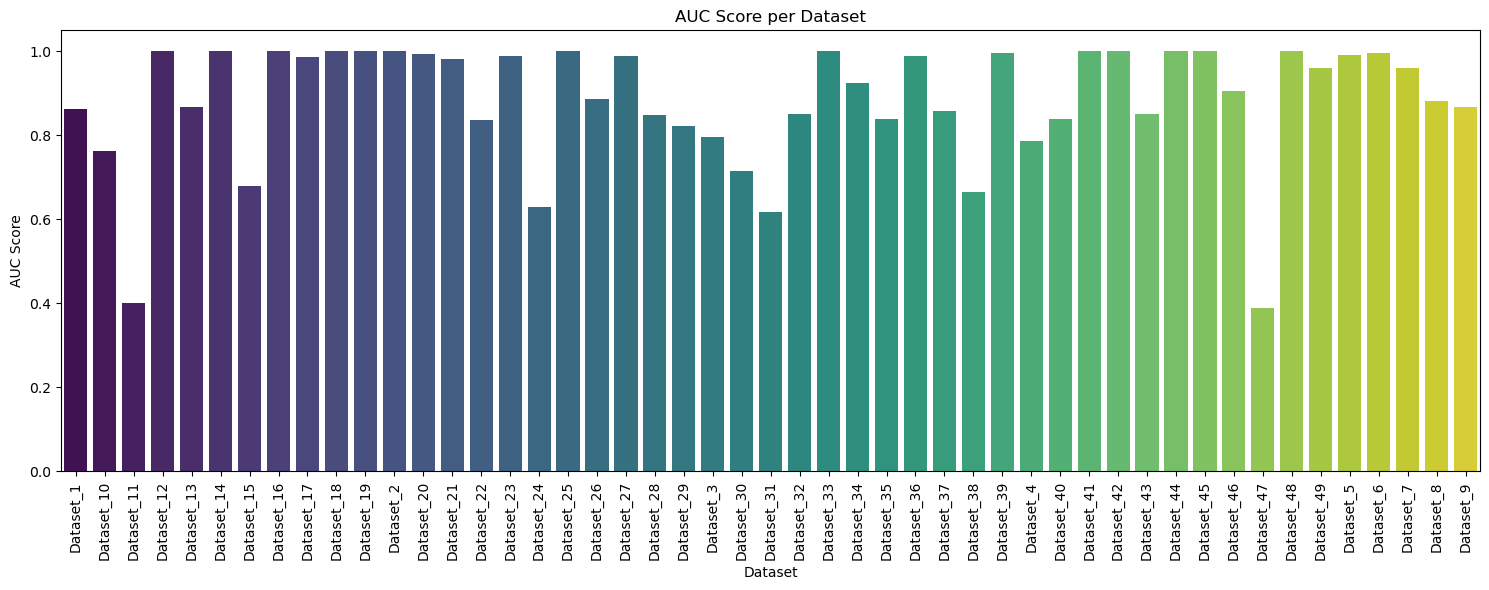

In [22]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from xgboost import XGBClassifier, plot_importance
from sklearn.svm import SVC
from sklearn.ensemble import StackingClassifier, RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, RandomizedSearchCV, StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import roc_auc_score, precision_score, recall_score, f1_score
from sklearn.feature_selection import SelectFromModel
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline
from collections import Counter4
import warnings
import json

warnings.filterwarnings("ignore", category=UserWarning)

def make_serializable(obj):
    """
    Recursively convert NumPy data types in the input object to native Python types.
    """
    if isinstance(obj, dict):
        return {k: make_serializable(v) for k, v in obj.items()}
    elif isinstance(obj, list):
        return [make_serializable(i) for i in obj]
    elif isinstance(obj, np.integer):
        return int(obj)
    elif isinstance(obj, np.floating):
        return float(obj)
    elif isinstance(obj, np.ndarray):
        return obj.tolist()
    else:
        return obj

def train_and_predict_with_stacking():
    dataset_names = []
    X_trains = []
    y_trains = []
    X_tests = []
    auc_scores = []
    dataset_auc = {}
    dataset_metrics = {}
    dataset_best_params = {}
    dataset_optimal_thresholds = {}

    low_auc_datasets = [
        'Dataset_4', 'Dataset_11', 'Dataset_15', 'Dataset_24', 'Dataset_31',
        'Dataset_32', 'Dataset_43', 'Dataset_47'
    ]
    
    data_path = "./Competition_data"
    
    for folder_name in os.listdir(data_path):
        folder_path = os.path.join(data_path, folder_name)
        if os.path.isdir(folder_path):
            dataset_names.append(folder_name)
            X_trains.append(pd.read_csv(os.path.join(folder_path, "X_train.csv"), header=0))
            y_trains.append(pd.read_csv(os.path.join(folder_path, "y_train.csv"), header=0))
            X_tests.append(pd.read_csv(os.path.join(folder_path, "X_test.csv"), header=0))

    for i in range(len(dataset_names)):
        print(f"Processing {dataset_names[i]}...")
        
        X_train = X_trains[i]
        y_train = y_trains[i].squeeze()
        X_test = X_tests[i]
        
        # Fill missing values
        X_train = X_train.fillna(X_train.mean())
        X_test = X_test.fillna(X_train.mean())
        
        # Scale features
        scaler = StandardScaler()
        X_train_scaled = scaler.fit_transform(X_train)
        X_test_scaled = scaler.transform(X_test)
        
        # Split data with stratification
        tmp_X_train, tmp_X_test, tmp_y_train, tmp_y_test = train_test_split(
            X_train_scaled, y_train, test_size=0.2, random_state=42, stratify=y_train
        )
        
        # Handle class imbalance with SMOTE for low AUC datasets
        if dataset_names[i] in low_auc_datasets:
            smote = SMOTE(random_state=42)
            tmp_X_train_res, tmp_y_train_res = smote.fit_resample(tmp_X_train, tmp_y_train)
        else:
            tmp_X_train_res, tmp_y_train_res = tmp_X_train, tmp_y_train
        
        # Feature Selection using SelectFromModel with XGBoost
        xgb_for_fs = XGBClassifier(random_state=42, eval_metric="logloss", use_label_encoder=False)
        xgb_for_fs.fit(tmp_X_train_res, tmp_y_train_res)
        
        selector = SelectFromModel(xgb_for_fs, threshold='median', prefit=True)
        tmp_X_train_res_selected = selector.transform(tmp_X_train_res)
        tmp_X_test_selected = selector.transform(tmp_X_test)
        X_test_selected = selector.transform(X_test_scaled)
        
        # Hyperparameter grids
        if dataset_names[i] in low_auc_datasets:
            param_dist_xgb = {
                'n_estimators': np.arange(100, 1001, 100),
                'max_depth': np.arange(3, 15, 1),
                'learning_rate': np.linspace(0.01, 0.3, 30),
                'subsample': np.linspace(0.6, 1.0, 5),
                'colsample_bytree': np.linspace(0.6, 1.0, 5),
                'gamma': [0, 1, 5],
                'min_child_weight': [1, 5, 10, 20],
                'scale_pos_weight': [1]
            }
            param_dist_svm = {
                'C': [0.1, 1, 10, 100],
                'kernel': ['linear', 'rbf'],
                'gamma': ['scale', 'auto']
            }
            param_dist_rf = {
                'n_estimators': np.arange(100, 501, 100),
                'max_depth': np.arange(3, 15, 1),
                'min_samples_split': [2, 5, 10],
                'min_samples_leaf': [1, 2, 4],
                'bootstrap': [True, False]
            }
            n_iter_search = 100
        else:
            param_dist_xgb = {
                'n_estimators': [200],
                'max_depth': [6],
                'learning_rate': [0.05],
                'subsample': [0.8],
                'colsample_bytree': [0.8],
                'gamma': [0],
                'min_child_weight': [1],
                'scale_pos_weight': [1]
            }
            param_dist_svm = {
                'C': [1],
                'kernel': ['rbf'],
                'gamma': ['scale']
            }
            param_dist_rf = {
                'n_estimators': [200],
                'max_depth': [6],
                'min_samples_split': [2],
                'min_samples_leaf': [1],
                'bootstrap': [True]
            }
            n_iter_search = 50
        
        # Define cross-validation strategy
        skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
        
        # XGBoost model
        xgb_model = XGBClassifier(
            random_state=42,
            eval_metric="logloss",
            use_label_encoder=False,
            n_jobs=-1
        )
        
        randomized_search_xgb = RandomizedSearchCV(
            estimator=xgb_model,
            param_distributions=param_dist_xgb,
            n_iter=n_iter_search,
            scoring='roc_auc',
            cv=skf,
            random_state=42,
            n_jobs=-1,
            verbose=0
        )
        
        randomized_search_xgb.fit(tmp_X_train_res_selected, tmp_y_train_res)
        best_xgb_model = randomized_search_xgb.best_estimator_
        best_params_xgb = randomized_search_xgb.best_params_
        
        # SVM model
        svm_model = SVC(probability=True, random_state=42)
        
        randomized_search_svm = RandomizedSearchCV(
            estimator=svm_model,
            param_distributions=param_dist_svm,
            n_iter=int(n_iter_search / 2),
            scoring='roc_auc',
            cv=skf,
            random_state=42,
            n_jobs=-1,
            verbose=0
        )
        
        randomized_search_svm.fit(tmp_X_train_res_selected, tmp_y_train_res)
        best_svm_model = randomized_search_svm.best_estimator_
        best_params_svm = randomized_search_svm.best_params_
        
        # Random Forest model
        rf_model = RandomForestClassifier(random_state=42)
        
        randomized_search_rf = RandomizedSearchCV(
            estimator=rf_model,
            param_distributions=param_dist_rf,
            n_iter=n_iter_search,
            scoring='roc_auc',
            cv=skf,
            random_state=42,
            n_jobs=-1,
            verbose=0
        )
        
        randomized_search_rf.fit(tmp_X_train_res_selected, tmp_y_train_res)
        best_rf_model = randomized_search_rf.best_estimator_
        best_params_rf = randomized_search_rf.best_params_
        
        # Save best parameters
        dataset_best_params[dataset_names[i]] = {
            'xgb': best_params_xgb,
            'svm': best_params_svm,
            'rf': best_params_rf
        }
        
        # Stacking classifier
        estimators = [
            ('xgb', best_xgb_model),
            ('svm', best_svm_model),
            ('rf', best_rf_model)
        ]
        
        final_estimator = LogisticRegression()
        
        stacking_clf = StackingClassifier(
            estimators=estimators,
            final_estimator=final_estimator,
            cv=skf,
            n_jobs=-1,
            passthrough=True
        )
        
        # Fit stacking classifier on selected features
        stacking_clf.fit(tmp_X_train_res_selected, tmp_y_train_res)
        
        # Predict probabilities on validation set
        tmp_y_prob = stacking_clf.predict_proba(tmp_X_test_selected)[:, 1]
        auc = roc_auc_score(tmp_y_test, tmp_y_prob)
        
        # Threshold optimization
        thresholds = np.linspace(0.0, 1.0, 101)
        f1_scores = []
        for threshold in thresholds:
            tmp_y_pred_thresh = (tmp_y_prob >= threshold).astype(int)
            f1 = f1_score(tmp_y_test, tmp_y_pred_thresh, zero_division=0)
            f1_scores.append(f1)
        optimal_idx = np.argmax(f1_scores)
        optimal_threshold = thresholds[optimal_idx]
        dataset_optimal_thresholds[dataset_names[i]] = optimal_threshold
        
        tmp_y_pred = (tmp_y_prob >= optimal_threshold).astype(int)
        
        precision = precision_score(tmp_y_test, tmp_y_pred, zero_division=0)
        recall = recall_score(tmp_y_test, tmp_y_pred, zero_division=0)
        f1 = f1_score(tmp_y_test, tmp_y_pred, zero_division=0)
        
        auc_scores.append(auc)
        dataset_auc[dataset_names[i]] = auc
        dataset_metrics[dataset_names[i]] = {
            'AUC': auc,
            'Precision': precision,
            'Recall': recall,
            'F1-Score': f1,
            'Optimal Threshold': optimal_threshold
        }
        
        print(f"Dataset {dataset_names[i]} - AUC: {auc:.4f}, Optimal Threshold: {optimal_threshold:.2f}, Precision: {precision:.4f}, Recall: {recall:.4f}, F1-Score: {f1:.4f}")
        
        # Predict on the actual test set
        y_predict_proba = stacking_clf.predict_proba(X_test_selected)[:, 1]
        y_predict = (y_predict_proba >= optimal_threshold).astype(int)

        # Save the prediction results
        output_df = pd.DataFrame({
            "y_predict_proba": y_predict_proba
        })
        output_csv_path = os.path.join(data_path, dataset_names[i], "y_predict.csv")
        output_df.to_csv(output_csv_path, index=False)
        
        # Plot feature importance for XGBoost
        plt.figure(figsize=(10, 8))
        plot_importance(best_xgb_model, max_num_features=10, importance_type='gain')
        plt.title(f'Feature Importance for {dataset_names[i]} (XGBoost)')
        plt.tight_layout()
        plt.savefig(os.path.join(data_path, dataset_names[i], "feature_importance_xgb.png"))
        plt.close()
        
    average_auc = np.mean(auc_scores)
    print(f"\nAverage Stacking Classifier AUC Across All Datasets: {average_auc:.4f}")
    
    # Save metrics
    metrics_df = pd.DataFrame(dataset_metrics).T
    metrics_csv_path = os.path.join(data_path, "dataset_metrics.csv")
    metrics_df.to_csv(metrics_csv_path, index=True)
    
    # Save best hyperparameters
    serializable_best_params = make_serializable(dataset_best_params)
    hyperparams_json_path = os.path.join(data_path, "best_hyperparameters.json")
    with open(hyperparams_json_path, 'w') as f:
        json.dump(serializable_best_params, f, indent=4)
    
    # Save optimal thresholds
    serializable_optimal_thresholds = make_serializable(dataset_optimal_thresholds)
    thresholds_json_path = os.path.join(data_path, "optimal_thresholds.json")
    with open(thresholds_json_path, 'w') as f:
        json.dump(serializable_optimal_thresholds, f, indent=4)
    
    # Plot AUC scores per dataset
    plt.figure(figsize=(15, 6))
    datasets = list(dataset_auc.keys())
    auc_values = list(dataset_auc.values())
    sns.barplot(x=datasets, y=auc_values, palette='viridis')
    plt.xticks(rotation=90)
    plt.xlabel('Dataset')
    plt.ylabel('AUC Score')
    plt.title('AUC Score per Dataset')
    plt.tight_layout() 
    auc_plot_path = os.path.join(data_path, "auc_scores_per_dataset.png")
    plt.savefig(auc_plot_path)
    plt.show()
    
train_and_predict_with_stacking()


In [23]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from catboost import CatBoostClassifier
from lightgbm import LGBMClassifier
from sklearn.ensemble import StackingClassifier
from sklearn.model_selection import train_test_split, RandomizedSearchCV, StratifiedKFold
from sklearn.metrics import roc_auc_score, precision_score, recall_score, f1_score
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline
from collections import Counter
import warnings
import json

warnings.filterwarnings("ignore", category=UserWarning)

def make_serializable(obj):
    """
    Recursively convert NumPy data types in the input object to native Python types.
    """
    if isinstance(obj, dict):
        return {k: make_serializable(v) for k, v in obj.items()}
    elif isinstance(obj, list):
        return [make_serializable(i) for i in obj]
    elif isinstance(obj, np.integer):
        return int(obj)
    elif isinstance(obj, np.floating):
        return float(obj)
    elif isinstance(obj, np.ndarray):
        return obj.tolist()
    else:
        return obj

def train_and_predict_with_stacking():
    dataset_names = []
    X_trains = []
    y_trains = []
    X_tests = []
    auc_scores = []
    dataset_auc = {}
    dataset_metrics = {}
    dataset_best_params = {}
    dataset_optimal_thresholds = {}

    low_auc_datasets = [
        'Dataset_4', 'Dataset_11', 'Dataset_15', 'Dataset_24', 'Dataset_31',
        'Dataset_32', 'Dataset_43', 'Dataset_47'
    ]
    
    data_path = "./Competition_data"
    
    for folder_name in os.listdir(data_path):
        folder_path = os.path.join(data_path, folder_name)
        if os.path.isdir(folder_path):
            dataset_names.append(folder_name)
            X_trains.append(pd.read_csv(os.path.join(folder_path, "X_train.csv"), header=0))
            y_trains.append(pd.read_csv(os.path.join(folder_path, "y_train.csv"), header=0))
            X_tests.append(pd.read_csv(os.path.join(folder_path, "X_test.csv"), header=0))

    for i in range(len(dataset_names)):
        print(f"Processing {dataset_names[i]}...")
        
        X_train = X_trains[i]
        y_train = y_trains[i].squeeze()
        X_test = X_tests[i]
        
        # Identify categorical and numerical features
        categorical_features = X_train.select_dtypes(include=['object', 'category']).columns.tolist()
        numerical_features = X_train.select_dtypes(include=['int64', 'float64']).columns.tolist()
        
        # CatBoost handles missing values internally
        # LightGBM can also handle missing values, but we need to be explicit

        tmp_X_train, tmp_X_test, tmp_y_train, tmp_y_test = train_test_split(
            X_train, y_train, test_size=0.2, random_state=42, stratify=y_train
        )
        
        # Handle class imbalance with SMOTE for low AUC datasets
        if dataset_names[i] in low_auc_datasets:
            smote = SMOTE(random_state=42)
            tmp_X_train_res, tmp_y_train_res = smote.fit_resample(tmp_X_train, tmp_y_train)
            n_iter_search = 100
        else:
            tmp_X_train_res, tmp_y_train_res = tmp_X_train, tmp_y_train
            n_iter_search = 50

        # Define hyperparameter grids
        param_dist_catboost = {
            'iterations': np.arange(100, 1001, 100),
            'depth': np.arange(3, 11, 1),
            'learning_rate': np.linspace(0.01, 0.2, 20),
            'subsample': np.linspace(0.6, 1.0, 5),
            'colsample_bylevel': np.linspace(0.6, 1.0, 5),
            'l2_leaf_reg': [1, 3, 5, 7],
            'bagging_temperature': np.linspace(0, 1, 5),
        }
        param_dist_lightgbm = {
            'n_estimators': np.arange(100, 1001, 100),
            'max_depth': np.arange(3, 15, 1),
            'learning_rate': np.linspace(0.01, 0.2, 20),
            'subsample': np.linspace(0.6, 1.0, 5),
            'colsample_bytree': np.linspace(0.6, 1.0, 5),
            'reg_alpha': [0, 1, 5],
            'reg_lambda': [0, 1, 5],
        }

        # Reduce hyperparameter search space for high-performing datasets
        if dataset_names[i] not in low_auc_datasets:
            param_dist_catboost = {
                'iterations': [200],
                'depth': [6],
                'learning_rate': [0.05],
                'subsample': [0.8],
                'colsample_bylevel': [0.8],
                'l2_leaf_reg': [3],
                'bagging_temperature': [0],
            }
            param_dist_lightgbm = {
                'n_estimators': [200],
                'max_depth': [6],
                'learning_rate': [0.05],
                'subsample': [0.8],
                'colsample_bytree': [0.8],
                'reg_alpha': [0],
                'reg_lambda': [0],
            }

        # Define cross-validation strategy
        skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

        # CatBoost model
        catboost_model = CatBoostClassifier(
            random_seed=42,
            eval_metric='AUC',
            silent=True,
            allow_writing_files=False
        )
        
        randomized_search_catboost = RandomizedSearchCV(
            estimator=catboost_model,
            param_distributions=param_dist_catboost,
            n_iter=n_iter_search,
            scoring='roc_auc',
            cv=skf,
            random_state=42,
            n_jobs=-1,
            verbose=0
        )

        randomized_search_catboost.fit(tmp_X_train_res, tmp_y_train_res, cat_features=categorical_features)
        best_catboost_model = randomized_search_catboost.best_estimator_
        best_params_catboost = randomized_search_catboost.best_params_

        # LightGBM model
        lightgbm_model = LGBMClassifier(random_state=42)
        
        randomized_search_lightgbm = RandomizedSearchCV(
            estimator=lightgbm_model,
            param_distributions=param_dist_lightgbm,
            n_iter=n_iter_search,
            scoring='roc_auc',
            cv=skf,
            random_state=42,
            n_jobs=-1,
            verbose=0
        )

        randomized_search_lightgbm.fit(tmp_X_train_res[numerical_features], tmp_y_train_res)
        best_lightgbm_model = randomized_search_lightgbm.best_estimator_
        best_params_lightgbm = randomized_search_lightgbm.best_params_

        # Save best parameters
        dataset_best_params[dataset_names[i]] = {
            'catboost': best_params_catboost,
            'lightgbm': best_params_lightgbm
        }

        # Stacking classifier
        estimators = [
            ('catboost', best_catboost_model),
            ('lightgbm', best_lightgbm_model)
        ]

        final_estimator = LogisticRegression()

        stacking_clf = StackingClassifier(
            estimators=estimators,
            final_estimator=final_estimator,
            cv=skf,
            n_jobs=-1,
            passthrough=True
        )

        # Prepare data for stacking classifier
        # Combine numerical and categorical features
        tmp_X_train_res_combined = tmp_X_train_res.copy()
        tmp_X_test_combined = tmp_X_test.copy()
        X_test_combined = X_test.copy()

        # Fit stacking classifier
        stacking_clf.fit(tmp_X_train_res_combined, tmp_y_train_res)

        # Predict probabilities on validation set
        tmp_y_prob = stacking_clf.predict_proba(tmp_X_test_combined)[:, 1]
        auc = roc_auc_score(tmp_y_test, tmp_y_prob)

        # Threshold optimization
        thresholds = np.linspace(0.0, 1.0, 101)
        f1_scores = []
        for threshold in thresholds:
            tmp_y_pred_thresh = (tmp_y_prob >= threshold).astype(int)
            f1 = f1_score(tmp_y_test, tmp_y_pred_thresh, zero_division=0)
            f1_scores.append(f1)
        optimal_idx = np.argmax(f1_scores)
        optimal_threshold = thresholds[optimal_idx]
        dataset_optimal_thresholds[dataset_names[i]] = optimal_threshold

        tmp_y_pred = (tmp_y_prob >= optimal_threshold).astype(int)

        precision = precision_score(tmp_y_test, tmp_y_pred, zero_division=0)
        recall = recall_score(tmp_y_test, tmp_y_pred, zero_division=0)
        f1 = f1_score(tmp_y_test, tmp_y_pred, zero_division=0)

        auc_scores.append(auc)
        dataset_auc[dataset_names[i]] = auc
        dataset_metrics[dataset_names[i]] = {
            'AUC': auc,
            'Precision': precision,
            'Recall': recall,
            'F1-Score': f1,
            'Optimal Threshold': optimal_threshold
        }

        print(f"Dataset {dataset_names[i]} - AUC: {auc:.4f}, Optimal Threshold: {optimal_threshold:.2f}, Precision: {precision:.4f}, Recall: {recall:.4f}, F1-Score: {f1:.4f}")

        # Predict on the actual test set
        y_predict_proba = stacking_clf.predict_proba(X_test_combined)[:, 1]
        y_predict = (y_predict_proba >= optimal_threshold).astype(int)

        # Save the prediction results
        output_df = pd.DataFrame({
            "y_predict_proba": y_predict_proba
        })
        output_csv_path = os.path.join(data_path, dataset_names[i], "y_predict.csv")
        output_df.to_csv(output_csv_path, index=False)

        # Plot feature importance for CatBoost
        if hasattr(best_catboost_model, 'get_feature_importance'):
            importances = best_catboost_model.get_feature_importance()
            feature_names = X_train.columns
            importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
            importance_df = importance_df.sort_values(by='Importance', ascending=False).head(10)
            
            plt.figure(figsize=(10, 8))
            sns.barplot(x='Importance', y='Feature', data=importance_df)
            plt.title(f'Feature Importance for {dataset_names[i]} (CatBoost)')
            plt.tight_layout()
            plt.savefig(os.path.join(data_path, dataset_names[i], "feature_importance_catboost.png"))
            plt.close()

    average_auc = np.mean(auc_scores)
    print(f"\nAverage Stacking Classifier AUC Across All Datasets: {average_auc:.4f}")
    
    # Save metrics
    metrics_df = pd.DataFrame(dataset_metrics).T
    metrics_csv_path = os.path.join(data_path, "dataset_metrics.csv")
    metrics_df.to_csv(metrics_csv_path, index=True)
    
    # Save best hyperparameters
    serializable_best_params = make_serializable(dataset_best_params)
    hyperparams_json_path = os.path.join(data_path, "best_hyperparameters.json")
    with open(hyperparams_json_path, 'w') as f:
        json.dump(serializable_best_params, f, indent=4)
    
    # Save optimal thresholds
    serializable_optimal_thresholds = make_serializable(dataset_optimal_thresholds)
    thresholds_json_path = os.path.join(data_path, "optimal_thresholds.json")
    with open(thresholds_json_path, 'w') as f:
        json.dump(serializable_optimal_thresholds, f, indent=4)
    
    # Plot AUC scores per dataset
    plt.figure(figsize=(15, 6))
    datasets = list(dataset_auc.keys())
    auc_values = list(dataset_auc.values())
    sns.barplot(x=datasets, y=auc_values, palette='viridis')
    plt.xticks(rotation=90)
    plt.xlabel('Dataset')
    plt.ylabel('AUC Score')
    plt.title('AUC Score per Dataset')
    plt.tight_layout() 
    auc_plot_path = os.path.join(data_path, "auc_scores_per_dataset.png")
    plt.savefig(auc_plot_path)
    plt.show()
    
train_and_predict_with_stacking()


Processing Dataset_1...
[LightGBM] [Info] Number of positive: 105, number of negative: 250
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000156 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 230
[LightGBM] [Info] Number of data points in the train set: 355, number of used features: 19
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.295775 -> initscore=-0.867501
[LightGBM] [Info] Start training from score -0.867501
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positi

Dataset Dataset_1 - AUC: 0.8407, Optimal Threshold: 0.19, Precision: 0.5676, Recall: 0.8077, F1-Score: 0.6667
Processing Dataset_10...
[LightGBM] [Info] Number of positive: 155, number of negative: 218
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000176 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 537
[LightGBM] [Info] Number of data points in the train set: 373, number of used features: 11
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.415550 -> initscore=-0.341070
[LightGBM] [Info] Start training from score -0.341070
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Wa

Dataset Dataset_10 - AUC: 0.7338, Optimal Threshold: 0.31, Precision: 0.6250, Recall: 0.7692, F1-Score: 0.6897
Processing Dataset_11...
[LightGBM] [Info] Number of positive: 37, number of negative: 37
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000196 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1569
[LightGBM] [Info] Number of data points in the train set: 74, number of used features: 62
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, 

Dataset Dataset_11 - AUC: 0.3500, Optimal Threshold: 0.21, Precision: 0.2500, Recall: 0.5000, F1-Score: 0.3333
Processing Dataset_12...
[LightGBM] [Info] Number of positive: 34, number of negative: 89
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000078 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 170
[LightGBM] [Info] Number of data points in the train set: 123, number of used features: 5
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.276423 -> initscore=-0.962276
[LightGBM] [Info] Start training from score -0.962276
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[Ligh

Dataset Dataset_12 - AUC: 1.0000, Optimal Threshold: 0.18, Precision: 1.0000, Recall: 1.0000, F1-Score: 1.0000
Processing Dataset_13...
[LightGBM] [Info] Number of positive: 41, number of negative: 103
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000375 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 626
[LightGBM] [Info] Number of data points in the train set: 144, number of used features: 37
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.284722 -> initscore=-0.921157
[LightGBM] [Info] Start training from score -0.921157
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[Li

Dataset Dataset_13 - AUC: 0.8566, Optimal Threshold: 0.04, Precision: 0.5000, Recall: 1.0000, F1-Score: 0.6667
Processing Dataset_14...
[LightGBM] [Info] Number of positive: 41, number of negative: 103
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000451 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 632
[LightGBM] [Info] Number of data points in the train set: 144, number of used features: 40
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.284722 -> initscore=-0.921157
[LightGBM] [Info] Start training from score -0.921157
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[Li

Dataset Dataset_14 - AUC: 1.0000, Optimal Threshold: 0.23, Precision: 1.0000, Recall: 1.0000, F1-Score: 1.0000
Processing Dataset_15...
[LightGBM] [Info] Number of positive: 200, number of negative: 200
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000311 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 350
[LightGBM] [Info] Number of data points in the train set: 400, number of used features: 11
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain

Dataset Dataset_15 - AUC: 0.6375, Optimal Threshold: 0.12, Precision: 0.3607, Recall: 0.9167, F1-Score: 0.5176
Processing Dataset_16...
[LightGBM] [Info] Number of positive: 142, number of negative: 230
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000390 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 783
[LightGBM] [Info] Number of data points in the train set: 372, number of used features: 23
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.381720 -> initscore=-0.482252
[LightGBM] [Info] Start training from score -0.482252
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[L

Dataset Dataset_16 - AUC: 1.0000, Optimal Threshold: 0.21, Precision: 1.0000, Recall: 1.0000, F1-Score: 1.0000
Processing Dataset_17...
[LightGBM] [Info] Number of positive: 46, number of negative: 50
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000112 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 319
[LightGBM] [Info] Number of data points in the train set: 96, number of used features: 19
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.479167 -> initscore=-0.083382
[LightGBM] [Info] Start training from score -0.083382
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[Ligh

Dataset Dataset_17 - AUC: 0.9790, Optimal Threshold: 0.65, Precision: 0.8462, Recall: 1.0000, F1-Score: 0.9167
Processing Dataset_18...
[LightGBM] [Info] Number of positive: 15, number of negative: 257
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000134 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 91
[LightGBM] [Info] Number of data points in the train set: 272, number of used features: 12
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.055147 -> initscore=-2.841026
[LightGBM] [Info] Start training from score -2.841026
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [War

Dataset Dataset_18 - AUC: 1.0000, Optimal Threshold: 0.68, Precision: 1.0000, Recall: 1.0000, F1-Score: 1.0000
Processing Dataset_19...
[LightGBM] [Info] Number of positive: 106, number of negative: 166
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000251 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2722
[LightGBM] [Info] Number of data points in the train set: 272, number of used features: 30
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.389706 -> initscore=-0.448549
[LightGBM] [Info] Start training from score -0.448549
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[

Dataset Dataset_19 - AUC: 1.0000, Optimal Threshold: 0.38, Precision: 1.0000, Recall: 1.0000, F1-Score: 1.0000
Processing Dataset_2...
[LightGBM] [Info] Number of positive: 142, number of negative: 230
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000385 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 783
[LightGBM] [Info] Number of data points in the train set: 372, number of used features: 23
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.381720 -> initscore=-0.482252
[LightGBM] [Info] Start training from score -0.482252
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[Li

Dataset Dataset_2 - AUC: 1.0000, Optimal Threshold: 0.21, Precision: 1.0000, Recall: 1.0000, F1-Score: 1.0000
Processing Dataset_20...
[LightGBM] [Info] Number of positive: 30, number of negative: 73
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000172 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 201
[LightGBM] [Info] Number of data points in the train set: 103, number of used features: 13
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.291262 -> initscore=-0.889262
[LightGBM] [Info] Start training from score -0.889262
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warn

Dataset Dataset_20 - AUC: 0.9861, Optimal Threshold: 0.16, Precision: 0.8889, Recall: 1.0000, F1-Score: 0.9412
Processing Dataset_21...
[LightGBM] [Info] Number of positive: 102, number of negative: 140
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000151 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 994
[LightGBM] [Info] Number of data points in the train set: 242, number of used features: 17
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.421488 -> initscore=-0.316670
[LightGBM] [Info] Start training from score -0.316670
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[L

Dataset Dataset_21 - AUC: 0.9835, Optimal Threshold: 0.13, Precision: 0.8667, Recall: 1.0000, F1-Score: 0.9286
Processing Dataset_22...
[LightGBM] [Info] Number of positive: 37, number of negative: 65
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000099 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 234
[LightGBM] [Info] Number of data points in the train set: 102, number of used features: 9
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.362745 -> initscore=-0.563469
[LightGBM] [Info] Start training from score -0.563469
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[Ligh

Dataset Dataset_22 - AUC: 0.8688, Optimal Threshold: 0.27, Precision: 0.8000, Recall: 0.8000, F1-Score: 0.8000
Processing Dataset_23...
[LightGBM] [Info] Number of positive: 110, number of negative: 173
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000269 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 343
[LightGBM] [Info] Number of data points in the train set: 283, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.388693 -> initscore=-0.452811
[LightGBM] [Info] Start training from score -0.452811
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[L

Dataset Dataset_23 - AUC: 0.9874, Optimal Threshold: 0.16, Precision: 0.8667, Recall: 0.9630, F1-Score: 0.9123
Processing Dataset_24...


KeyboardInterrupt: 

In [ ]:
#Best Performing Code for Competition
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from catboost import CatBoostClassifier
from sklearn.model_selection import train_test_split, RandomizedSearchCV, StratifiedKFold
from sklearn.metrics import roc_auc_score, precision_score, recall_score, f1_score
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline
from collections import Counter
import warnings
import json

warnings.filterwarnings("ignore", category=UserWarning)

def make_serializable(obj):
    """
    Recursively convert NumPy data types in the input object to native Python types.
    """
    if isinstance(obj, dict):
        return {k: make_serializable(v) for k, v in obj.items()}
    elif isinstance(obj, list):
        return [make_serializable(i) for i in obj]
    elif isinstance(obj, np.integer):
        return int(obj)
    elif isinstance(obj, np.floating):
        return float(obj)
    elif isinstance(obj, np.ndarray):
        return obj.tolist()
    else:
        return obj

def train_and_predict_with_catboost():
    dataset_names = []
    X_trains = []
    y_trains = []
    X_tests = []
    auc_scores = []
    dataset_auc = {}
    dataset_metrics = {}
    dataset_best_params = {}
    dataset_optimal_thresholds = {}

    low_auc_datasets = [
        'Dataset_4', 'Dataset_11', 'Dataset_15', 'Dataset_24', 'Dataset_31',
        'Dataset_32', 'Dataset_43', 'Dataset_47'
    ]
    
    data_path = "./Competition_data"
    
    for folder_name in os.listdir(data_path):
        folder_path = os.path.join(data_path, folder_name)
        if os.path.isdir(folder_path):
            dataset_names.append(folder_name)
            X_trains.append(pd.read_csv(os.path.join(folder_path, "X_train.csv"), header=0))
            y_trains.append(pd.read_csv(os.path.join(folder_path, "y_train.csv"), header=0))
            X_tests.append(pd.read_csv(os.path.join(folder_path, "X_test.csv"), header=0))

    for i in range(len(dataset_names)):
        print(f"Processing {dataset_names[i]}...")
        
        X_train = X_trains[i]
        y_train = y_trains[i].squeeze()
        X_test = X_tests[i]
        
        # Remove scaling and missing value imputation
        # CatBoost can handle missing values internally
        
        tmp_X_train, tmp_X_test, tmp_y_train, tmp_y_test = train_test_split(
            X_train, y_train, test_size=0.2, random_state=42, stratify=y_train
        )
        
        # Define steps for the pipeline
        steps = []
        if dataset_names[i] in low_auc_datasets:
            # Apply SMOTE for low AUC datasets
            steps.append(('smote', SMOTE(random_state=42)))
            n_iter_search = 100
            param_dist = {
                'classifier__iterations': np.arange(100, 1001, 100),
                'classifier__depth': np.arange(3, 11, 1),
                'classifier__learning_rate': np.linspace(0.01, 0.2, 20),
                'classifier__subsample': np.linspace(0.6, 1.0, 5),
                'classifier__colsample_bylevel': np.linspace(0.6, 1.0, 5),
                'classifier__l2_leaf_reg': [1, 3, 5, 7],
                'classifier__bagging_temperature': np.linspace(0, 1, 5),
            }
        else:
            n_iter_search = 50
            param_dist = {
                'classifier__iterations': [200],
                'classifier__depth': [6],
                'classifier__learning_rate': [0.05],
                'classifier__subsample': [0.8],
                'classifier__colsample_bylevel': [0.8],
                'classifier__l2_leaf_reg': [3],
                'classifier__bagging_temperature': [0],
            }
        
        # Add the classifier to the pipeline
        catboost_model = CatBoostClassifier(
            random_seed=42,
            eval_metric='AUC',
            silent=True,
            allow_writing_files=False
        )
        steps.append(('classifier', catboost_model))
        
        pipeline = Pipeline(steps=steps)
        
        skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
        
        randomized_search = RandomizedSearchCV(
            estimator=pipeline,
            param_distributions=param_dist,
            n_iter=n_iter_search,
            scoring='roc_auc',
            cv=skf,
            random_state=42,
            n_jobs=-1,
            verbose=1
        )
        
        randomized_search.fit(tmp_X_train, tmp_y_train)
        best_model = randomized_search.best_estimator_
        best_params = randomized_search.best_params_
        dataset_best_params[dataset_names[i]] = best_params

        best_model.fit(tmp_X_train, tmp_y_train)
        
        tmp_y_prob = best_model.predict_proba(tmp_X_test)[:, 1]
        auc = roc_auc_score(tmp_y_test, tmp_y_prob)
        
        # Threshold optimization
        thresholds = np.linspace(0.0, 1.0, 101)
        f1_scores = []
        for threshold in thresholds:
            tmp_y_pred_thresh = (tmp_y_prob >= threshold).astype(int)
            f1 = f1_score(tmp_y_test, tmp_y_pred_thresh, zero_division=0)
            f1_scores.append(f1)
        optimal_idx = np.argmax(f1_scores)
        optimal_threshold = thresholds[optimal_idx]
        dataset_optimal_thresholds[dataset_names[i]] = optimal_threshold
        
        tmp_y_pred = (tmp_y_prob >= optimal_threshold).astype(int)
        
        precision = precision_score(tmp_y_test, tmp_y_pred, zero_division=0)
        recall = recall_score(tmp_y_test, tmp_y_pred, zero_division=0)
        f1 = f1_score(tmp_y_test, tmp_y_pred, zero_division=0)
        
        auc_scores.append(auc)
        dataset_auc[dataset_names[i]] = auc
        dataset_metrics[dataset_names[i]] = {
            'AUC': auc,
            'Precision': precision,
            'Recall': recall,
            'F1-Score': f1,
            'Optimal Threshold': optimal_threshold
        }
        
        print(f"Dataset {dataset_names[i]} - AUC: {auc:.4f}, Optimal Threshold: {optimal_threshold:.2f}, Precision: {precision:.4f}, Recall: {recall:.4f}, F1-Score: {f1:.4f}")
        
        y_predict_proba = best_model.predict_proba(X_test)[:, 1]
        y_predict = (y_predict_proba >= optimal_threshold).astype(int)

        # Save the prediction results
        output_df = pd.DataFrame({
            "y_predict_proba": y_predict_proba
        })
        output_csv_path = os.path.join(data_path, dataset_names[i], "y_predict.csv")
        output_df.to_csv(output_csv_path, index=False)
        
        # Plot feature importance
        if hasattr(best_model.named_steps['classifier'], 'get_feature_importance'):
            importances = best_model.named_steps['classifier'].get_feature_importance()
            feature_names = X_train.columns
            importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
            importance_df = importance_df.sort_values(by='Importance', ascending=False).head(10)
            
            plt.figure(figsize=(10, 8))
            sns.barplot(x='Importance', y='Feature', data=importance_df)
            plt.title(f'Feature Importance for {dataset_names[i]}')
            plt.tight_layout()
            plt.savefig(os.path.join(data_path, dataset_names[i], "feature_importance.png"))
            plt.close()
    
    average_auc = np.mean(auc_scores)
    print(f"\nAverage CatBoost AUC Across All Datasets: {average_auc:.4f}")
    
    metrics_df = pd.DataFrame(dataset_metrics).T
    metrics_csv_path = os.path.join(data_path, "dataset_metrics.csv")
    metrics_df.to_csv(metrics_csv_path, index=True)
    
    serializable_best_params = make_serializable(dataset_best_params)
    hyperparams_json_path = os.path.join(data_path, "best_hyperparameters.json")
    with open(hyperparams_json_path, 'w') as f:
        json.dump(serializable_best_params, f, indent=4)
    
    # Save optimal thresholds
    serializable_optimal_thresholds = make_serializable(dataset_optimal_thresholds)
    thresholds_json_path = os.path.join(data_path, "optimal_thresholds.json")
    with open(thresholds_json_path, 'w') as f:
        json.dump(serializable_optimal_thresholds, f, indent=4)
    
    # Plot AUC scores per dataset
    plt.figure(figsize=(15, 6))
    datasets = list(dataset_auc.keys())
    auc_values = list(dataset_auc.values())
    sns.barplot(x=datasets, y=auc_values, palette='viridis')
    plt.xticks(rotation=90)
    plt.xlabel('Dataset')
    plt.ylabel('AUC Score')
    plt.title('AUC Score per Dataset')
    plt.tight_layout() 
    auc_plot_path = os.path.join(data_path, "auc_scores_per_dataset.png")
    plt.savefig(auc_plot_path)
    plt.show()
    
train_and_predict_with_catboost()